In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expi
from scipy.stats import norm
from scipy import signal
import random

# from wurlitzer import sys_pipes
# For C output, use as:
# with sys_pipes():
#     lib....

from xcoll.scattering_routines.everest import lib
from xcoll.scattering_routines.pyeverest import random as k2ran

In [2]:
# lib.set_random_seed(0)
# lib.get_random_seed()
lib.set_random_seed(1669281221)
k2ran.set_random_seed(1669281221)

In [3]:
def test_random(r, bins, func):
    result = plt.hist(r, bins=bins, density=True,color="blue")
    plt.close()
    x = (result[1][:-1]+result[1][1:])/2
    y_meas = result[0]
    y_real = [ func(xx) for xx in x ]
    S = ((y_real-y_meas)**2).sum()

    print(S)

    _ = plt.figure()
    plt.plot(x,y_meas,'r.')
    plt.plot(x,y_real,'b-')
    plt.show()
    return S

<font size="5">**Rutherford random number generator**</font>

In [4]:
z = 29
emr = 0.302
t0 = 0.0009982
t1 = 0.01

def PDF(t, z, emr):
    c = 0.8561e-3
    N = 2.607e-5
    A = N*(z**2)
    B = c*(emr**2)
    return (A/(t**2))*(np.exp(-B*t))

def CDF(t, z, emr, t0):
    c = 0.8561e-3
    N = 2.607e-5
    A = N*(z**2)
    B = c*(emr**2)
    return - A*B*expi(-B*t) - t*PDF(t,z,emr) + A*B*expi(-B*t0) + t0*PDF(t0,z,emr)

cgen = k2ran.initialise_random_ruth(zatom=z, emr=emr, hcut=t1)

## 1000000 samples

In [5]:
n = 1000000
n_iter = 20
bins = 1000

loops = 20
S_everest = []
S_K2 = []
f = lambda x: PDF(x,z,emr)/CDF(t1,z,emr,t0)

CPU times: user 4.87 s, sys: 14.7 ms, total: 4.89 s
Wall time: 4.89 s
CPU times: user 2.4 s, sys: 59.9 ms, total: 2.46 s
Wall time: 2.43 s
27090.950128457393


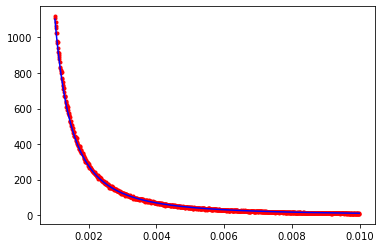

438283.17593914876


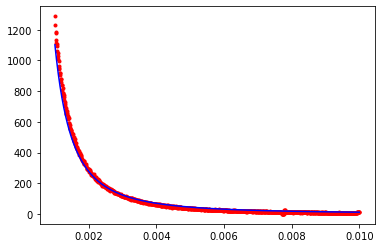

CPU times: user 4.97 s, sys: 41.4 ms, total: 5.01 s
Wall time: 4.9 s
CPU times: user 2.37 s, sys: 38.2 ms, total: 2.41 s
Wall time: 2.39 s
27464.598022488943


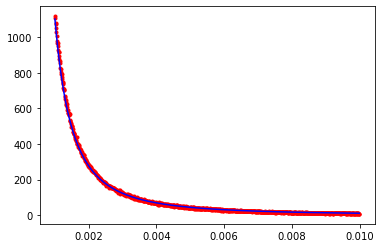

445254.8339934407


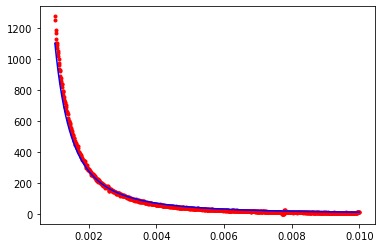

CPU times: user 5 s, sys: 41.3 ms, total: 5.04 s
Wall time: 4.93 s
CPU times: user 2.4 s, sys: 98.5 ms, total: 2.5 s
Wall time: 2.43 s
30572.35191455431


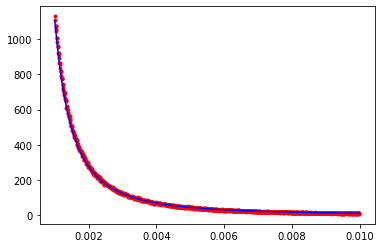

431782.97067451075


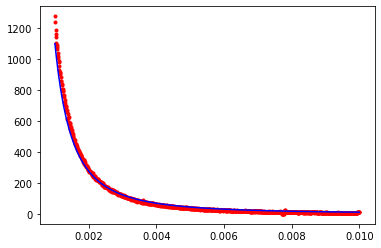

CPU times: user 5 s, sys: 37.9 ms, total: 5.03 s
Wall time: 4.94 s
CPU times: user 2.51 s, sys: 40.9 ms, total: 2.55 s
Wall time: 2.54 s
30247.754542401774


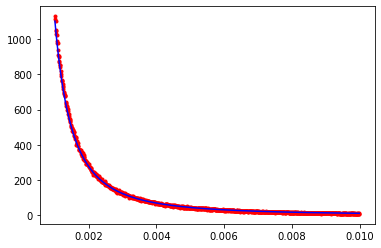

441812.219703908


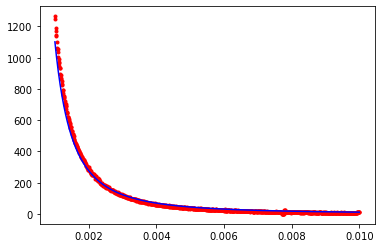

CPU times: user 5.19 s, sys: 50.5 ms, total: 5.24 s
Wall time: 5.17 s
CPU times: user 2.52 s, sys: 55.9 ms, total: 2.58 s
Wall time: 2.56 s
29977.058256354838


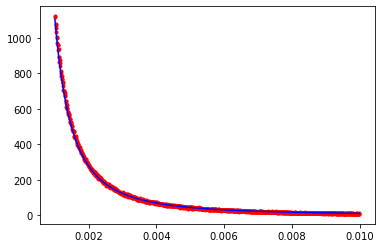

469432.7012713047


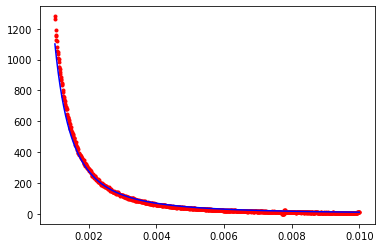

CPU times: user 4.97 s, sys: 34.2 ms, total: 5.01 s
Wall time: 4.91 s
CPU times: user 2.37 s, sys: 28.8 ms, total: 2.39 s
Wall time: 2.38 s
29692.428057728157


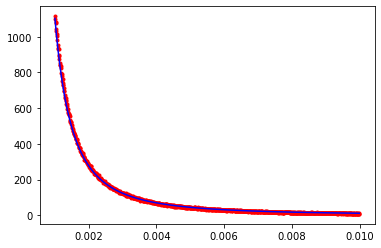

470165.30630078795


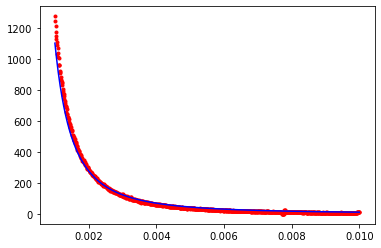

CPU times: user 4.98 s, sys: 38.7 ms, total: 5.02 s
Wall time: 4.9 s
CPU times: user 2.36 s, sys: 27.6 ms, total: 2.39 s
Wall time: 2.38 s
30063.94678846854


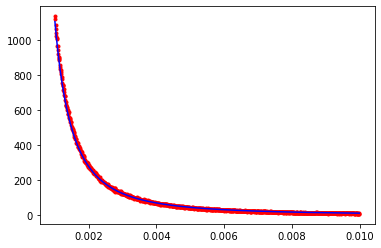

434927.23598998657


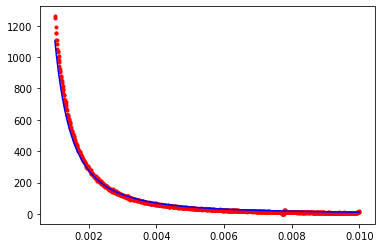

CPU times: user 4.95 s, sys: 38.3 ms, total: 4.99 s
Wall time: 4.88 s
CPU times: user 2.44 s, sys: 45.5 ms, total: 2.48 s
Wall time: 2.46 s
30706.65588060443


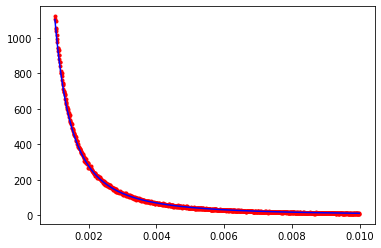

458373.4189112527


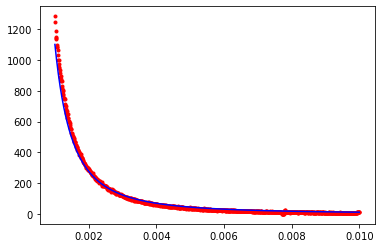

CPU times: user 4.95 s, sys: 36.7 ms, total: 4.98 s
Wall time: 4.87 s
CPU times: user 2.44 s, sys: 34 ms, total: 2.47 s
Wall time: 2.47 s
27031.334816725994


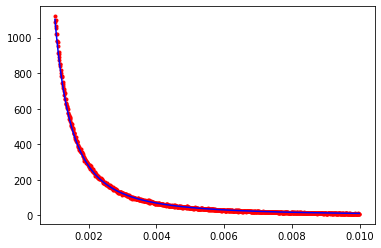

438819.4803500069


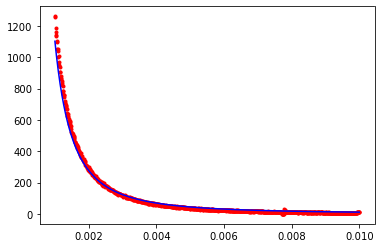

CPU times: user 5.33 s, sys: 62.3 ms, total: 5.39 s
Wall time: 5.34 s
CPU times: user 2.5 s, sys: 55.7 ms, total: 2.55 s
Wall time: 2.54 s
29306.618454588974


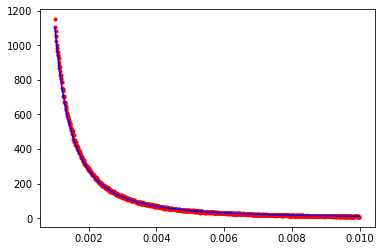

440933.65376862354


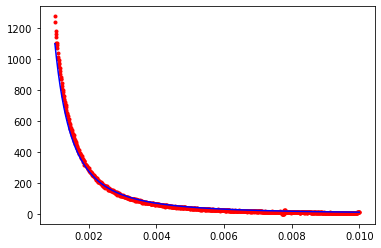

CPU times: user 5.11 s, sys: 42.7 ms, total: 5.15 s
Wall time: 5.06 s
CPU times: user 2.46 s, sys: 39.1 ms, total: 2.5 s
Wall time: 2.5 s
33864.13320736043


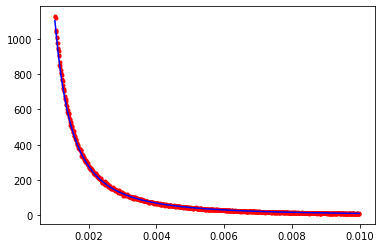

445764.3815370701


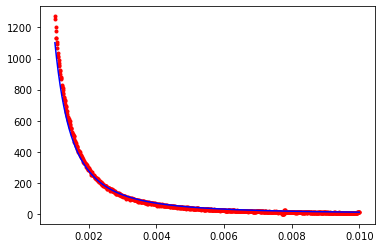

CPU times: user 4.99 s, sys: 41.9 ms, total: 5.03 s
Wall time: 4.91 s
CPU times: user 2.35 s, sys: 25.1 ms, total: 2.38 s
Wall time: 2.37 s
27842.719507904578


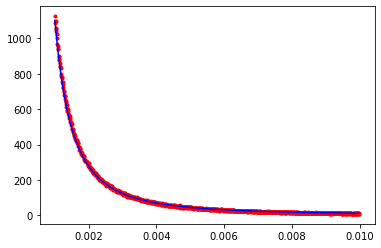

446890.7045101013


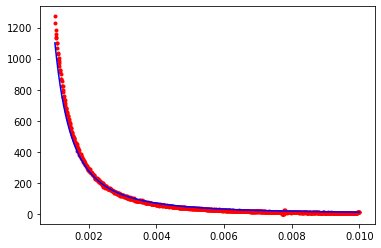

CPU times: user 4.95 s, sys: 36.1 ms, total: 4.99 s
Wall time: 4.88 s
CPU times: user 2.38 s, sys: 68.4 ms, total: 2.45 s
Wall time: 2.41 s
30614.496357378746


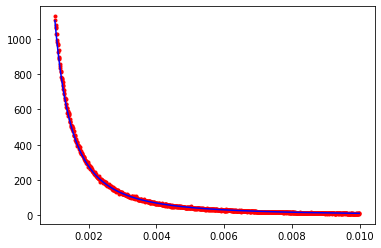

437053.40136544546


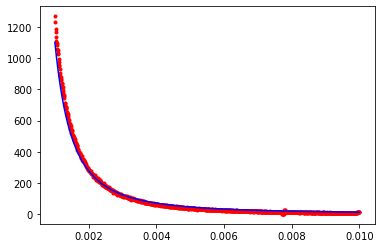

CPU times: user 5.08 s, sys: 45.5 ms, total: 5.13 s
Wall time: 5.02 s
CPU times: user 2.51 s, sys: 60.2 ms, total: 2.57 s
Wall time: 2.55 s
30614.863618259027


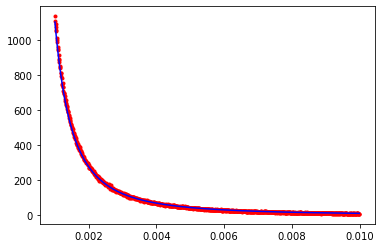

454817.6519694854


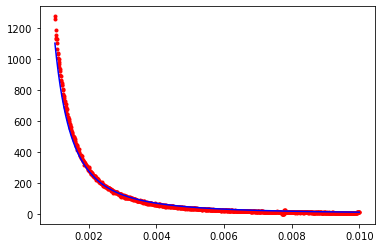

CPU times: user 5.19 s, sys: 56.4 ms, total: 5.25 s
Wall time: 5.16 s
CPU times: user 2.48 s, sys: 43.8 ms, total: 2.52 s
Wall time: 2.51 s
28917.94053591944


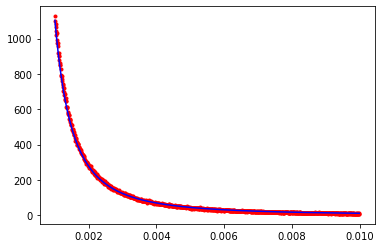

440412.3929525916


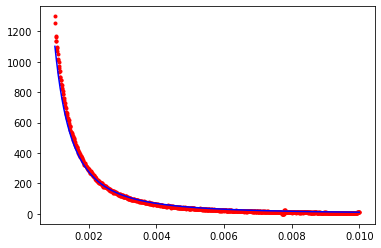

CPU times: user 5.01 s, sys: 37.8 ms, total: 5.05 s
Wall time: 4.94 s
CPU times: user 2.48 s, sys: 37.9 ms, total: 2.52 s
Wall time: 2.52 s
27443.79087440667


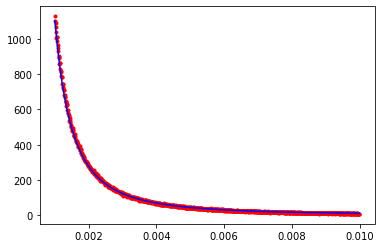

447251.69044202165


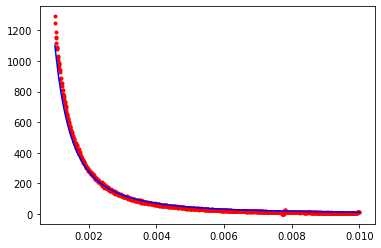

CPU times: user 5.11 s, sys: 42.6 ms, total: 5.15 s
Wall time: 5.07 s
CPU times: user 2.48 s, sys: 43.5 ms, total: 2.53 s
Wall time: 2.51 s
30222.912236440214


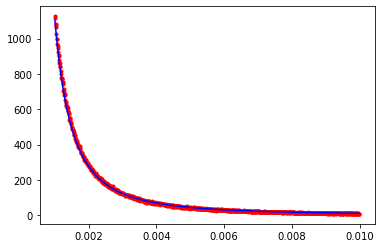

427315.1067119281


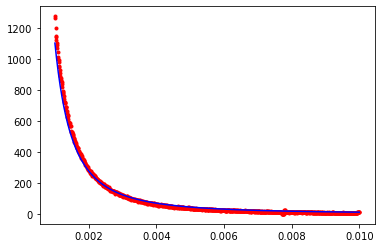

CPU times: user 5.13 s, sys: 48.5 ms, total: 5.18 s
Wall time: 5.09 s
CPU times: user 2.46 s, sys: 36.6 ms, total: 2.5 s
Wall time: 2.49 s
30228.85211709402


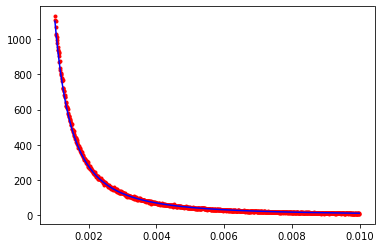

460341.23118578555


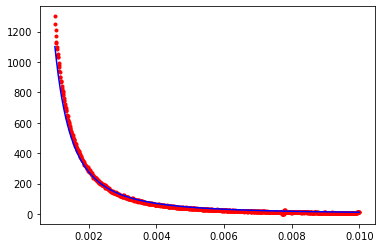

CPU times: user 5.06 s, sys: 36.5 ms, total: 5.09 s
Wall time: 4.99 s
CPU times: user 2.42 s, sys: 51.5 ms, total: 2.47 s
Wall time: 2.44 s
27522.361376169054


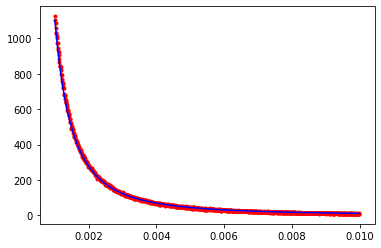

436652.5319901945


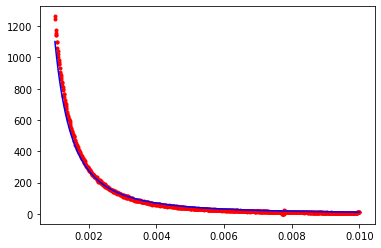

CPU times: user 5.05 s, sys: 38.3 ms, total: 5.09 s
Wall time: 4.98 s
CPU times: user 2.4 s, sys: 40.9 ms, total: 2.44 s
Wall time: 2.42 s
30226.90417914055


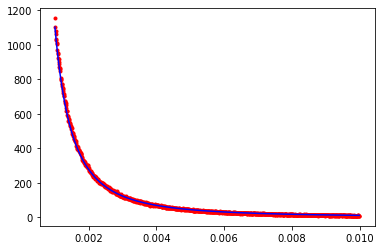

457313.81776719145


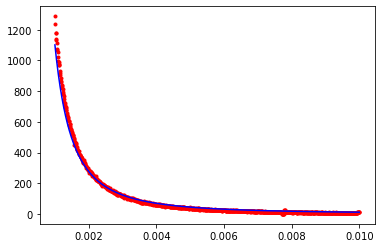

In [6]:
for _ in range(loops):
    %time r_everest = [ lib.get_random_ruth(z,emr,t0,t1, n_iter) for _ in range(n) ]
    %time r_k2      = [ k2ran.get_random_ruth(cgen) for _ in range(n) ]
    S_everest = np.array([ *S_everest, test_random(r_everest, bins, f) ])
    S_K2      = np.array([ *S_K2, test_random(r_k2, bins, f) ])

In [11]:
print(np.sqrt(S_everest.mean()))
print(np.sqrt(S_K2.mean()))
print(np.sqrt(S_everest / S_K2))
print(np.sqrt((S_everest / S_K2).mean()))

171.70507722144475
667.9669867341794
[0.24861923 0.24836037 0.26609191 0.2616542  0.25270151 0.25130294
 0.26291459 0.25882519 0.24819372 0.25780791 0.27562417 0.24960608
 0.26466487 0.25944632 0.25624412 0.24771144 0.26594635 0.25625414
 0.25105846 0.25709266]
0.25711159517094645


## 5000 samples, 20 iterations

In [15]:
lib.set_random_seed(1669281221)
k2ran.set_random_seed(1669281221)

n = 5000
n_iter = 20
bins = 100

loops = 20
S_everest = []
S_K2 = []
f = lambda x: PDF(x,z,emr)/CDF(t1,z,emr,t0)

CPU times: user 33.8 ms, sys: 1.17 ms, total: 35 ms
Wall time: 34.2 ms
CPU times: user 24.9 ms, sys: 16.5 ms, total: 41.4 ms
Wall time: 27.9 ms
34265.2036012612


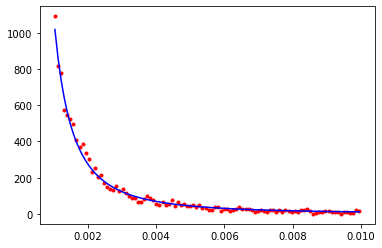

44609.49154034676


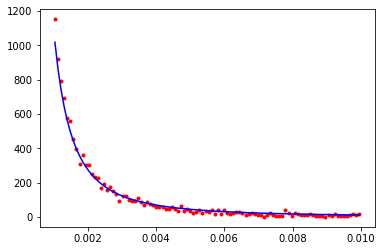

CPU times: user 66.5 ms, sys: 10.5 ms, total: 77 ms
Wall time: 26.2 ms
CPU times: user 35.2 ms, sys: 7.08 ms, total: 42.3 ms
Wall time: 14.3 ms
23798.130715746982


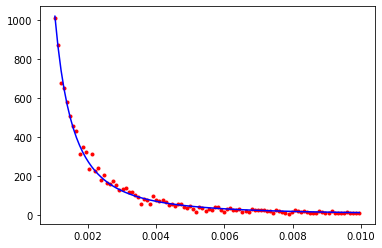

86212.90521264891


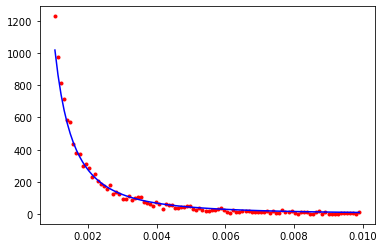

CPU times: user 66.3 ms, sys: 9.94 ms, total: 76.3 ms
Wall time: 25.9 ms
CPU times: user 35.2 ms, sys: 7.67 ms, total: 42.8 ms
Wall time: 14.4 ms
33707.0509214404


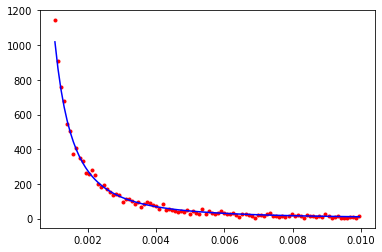

80240.09515553835


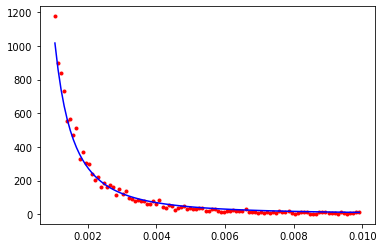

CPU times: user 65.6 ms, sys: 10.5 ms, total: 76.1 ms
Wall time: 26 ms
CPU times: user 34.8 ms, sys: 7.83 ms, total: 42.6 ms
Wall time: 14.4 ms
22971.76563249876


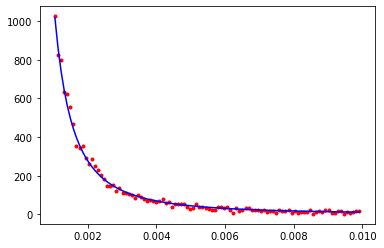

54258.692894147214


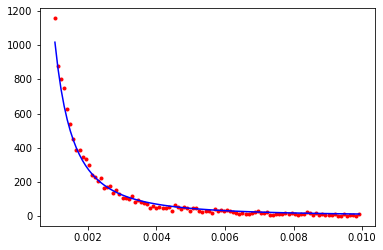

CPU times: user 68.1 ms, sys: 16.3 ms, total: 84.4 ms
Wall time: 30.2 ms
CPU times: user 26.8 ms, sys: 10.2 ms, total: 37 ms
Wall time: 17.7 ms
37952.5236008019


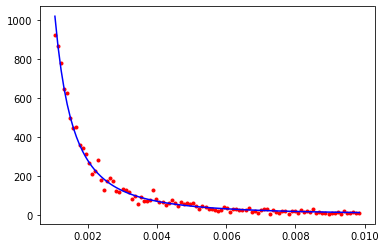

75388.8549165297


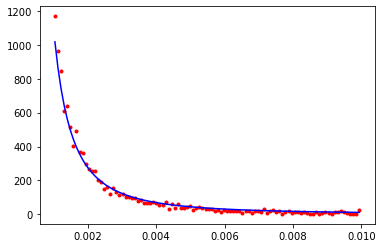

CPU times: user 70.9 ms, sys: 13.7 ms, total: 84.7 ms
Wall time: 29.5 ms
CPU times: user 34.5 ms, sys: 7.36 ms, total: 41.9 ms
Wall time: 14.3 ms
27030.326872312966


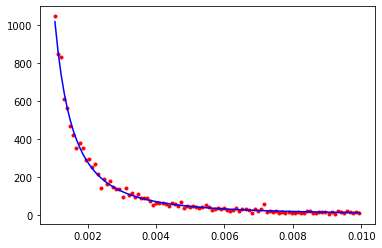

58234.598624525424


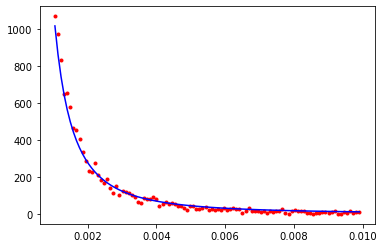

CPU times: user 65.5 ms, sys: 10.5 ms, total: 76 ms
Wall time: 25.9 ms
CPU times: user 35.3 ms, sys: 9.51 ms, total: 44.8 ms
Wall time: 15.1 ms
34152.37650432286


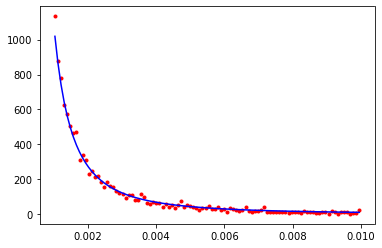

59141.26249904475


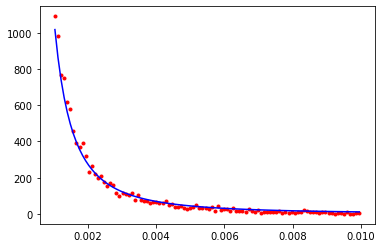

CPU times: user 65.8 ms, sys: 10.2 ms, total: 76 ms
Wall time: 25.8 ms
CPU times: user 34.4 ms, sys: 7.91 ms, total: 42.3 ms
Wall time: 14.4 ms
24791.43915441968


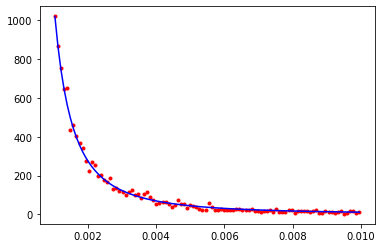

56839.87469795956


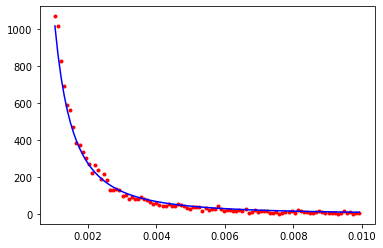

CPU times: user 67.4 ms, sys: 13.2 ms, total: 80.6 ms
Wall time: 28.1 ms
CPU times: user 39.1 ms, sys: 18.6 ms, total: 57.7 ms
Wall time: 20.1 ms
22887.674733214713


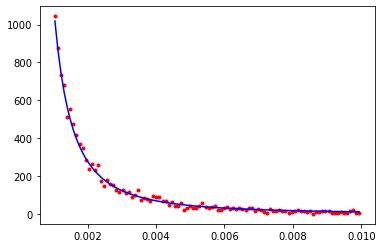

61384.96542312595


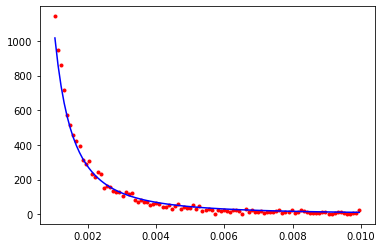

CPU times: user 66.7 ms, sys: 9.18 ms, total: 75.9 ms
Wall time: 25.5 ms
CPU times: user 35.1 ms, sys: 6.95 ms, total: 42 ms
Wall time: 14.1 ms
24725.14947728871


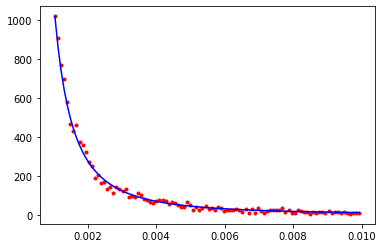

82981.33757275317


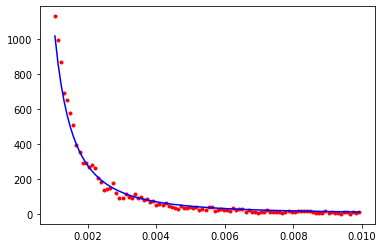

CPU times: user 64.8 ms, sys: 10.5 ms, total: 75.3 ms
Wall time: 25.8 ms
CPU times: user 34.6 ms, sys: 8.7 ms, total: 43.3 ms
Wall time: 14.6 ms
40254.47250773962


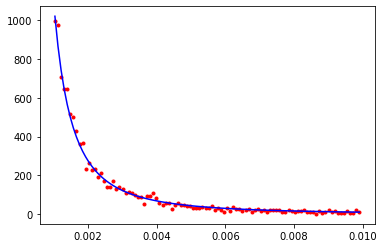

85505.03133926871


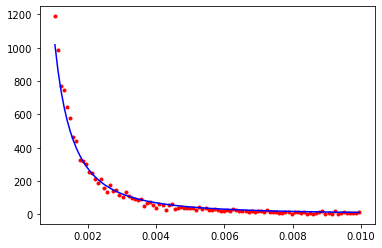

CPU times: user 66.3 ms, sys: 9.75 ms, total: 76 ms
Wall time: 25.7 ms
CPU times: user 35.5 ms, sys: 8.82 ms, total: 44.3 ms
Wall time: 14.9 ms
35523.06471014304


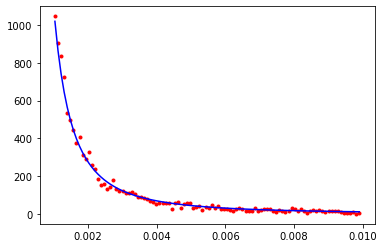

85400.71929411333


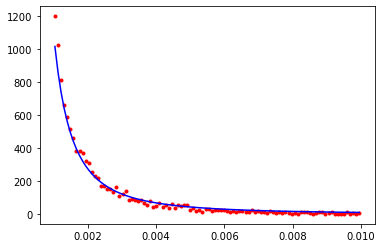

CPU times: user 66.5 ms, sys: 9.9 ms, total: 76.4 ms
Wall time: 25.9 ms
CPU times: user 34.9 ms, sys: 6.67 ms, total: 41.5 ms
Wall time: 13.9 ms
18917.199417031192


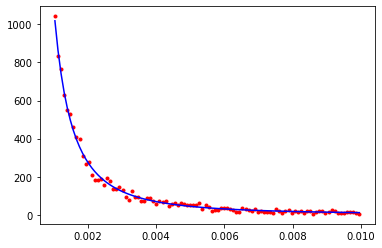

65604.79108518257


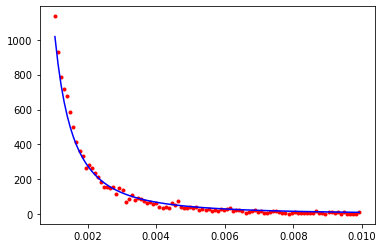

CPU times: user 66.4 ms, sys: 9.76 ms, total: 76.2 ms
Wall time: 25.8 ms
CPU times: user 34.6 ms, sys: 6.83 ms, total: 41.4 ms
Wall time: 13.9 ms
28984.646568987802


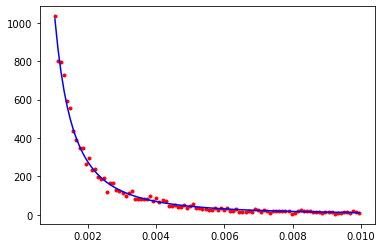

60633.11686215419


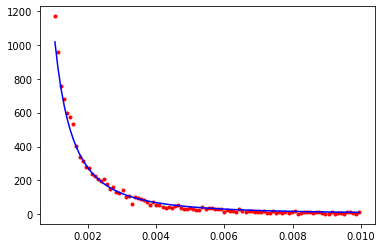

CPU times: user 66.1 ms, sys: 9.86 ms, total: 76 ms
Wall time: 25.7 ms
CPU times: user 40.5 ms, sys: 40.2 ms, total: 80.6 ms
Wall time: 24.9 ms
32231.11385370832


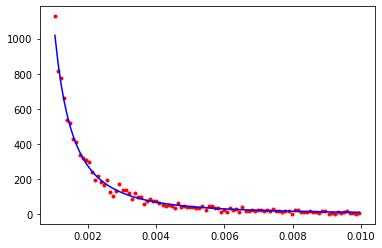

76279.50198061319


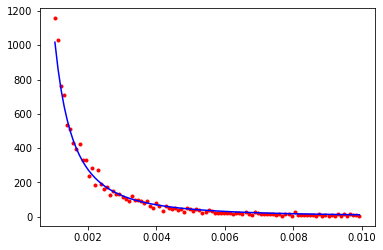

CPU times: user 66.6 ms, sys: 9.6 ms, total: 76.2 ms
Wall time: 25.8 ms
CPU times: user 35.1 ms, sys: 6.81 ms, total: 41.9 ms
Wall time: 14.1 ms
23198.01073899712


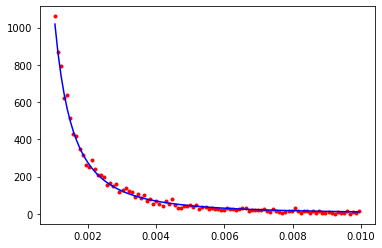

62825.22532696312


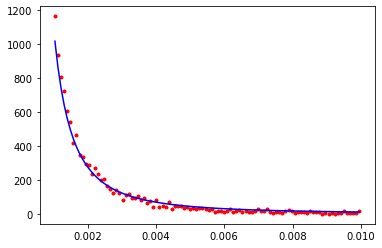

CPU times: user 66.3 ms, sys: 9.69 ms, total: 76 ms
Wall time: 25.7 ms
CPU times: user 34 ms, sys: 6.18 ms, total: 40.1 ms
Wall time: 13.6 ms
19026.87355228981


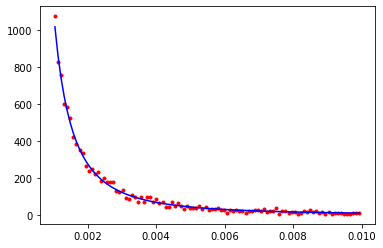

71418.58811951554


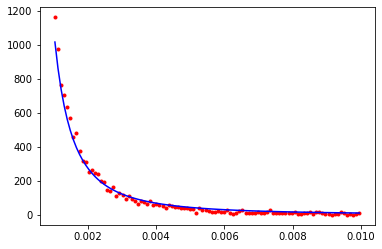

CPU times: user 66.6 ms, sys: 9.72 ms, total: 76.3 ms
Wall time: 25.8 ms
CPU times: user 34.8 ms, sys: 7.74 ms, total: 42.6 ms
Wall time: 14.3 ms
24752.562737859906


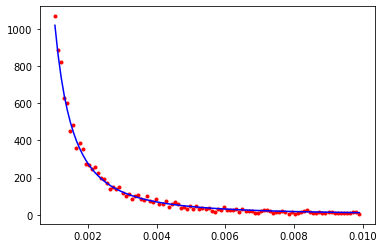

70581.6999548983


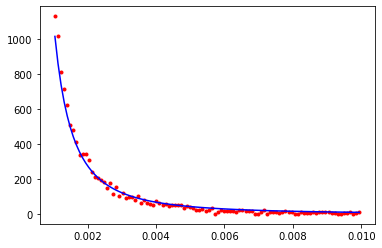

CPU times: user 66.4 ms, sys: 9.81 ms, total: 76.2 ms
Wall time: 25.8 ms
CPU times: user 35 ms, sys: 7.57 ms, total: 42.5 ms
Wall time: 14.3 ms
28807.11330059865


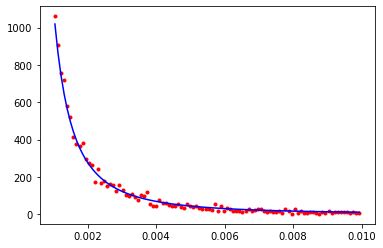

31620.168820599552


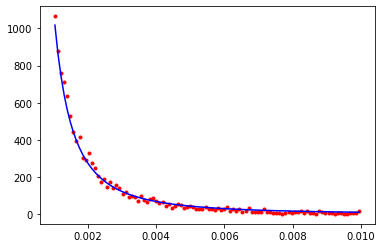

CPU times: user 65.7 ms, sys: 10.1 ms, total: 75.8 ms
Wall time: 25.8 ms
CPU times: user 35.5 ms, sys: 7.63 ms, total: 43.1 ms
Wall time: 14.4 ms
19571.87756910282


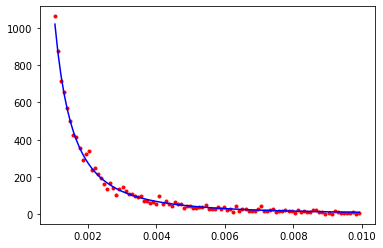

67873.62356429608


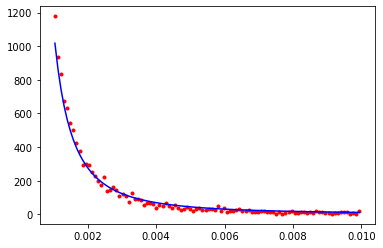

In [16]:
for _ in range(loops):
    %time r_everest = [ lib.get_random_ruth(z,emr,t0,t1, n_iter) for _ in range(n) ]
    %time r_k2      = [ k2ran.get_random_ruth(cgen) for _ in range(n) ]
    S_everest = np.array([ *S_everest, test_random(r_everest, bins, f) ])
    S_K2      = np.array([ *S_K2, test_random(r_k2, bins, f) ])

In [17]:
print(np.sqrt(S_everest.mean()))
print(np.sqrt(S_K2.mean()))
print(np.sqrt(S_everest / S_K2))
print(np.sqrt((S_everest / S_K2).mean()))

166.96535211979855
258.55700965978707
[0.8764215  0.52539421 0.64813379 0.65067261 0.70952345 0.68129485
 0.75991527 0.66042623 0.61061832 0.54585746 0.68613762 0.64494763
 0.53698313 0.69139949 0.6500305  0.60765678 0.51615256 0.59219403
 0.95448208 0.53698942]
0.6633647194674397


## 5000 samples, 10 iterations

In [18]:
lib.set_random_seed(1669281221)
k2ran.set_random_seed(1669281221)

n = 5000
n_iter = 10
bins = 100

loops = 20
S_everest = []
S_K2 = []
f = lambda x: PDF(x,z,emr)/CDF(t1,z,emr,t0)

CPU times: user 18.8 ms, sys: 1.02 ms, total: 19.8 ms
Wall time: 19.1 ms
CPU times: user 22.1 ms, sys: 11 ms, total: 33 ms
Wall time: 25.1 ms
38278.572960403966


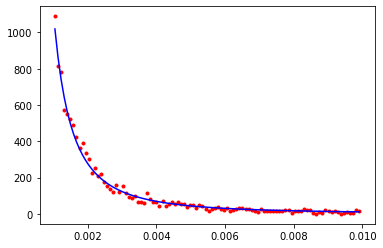

44609.49154034676


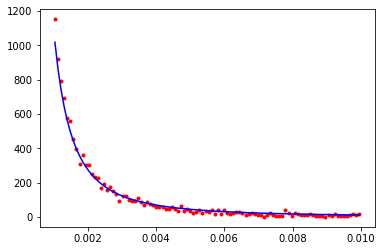

CPU times: user 36.3 ms, sys: 6.32 ms, total: 42.6 ms
Wall time: 14.6 ms
CPU times: user 34.9 ms, sys: 7.53 ms, total: 42.4 ms
Wall time: 14.5 ms
24729.31832090626


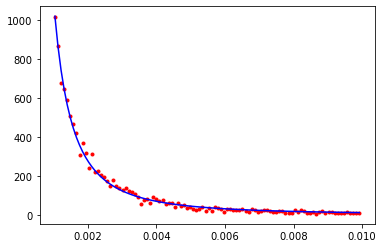

86212.90521264891


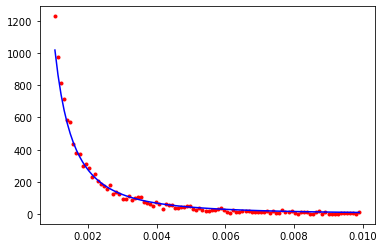

CPU times: user 36.5 ms, sys: 6.12 ms, total: 42.6 ms
Wall time: 14.5 ms
CPU times: user 40.7 ms, sys: 40.2 ms, total: 80.9 ms
Wall time: 25 ms
34601.60104061621


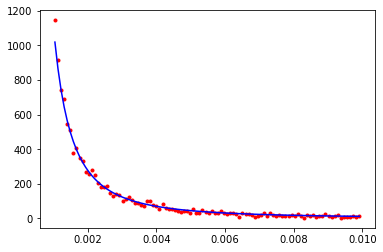

80240.09515553835


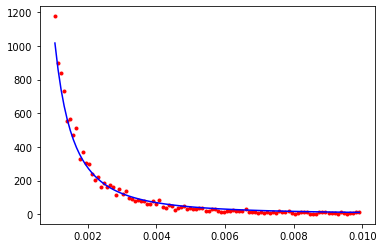

CPU times: user 36.6 ms, sys: 5.77 ms, total: 42.4 ms
Wall time: 14.4 ms
CPU times: user 34.8 ms, sys: 7.92 ms, total: 42.7 ms
Wall time: 14.5 ms
24900.92597463408


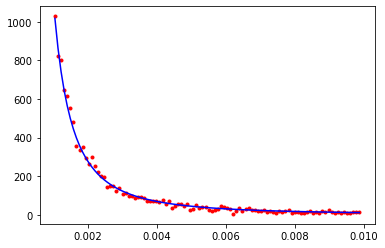

54258.692894147214


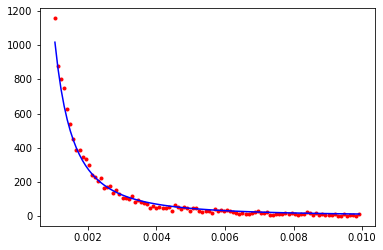

CPU times: user 36 ms, sys: 6.05 ms, total: 42.1 ms
Wall time: 14.4 ms
CPU times: user 34.2 ms, sys: 7.34 ms, total: 41.6 ms
Wall time: 14 ms
39598.4391148962


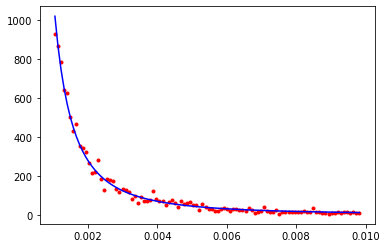

75388.8549165297


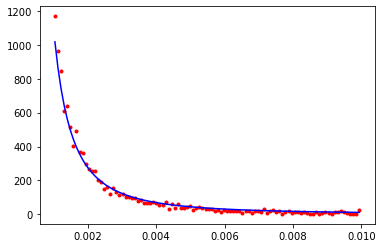

CPU times: user 36.4 ms, sys: 6.16 ms, total: 42.5 ms
Wall time: 14.6 ms
CPU times: user 34.2 ms, sys: 7.77 ms, total: 42 ms
Wall time: 14.3 ms
25000.63871025911


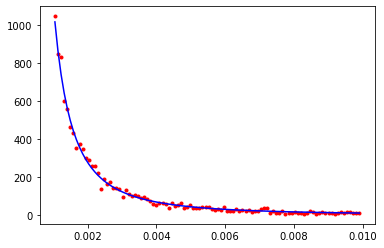

58234.598624525424


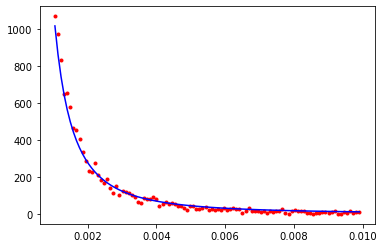

CPU times: user 36.9 ms, sys: 5.52 ms, total: 42.4 ms
Wall time: 14.3 ms
CPU times: user 34.2 ms, sys: 6.31 ms, total: 40.5 ms
Wall time: 13.7 ms
36415.16681279862


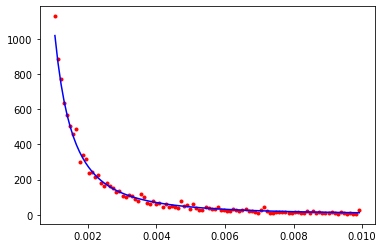

59141.26249904475


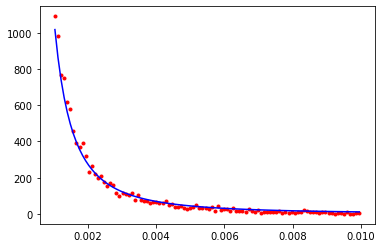

CPU times: user 36.4 ms, sys: 5.68 ms, total: 42.1 ms
Wall time: 14.3 ms
CPU times: user 34.6 ms, sys: 9.11 ms, total: 43.7 ms
Wall time: 14.9 ms
24134.06852923943


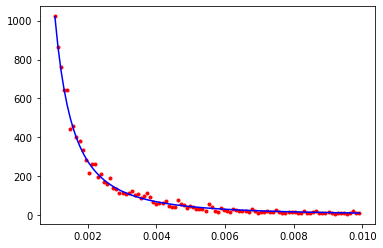

56839.87469795956


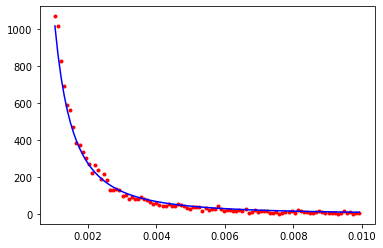

CPU times: user 36.7 ms, sys: 5.81 ms, total: 42.5 ms
Wall time: 14.4 ms
CPU times: user 36.1 ms, sys: 16.8 ms, total: 52.9 ms
Wall time: 17.2 ms
25704.67809025441


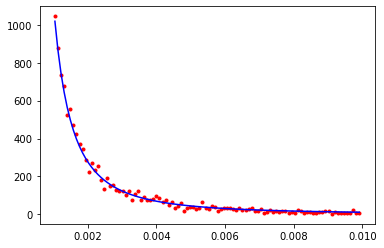

61384.96542312595


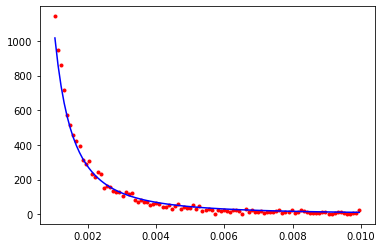

CPU times: user 36.4 ms, sys: 6.27 ms, total: 42.7 ms
Wall time: 14.6 ms
CPU times: user 35.4 ms, sys: 10 ms, total: 45.4 ms
Wall time: 15.4 ms
24011.71258084964


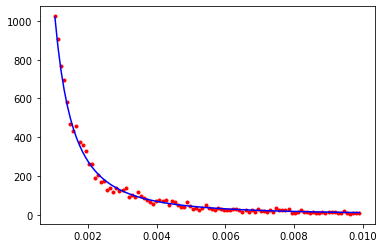

82981.33757275317


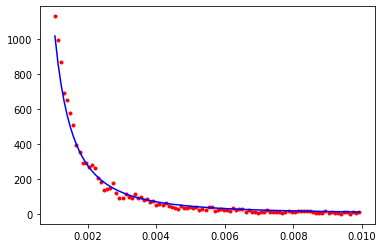

CPU times: user 36.1 ms, sys: 6.36 ms, total: 42.5 ms
Wall time: 14.6 ms
CPU times: user 34.6 ms, sys: 7.69 ms, total: 42.3 ms
Wall time: 14.2 ms
41485.30982079278


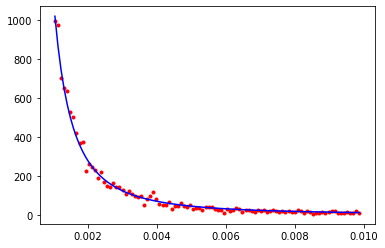

85505.03133926871


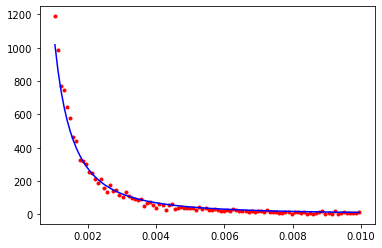

CPU times: user 36.9 ms, sys: 5.82 ms, total: 42.7 ms
Wall time: 14.5 ms
CPU times: user 34.7 ms, sys: 8.5 ms, total: 43.2 ms
Wall time: 14.6 ms
32617.98635417501


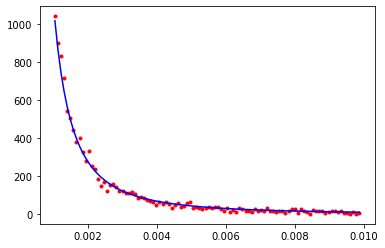

85400.71929411333


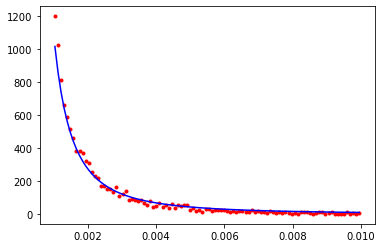

CPU times: user 37.1 ms, sys: 5.89 ms, total: 42.9 ms
Wall time: 14.5 ms
CPU times: user 34.9 ms, sys: 8.45 ms, total: 43.4 ms
Wall time: 14.8 ms
18811.174052107996


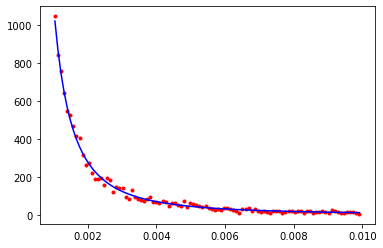

65604.79108518257


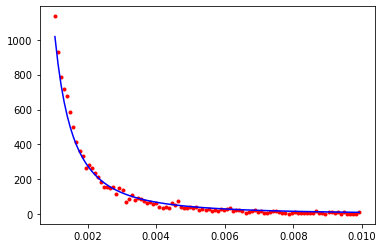

CPU times: user 36.1 ms, sys: 6.36 ms, total: 42.5 ms
Wall time: 14.6 ms
CPU times: user 34.3 ms, sys: 5.43 ms, total: 39.7 ms
Wall time: 13.3 ms
31495.863290844776


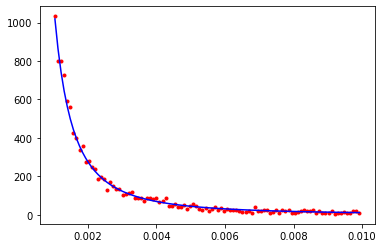

60633.11686215419


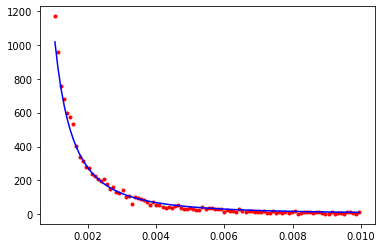

CPU times: user 36.8 ms, sys: 5.63 ms, total: 42.5 ms
Wall time: 14.4 ms
CPU times: user 33.9 ms, sys: 5.96 ms, total: 39.8 ms
Wall time: 13.5 ms
30128.862862603157


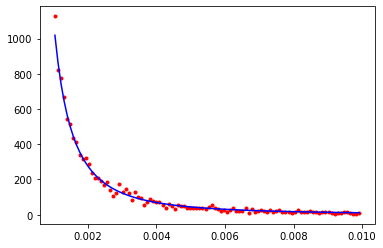

76279.50198061319


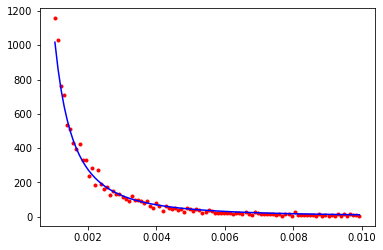

CPU times: user 36.8 ms, sys: 5.68 ms, total: 42.4 ms
Wall time: 14.4 ms
CPU times: user 34.3 ms, sys: 6.16 ms, total: 40.5 ms
Wall time: 13.7 ms
26820.553097152726


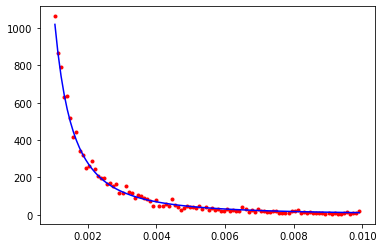

62825.22532696312


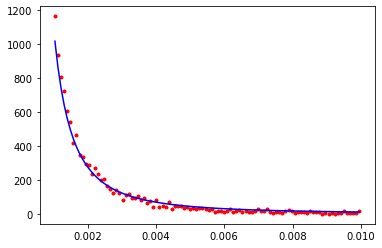

CPU times: user 36.1 ms, sys: 5.92 ms, total: 42.1 ms
Wall time: 14.3 ms
CPU times: user 34.7 ms, sys: 8.47 ms, total: 43.2 ms
Wall time: 14.4 ms
19000.3551265451


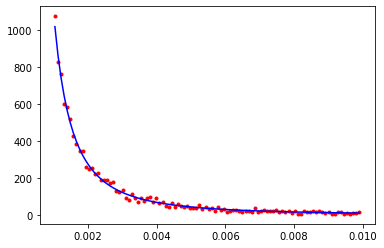

71418.58811951554


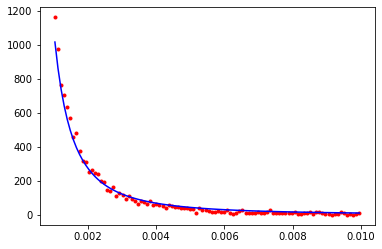

CPU times: user 27.3 ms, sys: 4.02 ms, total: 31.3 ms
Wall time: 16.6 ms
CPU times: user 40.8 ms, sys: 9.99 ms, total: 50.7 ms
Wall time: 17.3 ms
25269.518795658925


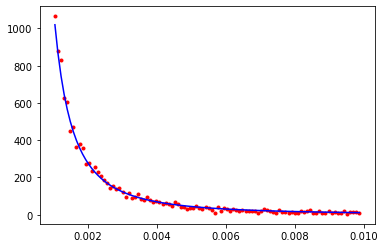

70581.6999548983


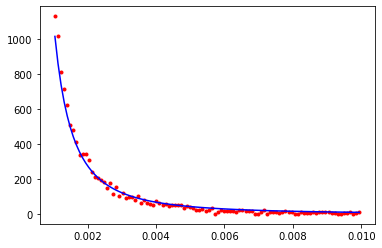

CPU times: user 36.4 ms, sys: 5.92 ms, total: 42.3 ms
Wall time: 14.4 ms
CPU times: user 34.6 ms, sys: 7.37 ms, total: 41.9 ms
Wall time: 14 ms
29714.20439465165


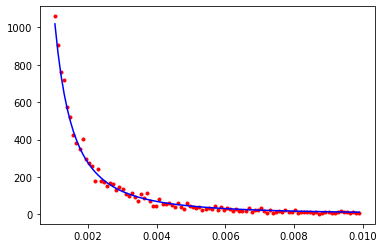

31620.168820599552


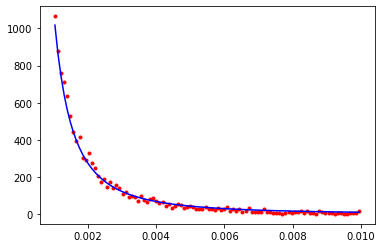

CPU times: user 36.3 ms, sys: 6.01 ms, total: 42.3 ms
Wall time: 14.5 ms
CPU times: user 35.5 ms, sys: 6.34 ms, total: 41.8 ms
Wall time: 14 ms
16270.699257938353


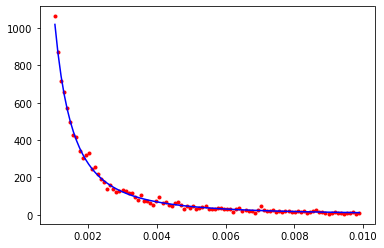

67873.62356429608


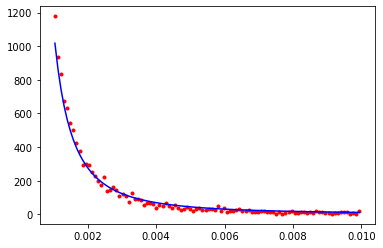

In [19]:
for _ in range(loops):
    %time r_everest = [ lib.get_random_ruth(z,emr,t0,t1, n_iter) for _ in range(n) ]
    %time r_k2      = [ k2ran.get_random_ruth(cgen) for _ in range(n) ]
    S_everest = np.array([ *S_everest, test_random(r_everest, bins, f) ])
    S_K2      = np.array([ *S_K2, test_random(r_k2, bins, f) ])

In [20]:
print(np.sqrt(S_everest.mean()))
print(np.sqrt(S_K2.mean()))
print(np.sqrt(S_everest / S_K2))
print(np.sqrt((S_everest / S_K2).mean()))

168.66974375793194
258.55700965978707
[0.92632681 0.53557455 0.65667787 0.67744351 0.72474539 0.65521678
 0.78468591 0.65161146 0.64710548 0.53792453 0.69654846 0.61801328
 0.5354762  0.72072869 0.62847419 0.65338151 0.51579274 0.59834605
 0.96939318 0.48961261]
0.6721895358268942


## 5000 samples, 5 iterations

In [21]:
lib.set_random_seed(1669281221)
k2ran.set_random_seed(1669281221)

n = 5000
n_iter = 5
bins = 100

loops = 20
S_everest = []
S_K2 = []
f = lambda x: PDF(x,z,emr)/CDF(t1,z,emr,t0)

CPU times: user 11.3 ms, sys: 1.28 ms, total: 12.6 ms
Wall time: 11.6 ms
CPU times: user 23.8 ms, sys: 10.2 ms, total: 34 ms
Wall time: 27.2 ms
32692.21078162001


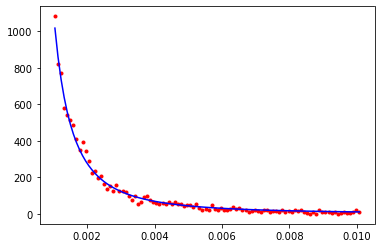

44609.49154034676


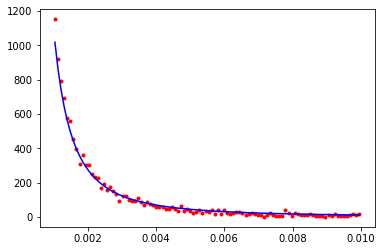

CPU times: user 22 ms, sys: 3.83 ms, total: 25.8 ms
Wall time: 8.81 ms
CPU times: user 35.4 ms, sys: 9.53 ms, total: 44.9 ms
Wall time: 15.3 ms
19653.976339740002


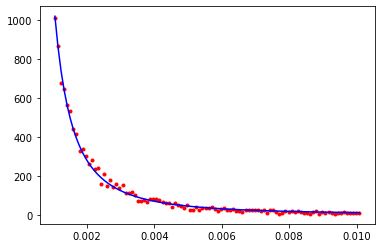

86212.90521264891


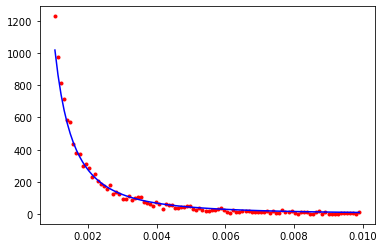

CPU times: user 21.8 ms, sys: 3.72 ms, total: 25.5 ms
Wall time: 8.7 ms
CPU times: user 35.2 ms, sys: 8.02 ms, total: 43.2 ms
Wall time: 14.6 ms
33022.51390186224


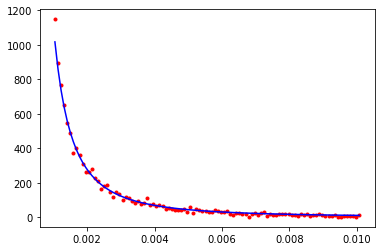

80240.09515553835


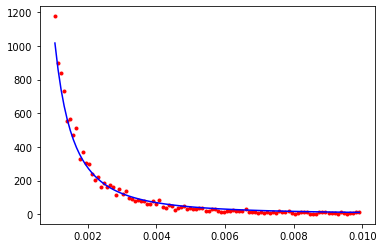

CPU times: user 21.8 ms, sys: 3.68 ms, total: 25.5 ms
Wall time: 8.67 ms
CPU times: user 35 ms, sys: 8.76 ms, total: 43.8 ms
Wall time: 14.7 ms
27260.021238437064


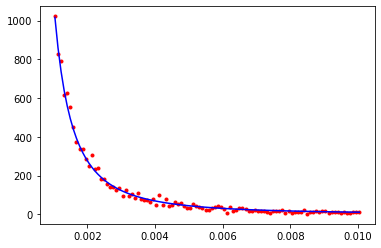

54258.692894147214


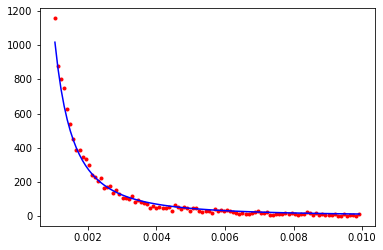

CPU times: user 21.7 ms, sys: 3.8 ms, total: 25.5 ms
Wall time: 8.73 ms
CPU times: user 35.5 ms, sys: 9.71 ms, total: 45.2 ms
Wall time: 15.1 ms
32444.95376385725


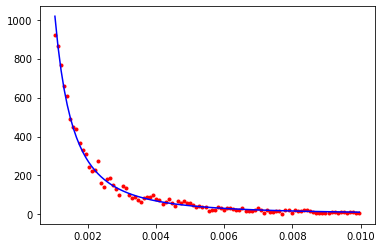

75388.8549165297


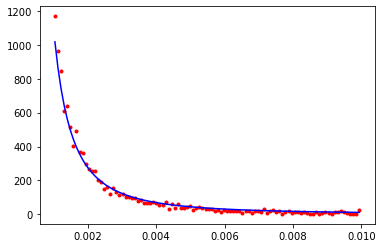

CPU times: user 21.8 ms, sys: 3.8 ms, total: 25.6 ms
Wall time: 8.73 ms
CPU times: user 36 ms, sys: 10.2 ms, total: 46.1 ms
Wall time: 15.3 ms
28243.820982746278


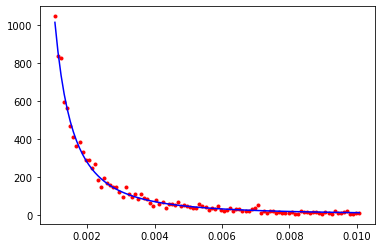

58234.598624525424


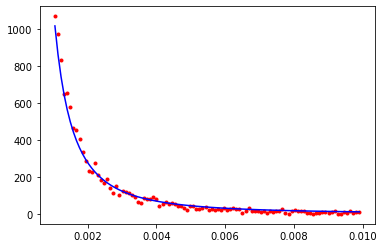

CPU times: user 21.8 ms, sys: 3.69 ms, total: 25.5 ms
Wall time: 8.7 ms
CPU times: user 35.1 ms, sys: 10.6 ms, total: 45.7 ms
Wall time: 15.4 ms
34364.233715735034


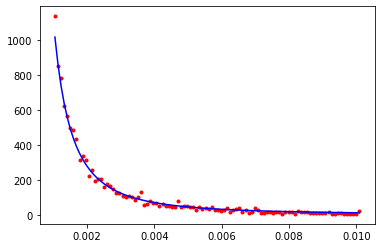

59141.26249904475


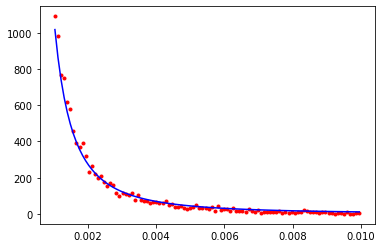

CPU times: user 22.3 ms, sys: 3.47 ms, total: 25.8 ms
Wall time: 8.7 ms
CPU times: user 34.3 ms, sys: 8.5 ms, total: 42.8 ms
Wall time: 14.6 ms
27366.0097353171


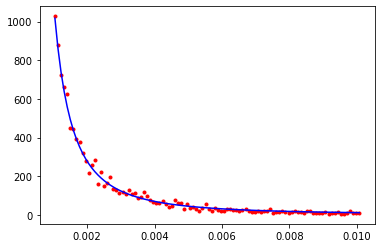

56839.87469795956


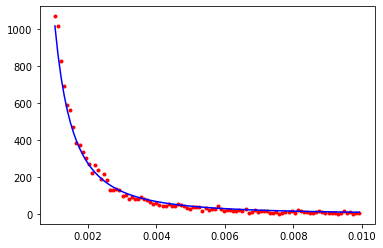

CPU times: user 21.7 ms, sys: 3.83 ms, total: 25.5 ms
Wall time: 8.76 ms
CPU times: user 34.8 ms, sys: 7.56 ms, total: 42.3 ms
Wall time: 14.3 ms
20915.092720312805


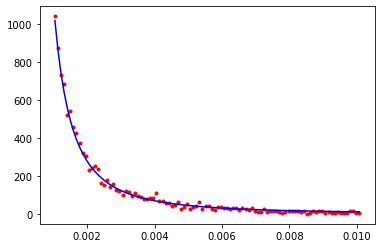

61384.96542312595


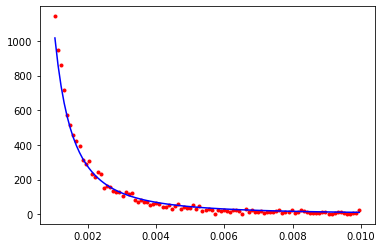

CPU times: user 21.7 ms, sys: 4.11 ms, total: 25.8 ms
Wall time: 8.87 ms
CPU times: user 34.4 ms, sys: 7.71 ms, total: 42.1 ms
Wall time: 14.2 ms
27692.23756264618


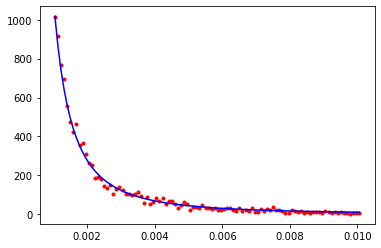

82981.33757275317


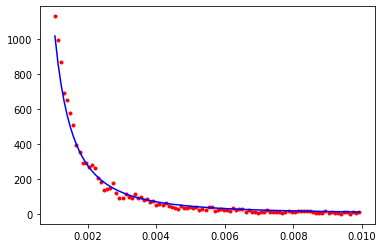

CPU times: user 21.4 ms, sys: 3.8 ms, total: 25.2 ms
Wall time: 8.72 ms
CPU times: user 34.9 ms, sys: 10.5 ms, total: 45.3 ms
Wall time: 15.6 ms
33037.16330208706


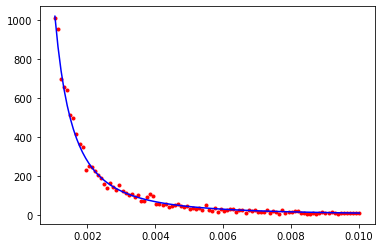

85505.03133926871


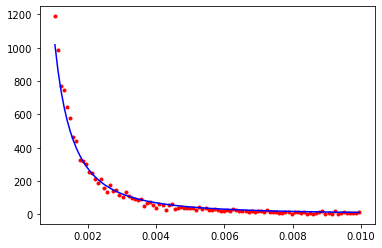

CPU times: user 21.5 ms, sys: 4.16 ms, total: 25.7 ms
Wall time: 8.83 ms
CPU times: user 35.7 ms, sys: 10.6 ms, total: 46.4 ms
Wall time: 15.8 ms
32942.428608779286


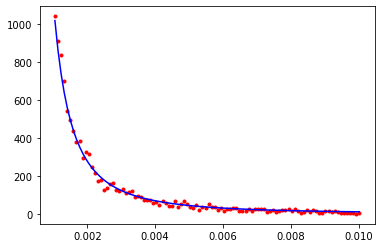

85400.71929411333


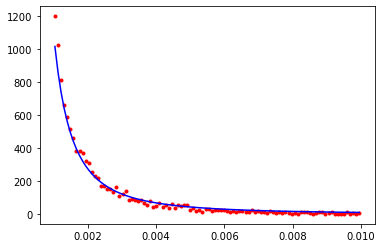

CPU times: user 21.5 ms, sys: 3.87 ms, total: 25.4 ms
Wall time: 8.71 ms
CPU times: user 34.2 ms, sys: 7.32 ms, total: 41.5 ms
Wall time: 14 ms
18126.182657562316


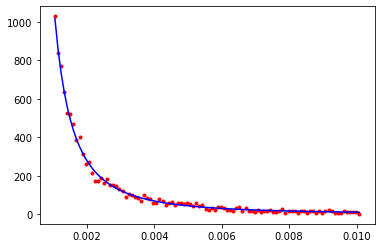

65604.79108518257


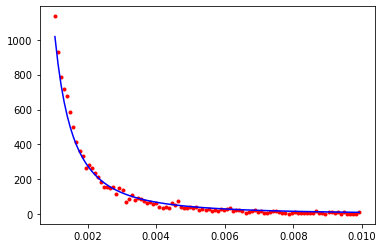

CPU times: user 21 ms, sys: 3.84 ms, total: 24.8 ms
Wall time: 8.76 ms
CPU times: user 34.3 ms, sys: 7.12 ms, total: 41.4 ms
Wall time: 14 ms
28479.60658060775


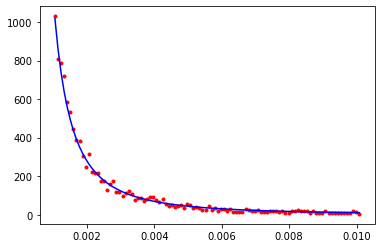

60633.11686215419


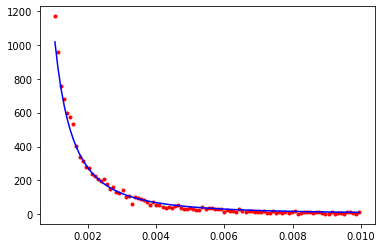

CPU times: user 21.8 ms, sys: 4.07 ms, total: 25.8 ms
Wall time: 8.87 ms
CPU times: user 34.2 ms, sys: 7.54 ms, total: 41.8 ms
Wall time: 14.2 ms
30817.88933920995


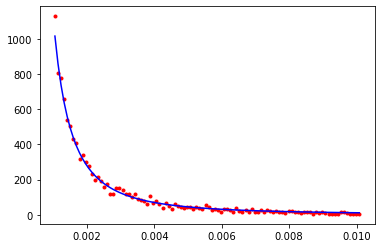

76279.50198061319


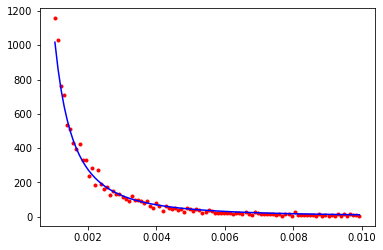

CPU times: user 21.2 ms, sys: 4.45 ms, total: 25.6 ms
Wall time: 8.91 ms
CPU times: user 37.1 ms, sys: 18.2 ms, total: 55.2 ms
Wall time: 17.9 ms
26787.392984811384


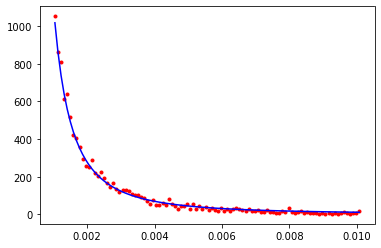

62825.22532696312


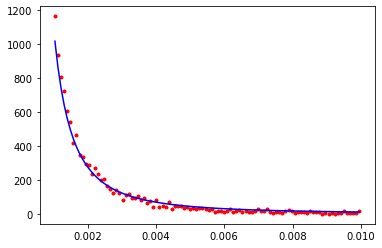

CPU times: user 21.9 ms, sys: 3.62 ms, total: 25.5 ms
Wall time: 8.67 ms
CPU times: user 34.1 ms, sys: 8.45 ms, total: 42.6 ms
Wall time: 14.4 ms
15613.958832815146


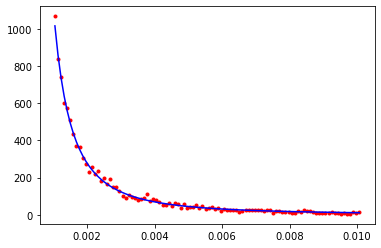

71418.58811951554


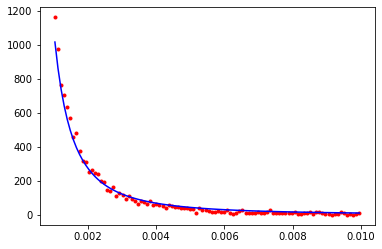

CPU times: user 22 ms, sys: 3.67 ms, total: 25.6 ms
Wall time: 8.69 ms
CPU times: user 34.5 ms, sys: 7.16 ms, total: 41.6 ms
Wall time: 14.2 ms
26275.403706565


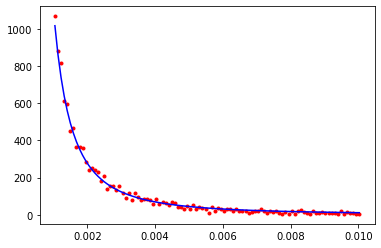

70581.6999548983


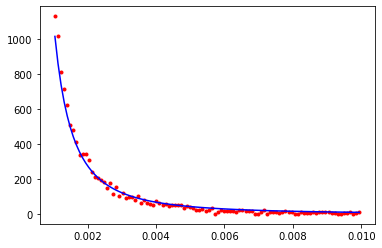

CPU times: user 21.4 ms, sys: 4.03 ms, total: 25.4 ms
Wall time: 8.74 ms
CPU times: user 35.7 ms, sys: 11 ms, total: 46.6 ms
Wall time: 15.5 ms
23032.483616436668


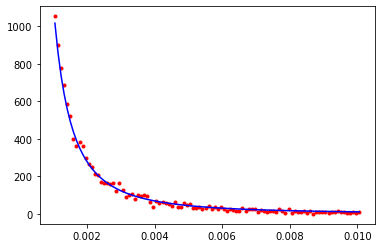

31620.168820599552


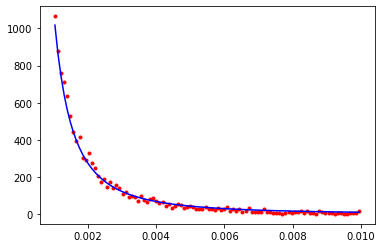

CPU times: user 21.9 ms, sys: 3.92 ms, total: 25.8 ms
Wall time: 8.81 ms
CPU times: user 34.3 ms, sys: 7.31 ms, total: 41.6 ms
Wall time: 14.2 ms
22271.115409542686


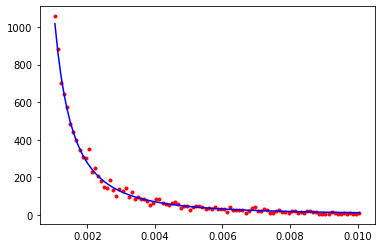

67873.62356429608


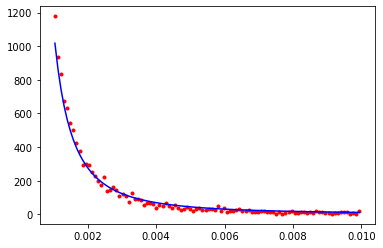

In [22]:
for _ in range(loops):
    %time r_everest = [ lib.get_random_ruth(z,emr,t0,t1, n_iter) for _ in range(n) ]
    %time r_k2      = [ k2ran.get_random_ruth(cgen) for _ in range(n) ]
    S_everest = np.array([ *S_everest, test_random(r_everest, bins, f) ])
    S_K2      = np.array([ *S_K2, test_random(r_k2, bins, f) ])

In [23]:
print(np.sqrt(S_everest.mean()))
print(np.sqrt(S_K2.mean()))
print(np.sqrt(S_everest / S_K2))
print(np.sqrt((S_everest / S_K2).mean()))

164.47472386064237
258.55700965978707
[0.85606848 0.47746229 0.64151874 0.70880771 0.65602442 0.69641992
 0.76226861 0.69387171 0.58371236 0.57768196 0.62159218 0.62107928
 0.52563636 0.68534941 0.63561995 0.65297747 0.46757457 0.6101388
 0.85347007 0.57282303]
0.6528029394747467


## 100 samples, loop over iterations

In [32]:
lib.set_random_seed(1669281221)
k2ran.set_random_seed(1669281221)

n = 100
n_iter = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
bins = 15

loops = 20
S_everest = { nn: [] for nn in n_iter }
S_K2 = []
f = lambda x: PDF(x,z,emr)/CDF(t1,z,emr,t0)

CPU times: user 413 µs, sys: 180 µs, total: 593 µs
Wall time: 467 µs
25906.04834027345


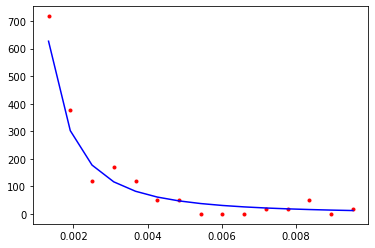

CPU times: user 1.44 ms, sys: 681 µs, total: 2.12 ms
Wall time: 745 µs
27009.93336517974


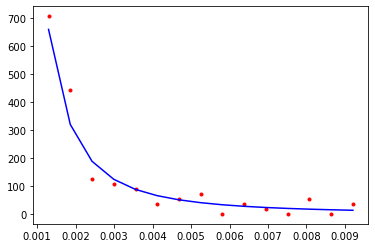

CPU times: user 1.55 ms, sys: 593 µs, total: 2.14 ms
Wall time: 727 µs
50724.94963911556


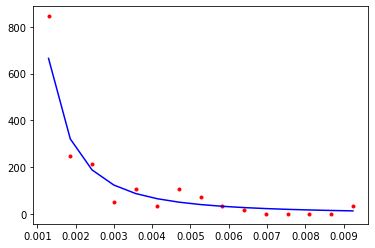

CPU times: user 1.88 ms, sys: 611 µs, total: 2.49 ms
Wall time: 842 µs
19601.929613982258


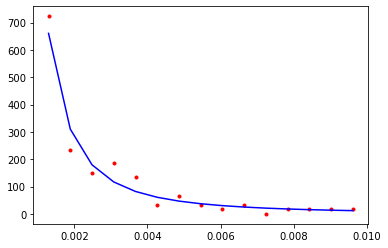

CPU times: user 2.2 ms, sys: 799 µs, total: 3 ms
Wall time: 1.06 ms
14273.387919313618


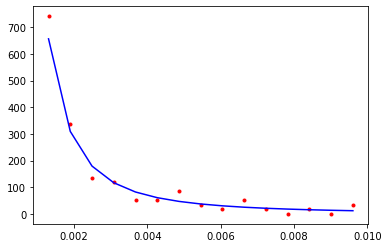

CPU times: user 2.46 ms, sys: 790 µs, total: 3.25 ms
Wall time: 1.13 ms
75829.59567303101


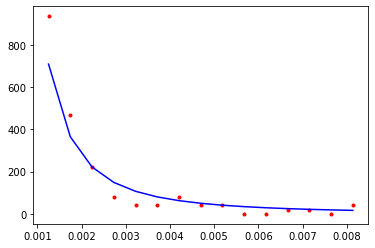

CPU times: user 2.74 ms, sys: 911 µs, total: 3.65 ms
Wall time: 1.28 ms
49406.68837858277


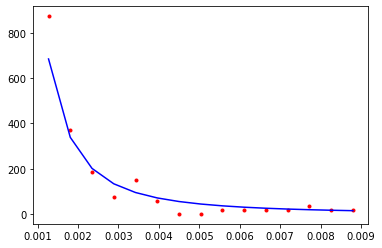

CPU times: user 2.88 ms, sys: 730 µs, total: 3.61 ms
Wall time: 1.22 ms
33345.18679067665


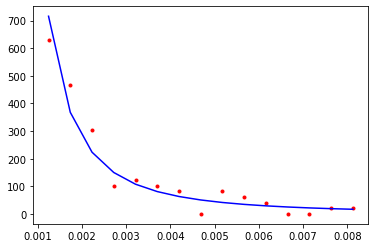

CPU times: user 3.13 ms, sys: 842 µs, total: 3.97 ms
Wall time: 1.36 ms
31831.72423497319


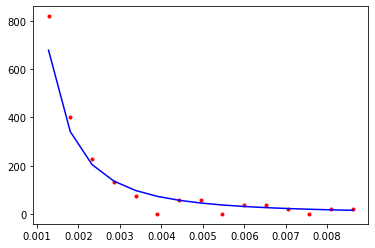

CPU times: user 3.56 ms, sys: 955 µs, total: 4.52 ms
Wall time: 1.55 ms
19051.7656928191


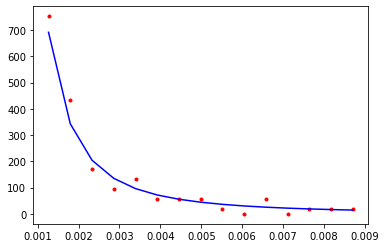

CPU times: user 3.58 ms, sys: 1.15 ms, total: 4.73 ms
Wall time: 1.65 ms
27291.825727164814


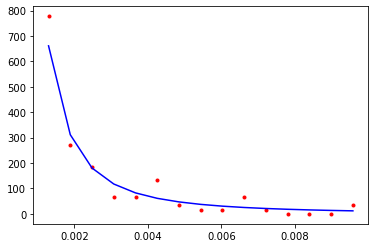

CPU times: user 4.12 ms, sys: 953 µs, total: 5.07 ms
Wall time: 1.72 ms
29625.021006554955


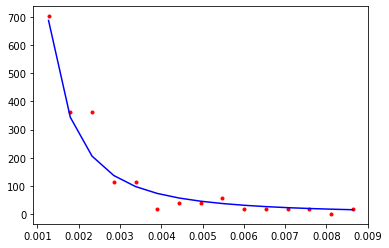

CPU times: user 4.54 ms, sys: 1.16 ms, total: 5.7 ms
Wall time: 1.95 ms
62840.59758339397


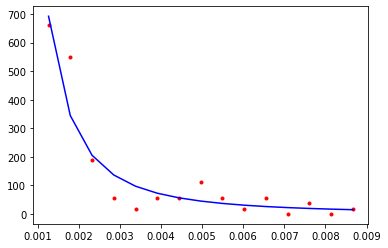

CPU times: user 4.61 ms, sys: 1.13 ms, total: 5.73 ms
Wall time: 1.95 ms
19831.11906481596


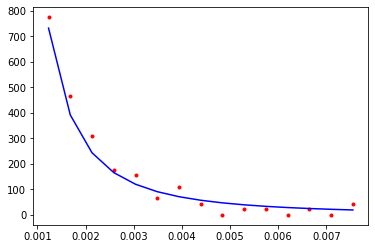

CPU times: user 4.81 ms, sys: 1.17 ms, total: 5.97 ms
Wall time: 2.04 ms
44943.290511037994


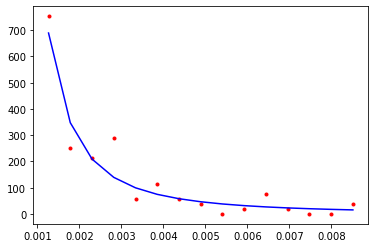

CPU times: user 5.17 ms, sys: 1.2 ms, total: 6.37 ms
Wall time: 2.16 ms
7179.467486481486


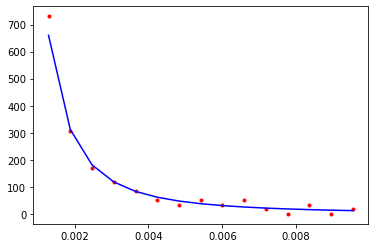

CPU times: user 5.69 ms, sys: 1.18 ms, total: 6.87 ms
Wall time: 2.32 ms
54860.32118631361


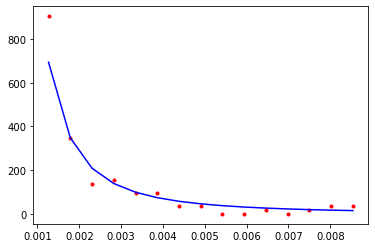

CPU times: user 6.03 ms, sys: 1.3 ms, total: 7.33 ms
Wall time: 2.49 ms
21237.6262300682


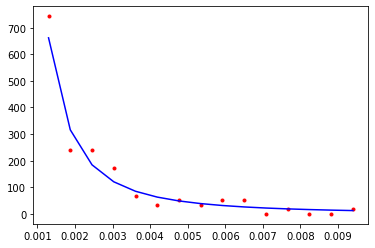

CPU times: user 6.31 ms, sys: 1.7 ms, total: 8.01 ms
Wall time: 2.77 ms
36153.42428962329


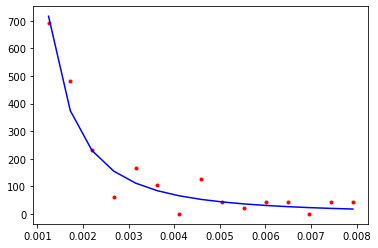

CPU times: user 6.25 ms, sys: 1.14 ms, total: 7.39 ms
Wall time: 2.47 ms
39083.64326828854


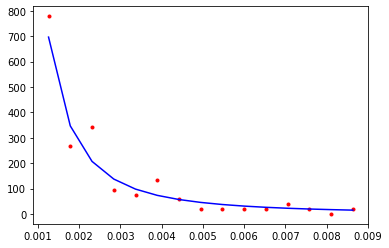

CPU times: user 1.17 ms, sys: 1.06 ms, total: 2.22 ms
Wall time: 724 µs
12896.392226669643


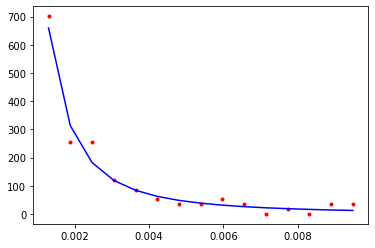

CPU times: user 1.1 ms, sys: 570 µs, total: 1.67 ms
Wall time: 580 µs
19318.22691764594


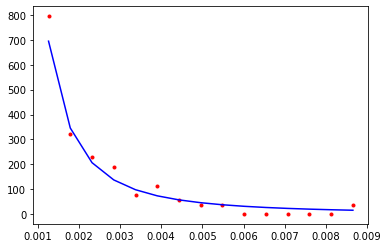

CPU times: user 1.36 ms, sys: 679 µs, total: 2.03 ms
Wall time: 719 µs
13535.976089686745


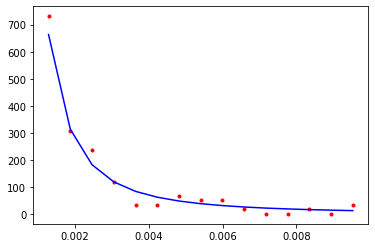

CPU times: user 1.57 ms, sys: 588 µs, total: 2.16 ms
Wall time: 742 µs
20178.78358027878


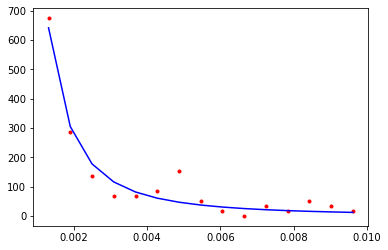

CPU times: user 1.98 ms, sys: 754 µs, total: 2.73 ms
Wall time: 947 µs
30219.204177579286


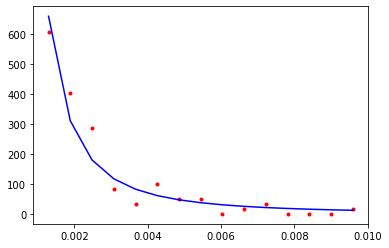

CPU times: user 2.1 ms, sys: 724 µs, total: 2.82 ms
Wall time: 951 µs
20693.304474970344


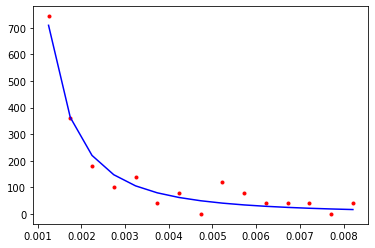

CPU times: user 2.34 ms, sys: 786 µs, total: 3.12 ms
Wall time: 1.08 ms
24846.672325880576


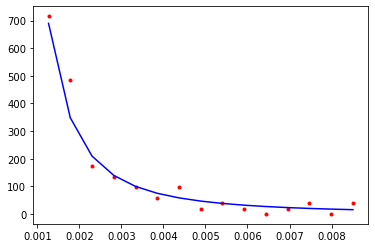

CPU times: user 2.6 ms, sys: 816 µs, total: 3.41 ms
Wall time: 1.17 ms
19778.534055854732


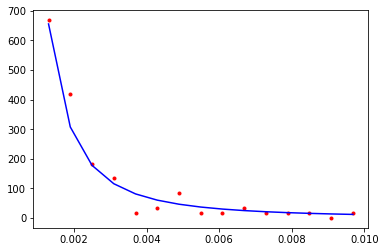

CPU times: user 2.72 ms, sys: 950 µs, total: 3.67 ms
Wall time: 1.29 ms
37779.219704076466


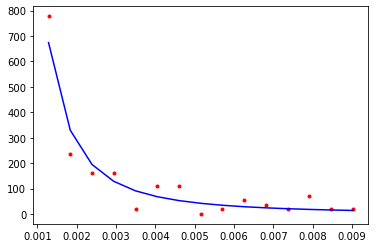

CPU times: user 3.39 ms, sys: 909 µs, total: 4.3 ms
Wall time: 1.47 ms
12920.902638931973


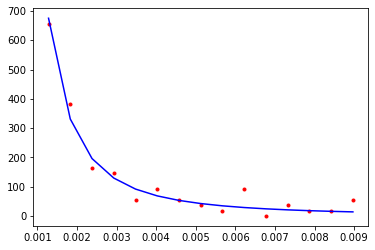

CPU times: user 3.18 ms, sys: 1.07 ms, total: 4.24 ms
Wall time: 1.57 ms
20467.462286105405


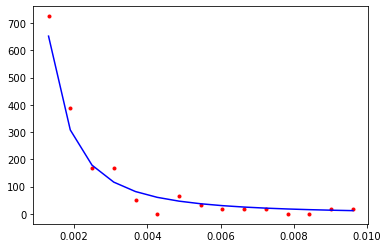

CPU times: user 3.48 ms, sys: 963 µs, total: 4.45 ms
Wall time: 1.55 ms
11206.706585749755


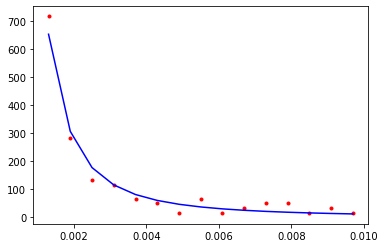

CPU times: user 4.28 ms, sys: 1.01 ms, total: 5.28 ms
Wall time: 1.79 ms
24055.86868012995


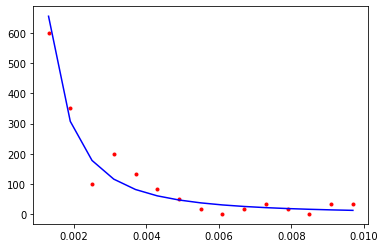

CPU times: user 4.18 ms, sys: 1.28 ms, total: 5.46 ms
Wall time: 1.94 ms
30613.861810533097


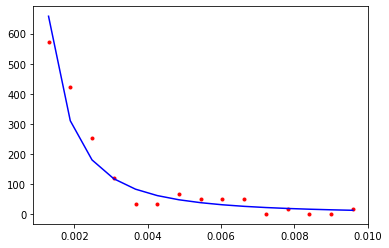

CPU times: user 4.81 ms, sys: 1.13 ms, total: 5.94 ms
Wall time: 2.02 ms
10702.267749687031


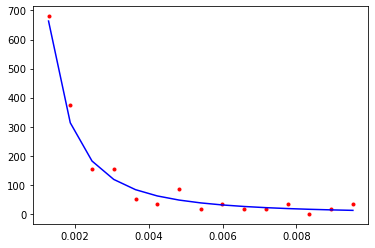

CPU times: user 4.54 ms, sys: 1.17 ms, total: 5.72 ms
Wall time: 1.97 ms
44805.27937511986


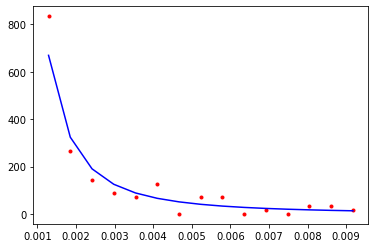

CPU times: user 5.28 ms, sys: 1.1 ms, total: 6.39 ms
Wall time: 2.15 ms
10375.483257588108


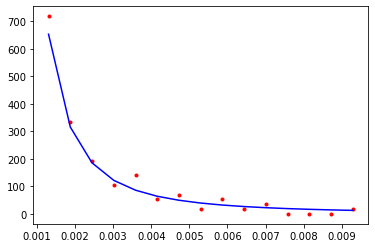

CPU times: user 5.49 ms, sys: 1.24 ms, total: 6.73 ms
Wall time: 2.29 ms
29266.979545970127


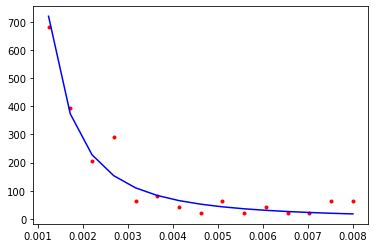

CPU times: user 5.6 ms, sys: 1.18 ms, total: 6.78 ms
Wall time: 2.3 ms
9873.686066587661


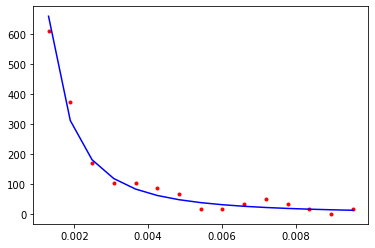

CPU times: user 6.22 ms, sys: 1.37 ms, total: 7.58 ms
Wall time: 2.58 ms
22450.890256602237


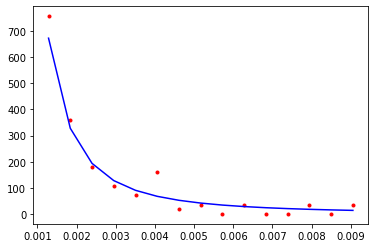

CPU times: user 6.41 ms, sys: 1.36 ms, total: 7.77 ms
Wall time: 2.63 ms
22190.709641518933


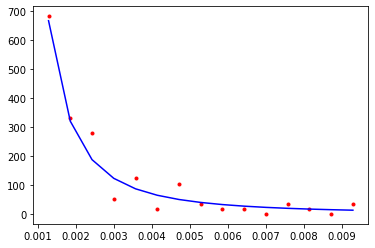

CPU times: user 1.31 ms, sys: 1.24 ms, total: 2.55 ms
Wall time: 841 µs
55462.642127195446


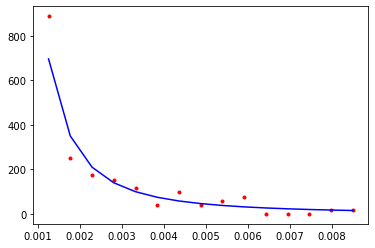

CPU times: user 882 µs, sys: 511 µs, total: 1.39 ms
Wall time: 483 µs
39380.53302604999


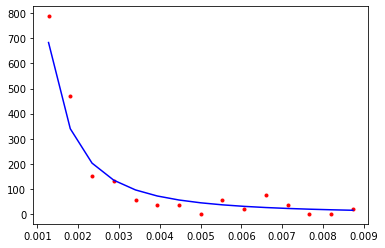

CPU times: user 1.88 ms, sys: 981 µs, total: 2.86 ms
Wall time: 999 µs
14698.558398777202


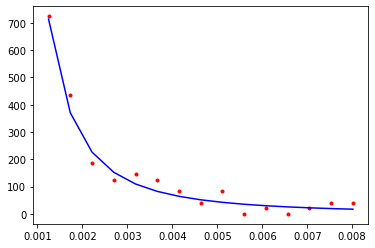

CPU times: user 1.51 ms, sys: 549 µs, total: 2.06 ms
Wall time: 693 µs
54264.54973450106


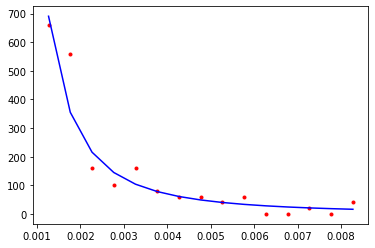

CPU times: user 1.81 ms, sys: 632 µs, total: 2.44 ms
Wall time: 819 µs
63849.64037312453


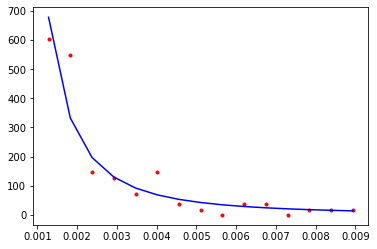

CPU times: user 1.98 ms, sys: 604 µs, total: 2.58 ms
Wall time: 878 µs
31162.699557949632


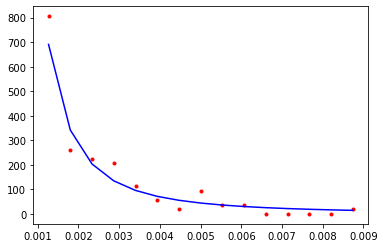

CPU times: user 2.38 ms, sys: 784 µs, total: 3.17 ms
Wall time: 1.08 ms
80331.43592909373


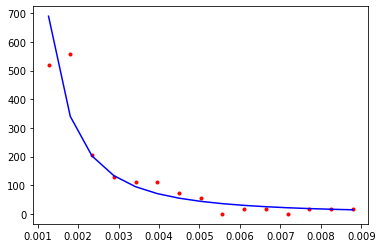

CPU times: user 2.6 ms, sys: 804 µs, total: 3.4 ms
Wall time: 1.16 ms
32050.12149086976


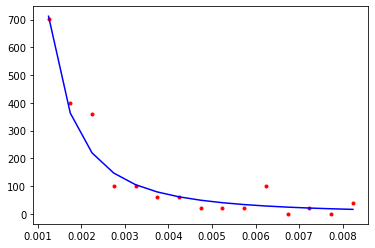

CPU times: user 3.19 ms, sys: 944 µs, total: 4.14 ms
Wall time: 1.41 ms
21700.4338688744


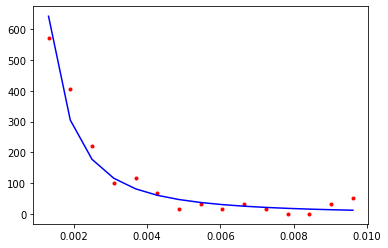

CPU times: user 3.42 ms, sys: 948 µs, total: 4.37 ms
Wall time: 1.49 ms
24507.806779822287


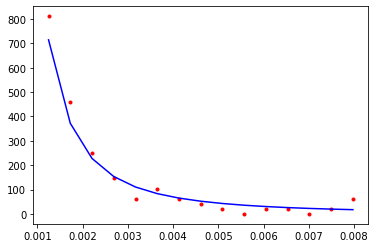

CPU times: user 3.42 ms, sys: 864 µs, total: 4.29 ms
Wall time: 1.45 ms
24183.69614811076


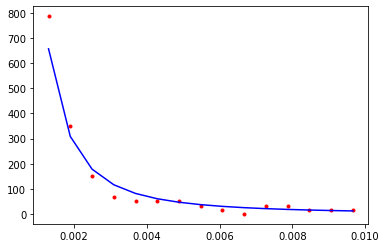

CPU times: user 4.42 ms, sys: 1.12 ms, total: 5.55 ms
Wall time: 1.89 ms
30884.016340406797


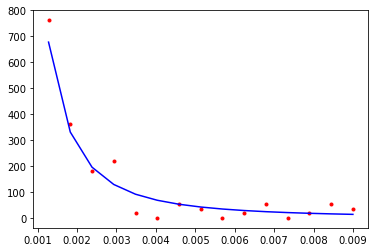

CPU times: user 4.07 ms, sys: 975 µs, total: 5.04 ms
Wall time: 1.72 ms
30654.806958968868


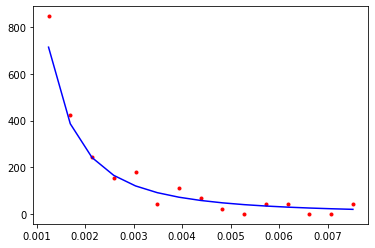

CPU times: user 4.58 ms, sys: 1.11 ms, total: 5.69 ms
Wall time: 1.93 ms
55350.54199485902


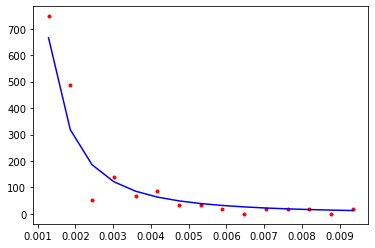

CPU times: user 4.4 ms, sys: 1.25 ms, total: 5.65 ms
Wall time: 1.96 ms
30735.567729710252


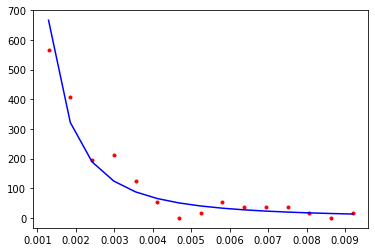

CPU times: user 4.85 ms, sys: 1.18 ms, total: 6.03 ms
Wall time: 2.07 ms
29299.032308742408


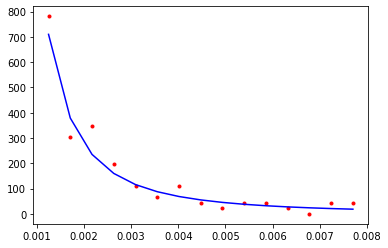

CPU times: user 5.17 ms, sys: 1.13 ms, total: 6.3 ms
Wall time: 2.14 ms
7258.422882256492


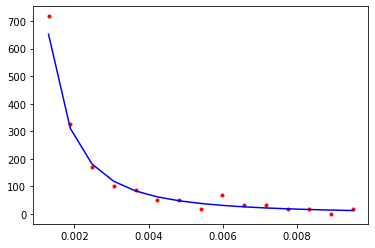

CPU times: user 5.42 ms, sys: 1.19 ms, total: 6.6 ms
Wall time: 2.23 ms
30926.217342188924


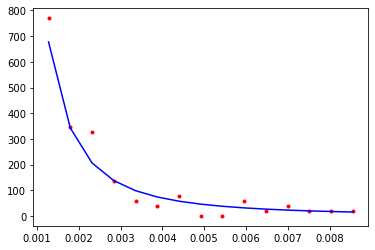

CPU times: user 5.92 ms, sys: 1.28 ms, total: 7.2 ms
Wall time: 2.46 ms
18294.30105557171


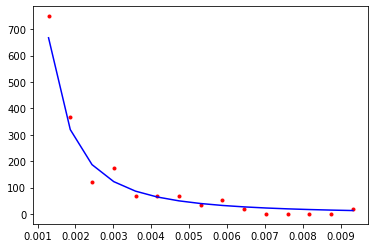

CPU times: user 5.71 ms, sys: 1.45 ms, total: 7.16 ms
Wall time: 2.49 ms
17847.868178805318


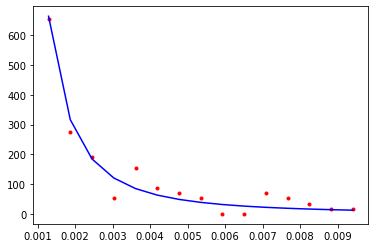

CPU times: user 6.47 ms, sys: 1.23 ms, total: 7.7 ms
Wall time: 2.57 ms
62105.894720531185


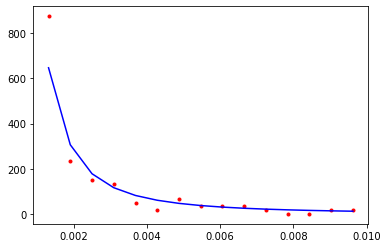

CPU times: user 1.37 ms, sys: 1.41 ms, total: 2.78 ms
Wall time: 898 µs
24588.650655307876


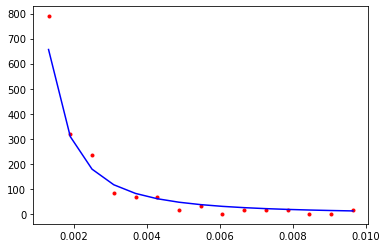

CPU times: user 1.09 ms, sys: 627 µs, total: 1.72 ms
Wall time: 615 µs
21521.644666646283


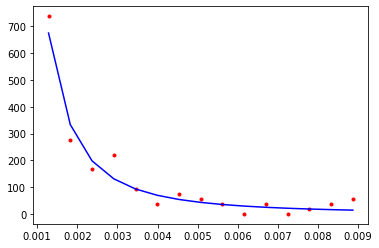

CPU times: user 1.16 ms, sys: 481 µs, total: 1.64 ms
Wall time: 560 µs
5136.421764256319


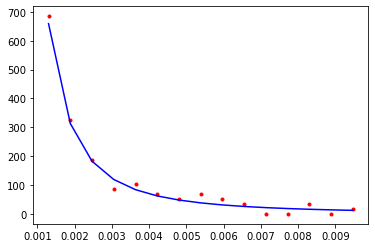

CPU times: user 1.41 ms, sys: 611 µs, total: 2.02 ms
Wall time: 716 µs
33400.60827096116


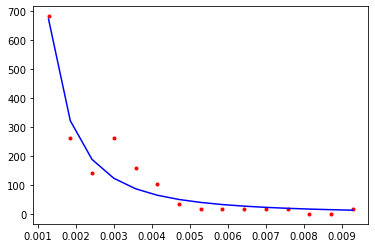

CPU times: user 1.79 ms, sys: 609 µs, total: 2.4 ms
Wall time: 799 µs
11889.88598741703


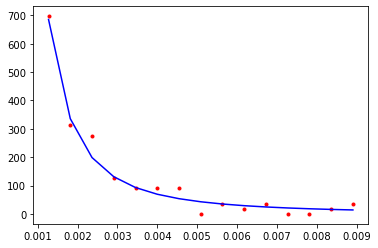

CPU times: user 2.06 ms, sys: 986 µs, total: 3.05 ms
Wall time: 1.11 ms
24369.21384622509


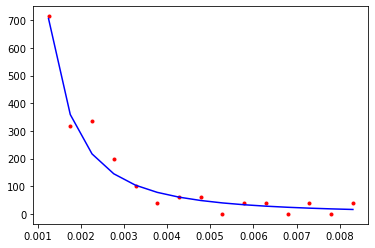

CPU times: user 2.26 ms, sys: 847 µs, total: 3.1 ms
Wall time: 1.06 ms
42421.60437819983


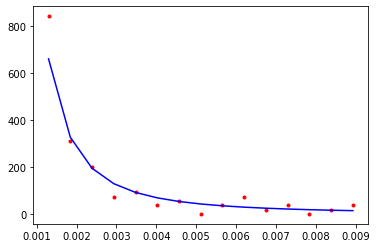

CPU times: user 2.86 ms, sys: 985 µs, total: 3.85 ms
Wall time: 1.33 ms
8553.205547468946


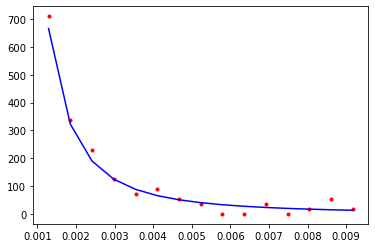

CPU times: user 2.98 ms, sys: 763 µs, total: 3.74 ms
Wall time: 1.27 ms
15226.184584224828


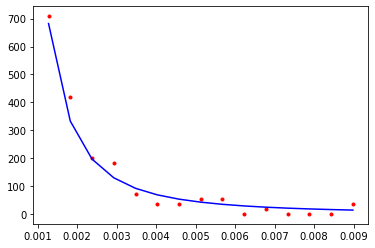

CPU times: user 3.89 ms, sys: 1.11 ms, total: 5 ms
Wall time: 1.72 ms
17220.409281321707


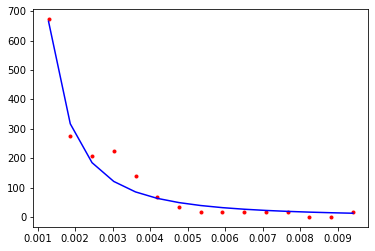

CPU times: user 3.47 ms, sys: 873 µs, total: 4.34 ms
Wall time: 1.48 ms
58130.84120923119


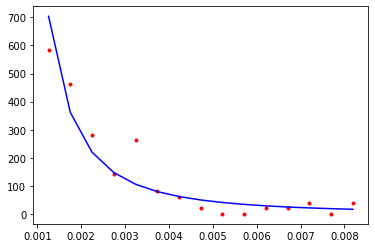

CPU times: user 3.73 ms, sys: 883 µs, total: 4.62 ms
Wall time: 1.55 ms
17645.324492163312


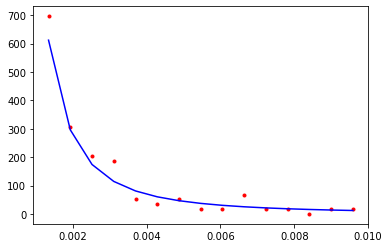

CPU times: user 4.22 ms, sys: 1.1 ms, total: 5.32 ms
Wall time: 1.82 ms
67931.0362773611


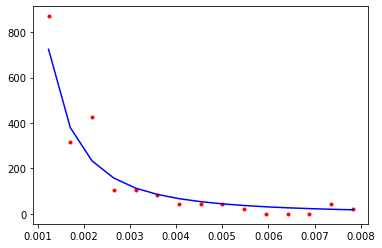

CPU times: user 4.63 ms, sys: 1.16 ms, total: 5.79 ms
Wall time: 1.97 ms
68958.91642295751


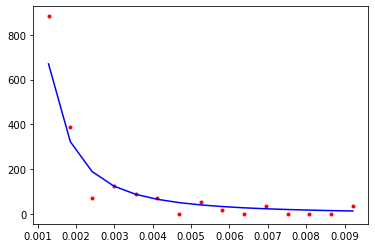

CPU times: user 4.78 ms, sys: 1.19 ms, total: 5.97 ms
Wall time: 2.04 ms
27686.564928025324


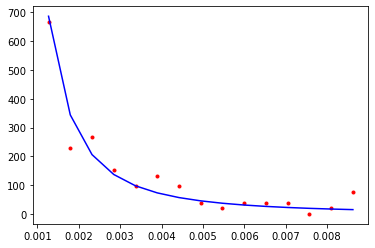

CPU times: user 4.86 ms, sys: 1.1 ms, total: 5.96 ms
Wall time: 2.02 ms
34488.47675015938


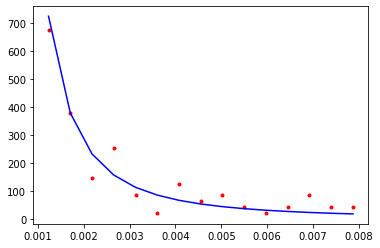

CPU times: user 4.83 ms, sys: 1.39 ms, total: 6.22 ms
Wall time: 2.19 ms
15167.98416875877


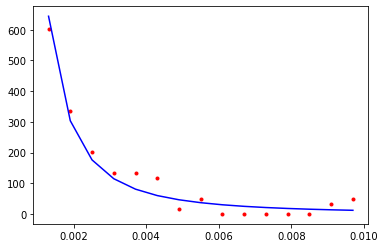

CPU times: user 5.6 ms, sys: 1.35 ms, total: 6.95 ms
Wall time: 2.44 ms
19665.80758232914


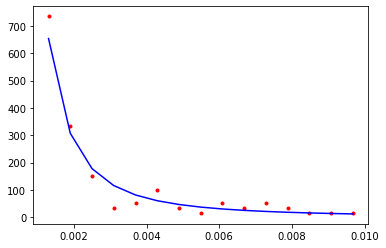

CPU times: user 5.97 ms, sys: 1.31 ms, total: 7.28 ms
Wall time: 2.48 ms
7147.125152353318


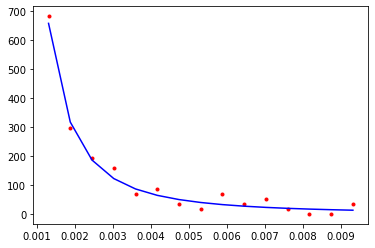

CPU times: user 6.01 ms, sys: 1.42 ms, total: 7.43 ms
Wall time: 2.53 ms
31008.919265807435


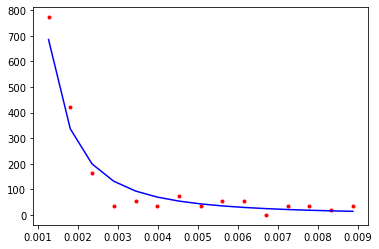

CPU times: user 6.43 ms, sys: 1.39 ms, total: 7.82 ms
Wall time: 2.65 ms
31395.647630760734


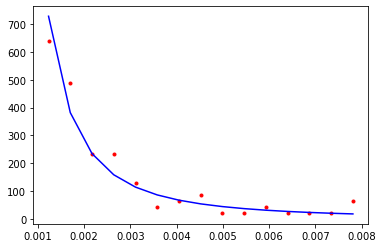

CPU times: user 1.44 ms, sys: 1.3 ms, total: 2.74 ms
Wall time: 915 µs
53076.66819676865


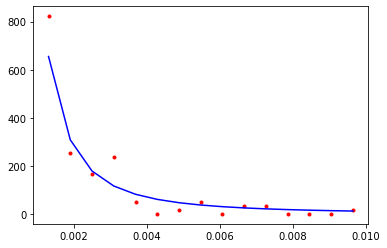

CPU times: user 766 µs, sys: 509 µs, total: 1.28 ms
Wall time: 469 µs
21366.74414190757


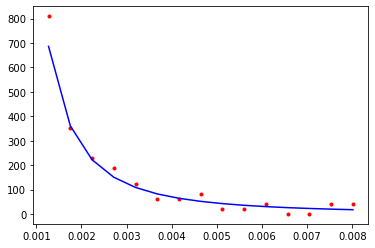

CPU times: user 1.48 ms, sys: 656 µs, total: 2.13 ms
Wall time: 728 µs
53194.635129670845


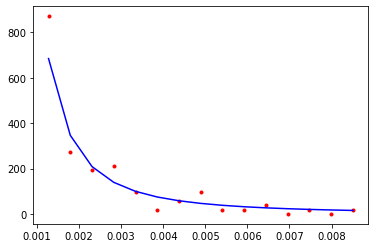

CPU times: user 1.56 ms, sys: 607 µs, total: 2.16 ms
Wall time: 731 µs
10962.999175436067


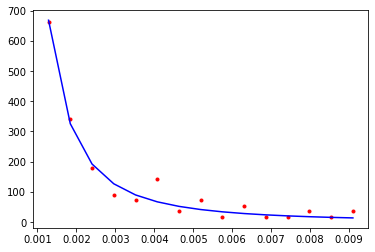

CPU times: user 1.94 ms, sys: 664 µs, total: 2.6 ms
Wall time: 872 µs
42914.43908697974


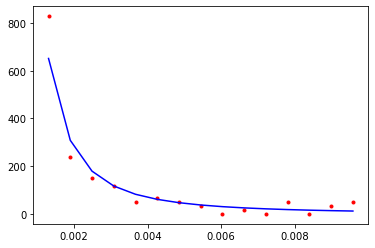

CPU times: user 1.99 ms, sys: 673 µs, total: 2.66 ms
Wall time: 900 µs
49820.294393203876


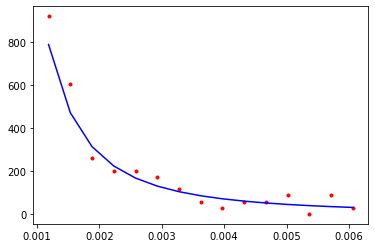

CPU times: user 2.41 ms, sys: 673 µs, total: 3.08 ms
Wall time: 1.04 ms
17345.470778115632


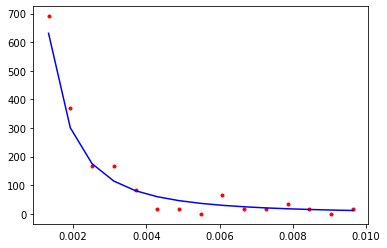

CPU times: user 2.8 ms, sys: 924 µs, total: 3.72 ms
Wall time: 1.28 ms
25287.086272806016


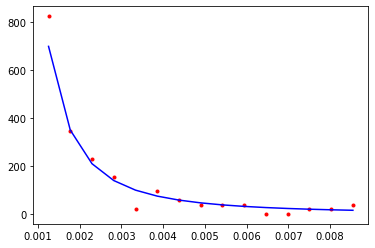

CPU times: user 3.16 ms, sys: 940 µs, total: 4.1 ms
Wall time: 1.4 ms
19562.528575600758


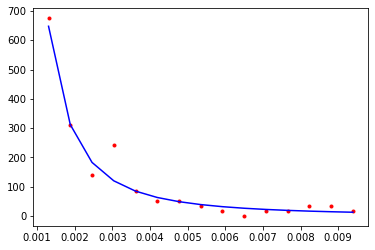

CPU times: user 3.19 ms, sys: 939 µs, total: 4.13 ms
Wall time: 1.41 ms
10887.981322406762


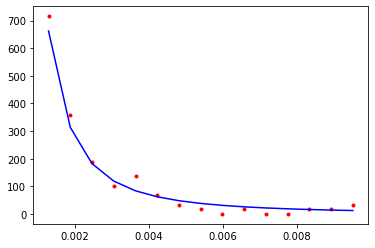

CPU times: user 3.4 ms, sys: 967 µs, total: 4.37 ms
Wall time: 1.52 ms
50127.57201749862


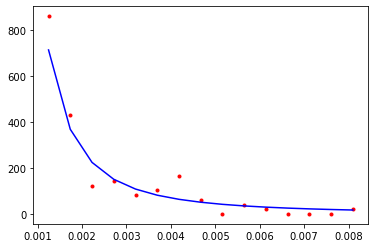

CPU times: user 3.71 ms, sys: 976 µs, total: 4.69 ms
Wall time: 1.61 ms
36986.75220853952


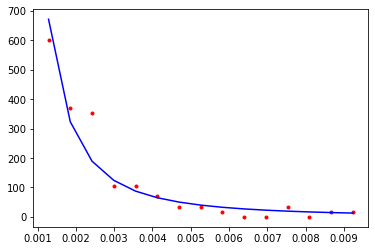

CPU times: user 4.03 ms, sys: 977 µs, total: 5.01 ms
Wall time: 1.69 ms
34174.18941719671


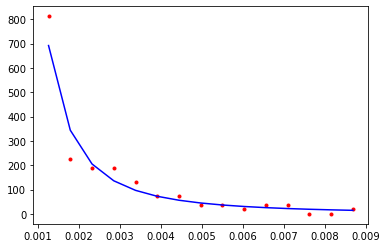

CPU times: user 4.36 ms, sys: 1.09 ms, total: 5.45 ms
Wall time: 1.86 ms
23140.00554290402


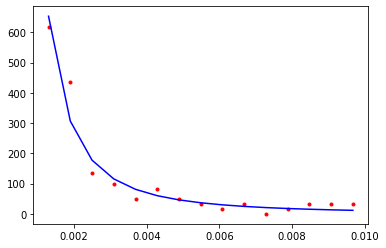

CPU times: user 4.59 ms, sys: 1 ms, total: 5.59 ms
Wall time: 1.89 ms
21857.90568211926


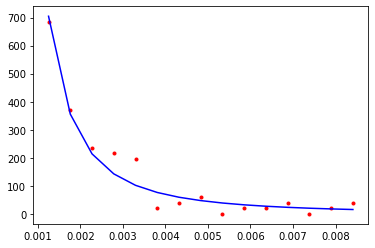

CPU times: user 4.92 ms, sys: 1.16 ms, total: 6.08 ms
Wall time: 2.07 ms
22894.39792249391


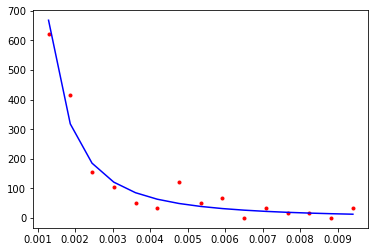

CPU times: user 5.41 ms, sys: 1.2 ms, total: 6.62 ms
Wall time: 2.23 ms
24270.271275820058


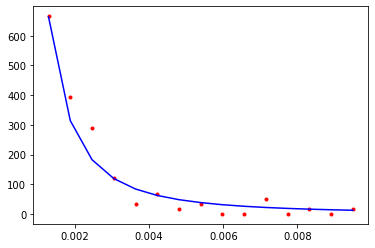

CPU times: user 5.2 ms, sys: 1.45 ms, total: 6.65 ms
Wall time: 2.32 ms
22862.52520192176


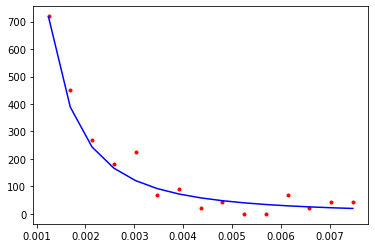

CPU times: user 6.04 ms, sys: 1.34 ms, total: 7.38 ms
Wall time: 2.51 ms
22613.040747635976


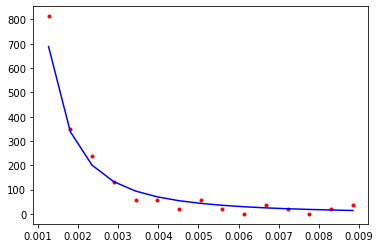

CPU times: user 6.01 ms, sys: 1.26 ms, total: 7.27 ms
Wall time: 2.47 ms
22057.0793176737


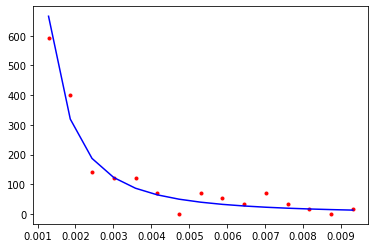

CPU times: user 6.33 ms, sys: 1.29 ms, total: 7.62 ms
Wall time: 2.58 ms
5975.8853996437865


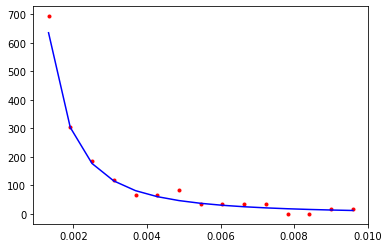

CPU times: user 1.3 ms, sys: 1.27 ms, total: 2.57 ms
Wall time: 867 µs
16809.503085493157


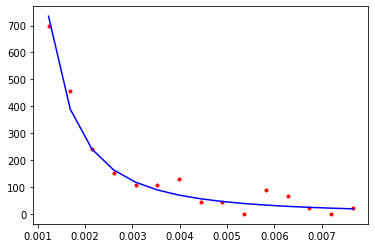

CPU times: user 1.16 ms, sys: 683 µs, total: 1.84 ms
Wall time: 651 µs
38727.82028195902


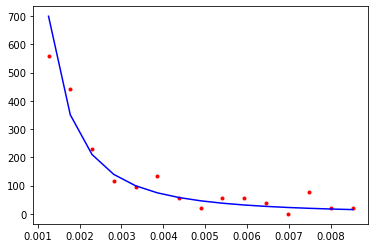

CPU times: user 1.31 ms, sys: 651 µs, total: 1.96 ms
Wall time: 673 µs
65795.66594133916


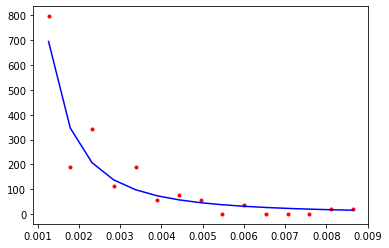

CPU times: user 1.79 ms, sys: 731 µs, total: 2.52 ms
Wall time: 846 µs
9863.70919172882


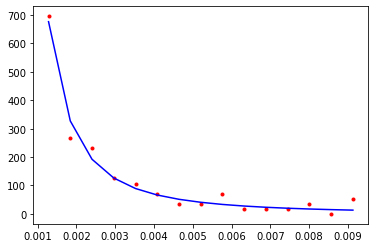

CPU times: user 1.73 ms, sys: 735 µs, total: 2.47 ms
Wall time: 847 µs
11392.529387236802


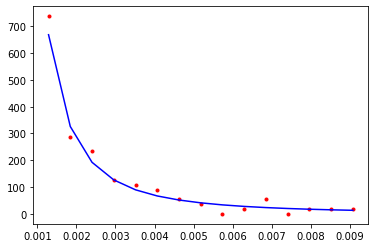

CPU times: user 2.22 ms, sys: 708 µs, total: 2.92 ms
Wall time: 989 µs
10465.240922324876


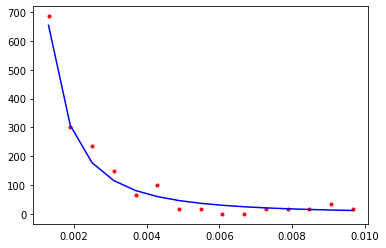

CPU times: user 2.47 ms, sys: 835 µs, total: 3.3 ms
Wall time: 1.15 ms
15107.980852355831


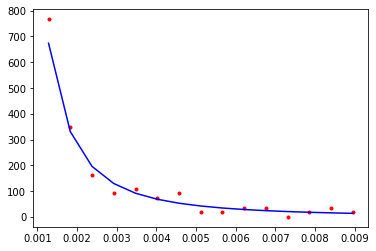

CPU times: user 2.47 ms, sys: 907 µs, total: 3.38 ms
Wall time: 1.22 ms
17646.900397715548


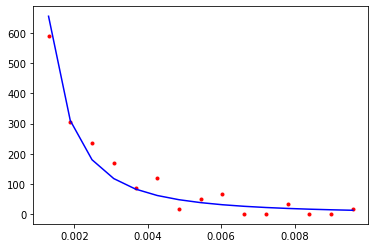

CPU times: user 2.84 ms, sys: 788 µs, total: 3.63 ms
Wall time: 1.24 ms
15963.683580264638


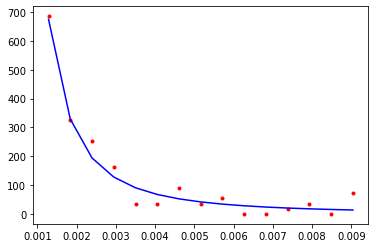

CPU times: user 3.3 ms, sys: 784 µs, total: 4.09 ms
Wall time: 1.38 ms
42375.907192437335


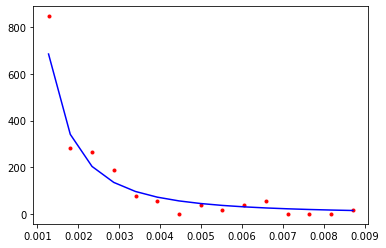

CPU times: user 3.46 ms, sys: 895 µs, total: 4.36 ms
Wall time: 1.48 ms
34843.70005286604


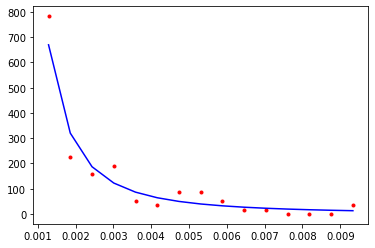

CPU times: user 3.74 ms, sys: 1.13 ms, total: 4.87 ms
Wall time: 1.75 ms
37438.919187637184


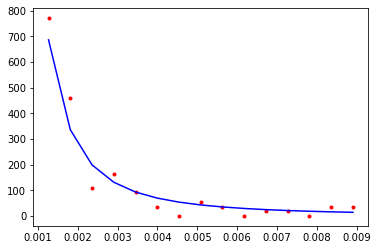

CPU times: user 3.81 ms, sys: 1.08 ms, total: 4.89 ms
Wall time: 1.71 ms
37860.58218147079


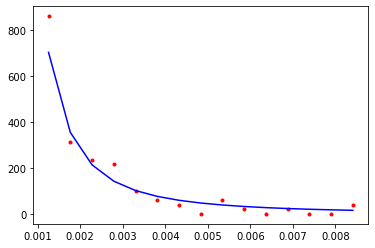

CPU times: user 4.29 ms, sys: 976 µs, total: 5.26 ms
Wall time: 1.79 ms
26270.857102811093


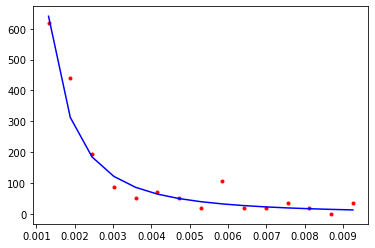

CPU times: user 4.47 ms, sys: 1.11 ms, total: 5.58 ms
Wall time: 1.9 ms
43190.684244027354


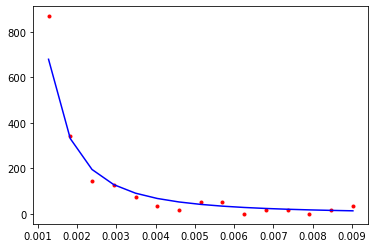

CPU times: user 5.07 ms, sys: 1.11 ms, total: 6.18 ms
Wall time: 2.08 ms
16803.331213299363


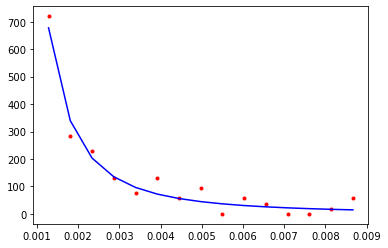

CPU times: user 5.18 ms, sys: 1.06 ms, total: 6.25 ms
Wall time: 2.09 ms
85449.70271129784


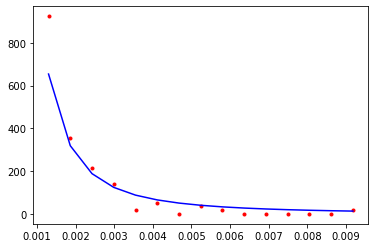

CPU times: user 5.38 ms, sys: 1.21 ms, total: 6.59 ms
Wall time: 2.24 ms
37608.08049605496


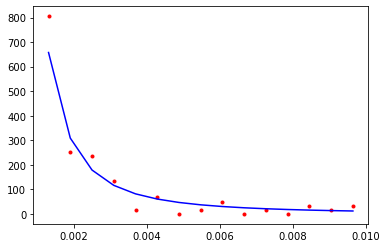

CPU times: user 5.95 ms, sys: 1.28 ms, total: 7.23 ms
Wall time: 2.46 ms
13124.714633438474


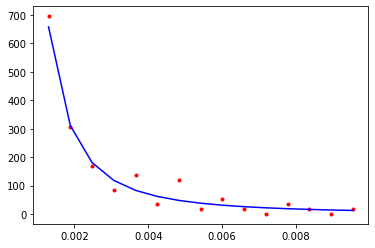

CPU times: user 6.27 ms, sys: 1.32 ms, total: 7.59 ms
Wall time: 2.56 ms
18318.831240356056


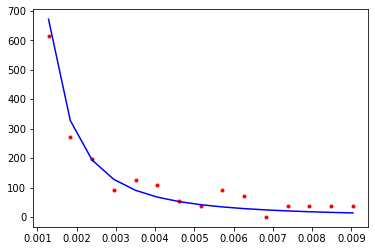

CPU times: user 6.71 ms, sys: 1.32 ms, total: 8.03 ms
Wall time: 2.7 ms
45426.868137865844


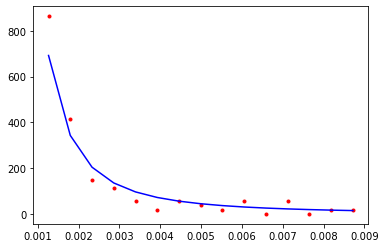

CPU times: user 1.36 ms, sys: 1.48 ms, total: 2.85 ms
Wall time: 928 µs
11556.464098542652


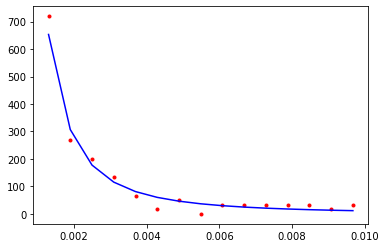

CPU times: user 972 µs, sys: 472 µs, total: 1.44 ms
Wall time: 550 µs
11659.489221505366


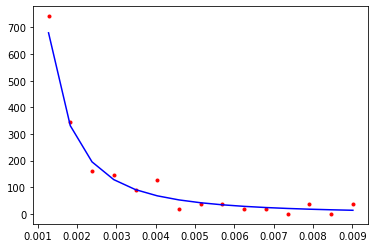

CPU times: user 1.22 ms, sys: 616 µs, total: 1.83 ms
Wall time: 641 µs
100196.66926963802


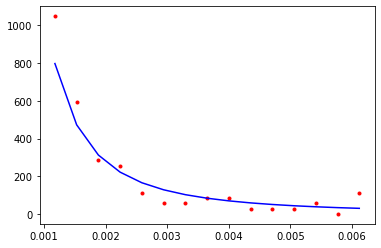

CPU times: user 1.58 ms, sys: 604 µs, total: 2.18 ms
Wall time: 733 µs
34348.90669786583


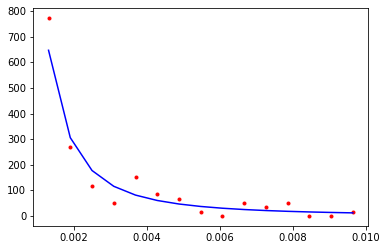

CPU times: user 2.04 ms, sys: 796 µs, total: 2.83 ms
Wall time: 984 µs
37582.92591377026


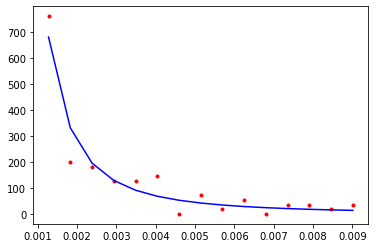

CPU times: user 2.09 ms, sys: 717 µs, total: 2.8 ms
Wall time: 959 µs
12126.268775132023


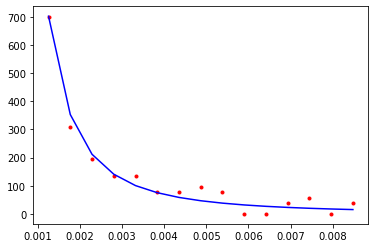

CPU times: user 2.25 ms, sys: 735 µs, total: 2.99 ms
Wall time: 1.04 ms
21370.825444665777


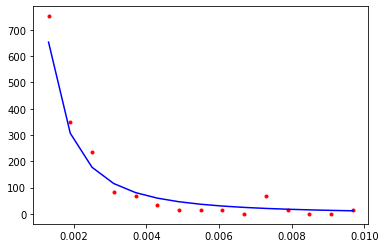

CPU times: user 2.8 ms, sys: 873 µs, total: 3.68 ms
Wall time: 1.26 ms
41952.95054322851


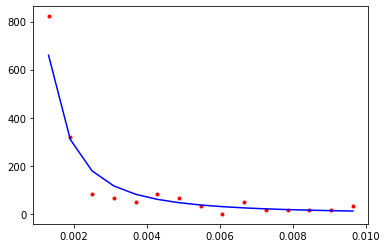

CPU times: user 3.02 ms, sys: 938 µs, total: 3.96 ms
Wall time: 1.37 ms
5892.466956275631


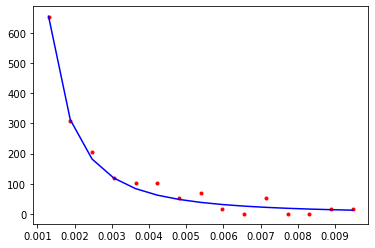

CPU times: user 3.45 ms, sys: 878 µs, total: 4.33 ms
Wall time: 1.48 ms
28331.09053411524


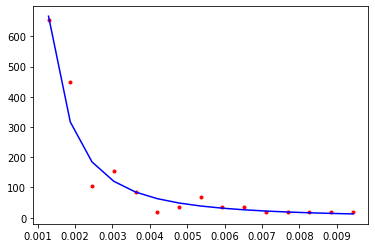

CPU times: user 3.26 ms, sys: 897 µs, total: 4.15 ms
Wall time: 1.43 ms
62652.2028641739


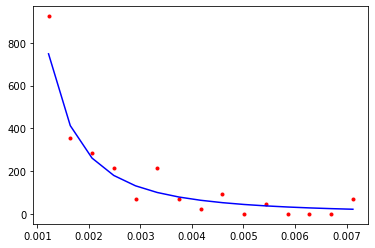

CPU times: user 3.3 ms, sys: 820 µs, total: 4.12 ms
Wall time: 1.66 ms
47112.22651133044


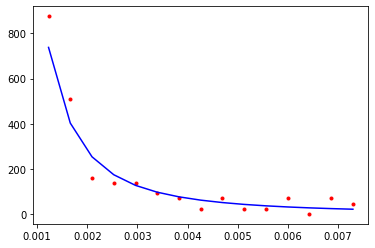

CPU times: user 4.32 ms, sys: 988 µs, total: 5.3 ms
Wall time: 1.8 ms
36741.26699302068


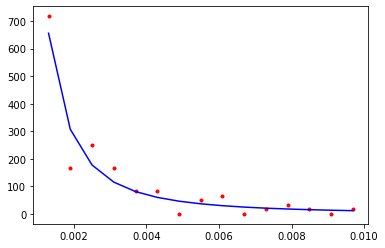

CPU times: user 4.21 ms, sys: 1 ms, total: 5.21 ms
Wall time: 1.78 ms
29377.897548816447


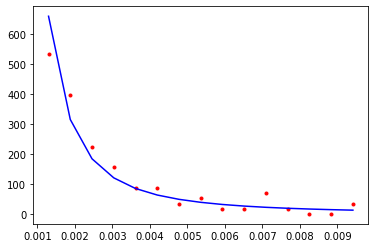

CPU times: user 4.75 ms, sys: 1.13 ms, total: 5.89 ms
Wall time: 2.01 ms
12752.882094903413


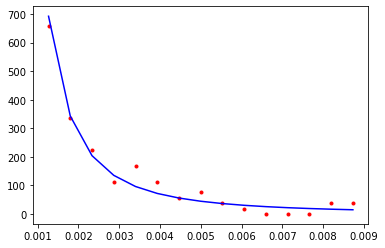

CPU times: user 5.02 ms, sys: 1.12 ms, total: 6.14 ms
Wall time: 2.06 ms
12490.193245315484


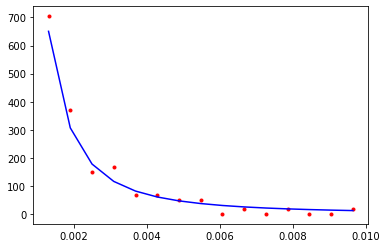

CPU times: user 5.25 ms, sys: 1.27 ms, total: 6.52 ms
Wall time: 2.22 ms
37141.845166887586


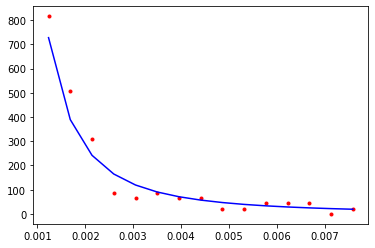

CPU times: user 5.56 ms, sys: 1.3 ms, total: 6.87 ms
Wall time: 2.35 ms
33532.003635646186


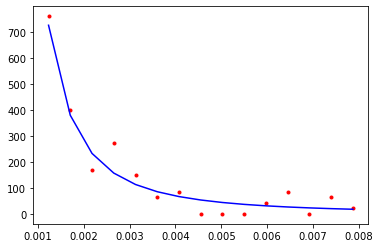

CPU times: user 5.57 ms, sys: 1.42 ms, total: 6.99 ms
Wall time: 2.42 ms
29275.02841938429


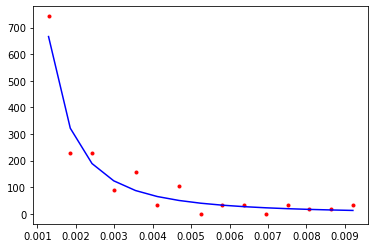

CPU times: user 5.79 ms, sys: 1.45 ms, total: 7.24 ms
Wall time: 2.49 ms
157187.1305906143


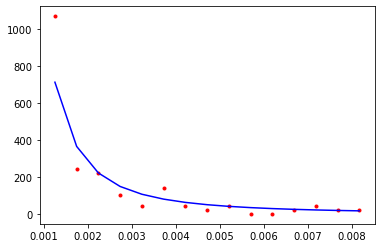

CPU times: user 5.92 ms, sys: 1.62 ms, total: 7.54 ms
Wall time: 2.64 ms
24817.57516267531


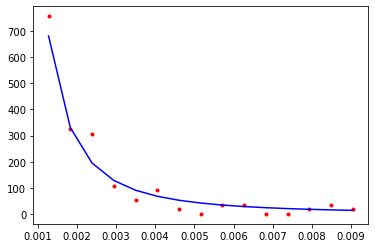

CPU times: user 1.53 ms, sys: 1.53 ms, total: 3.06 ms
Wall time: 1.01 ms
37956.73570262403


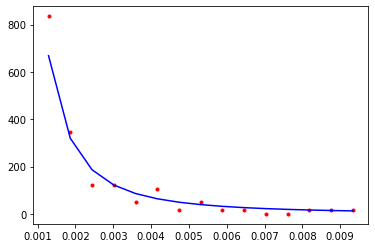

CPU times: user 823 µs, sys: 596 µs, total: 1.42 ms
Wall time: 518 µs
18406.21150771344


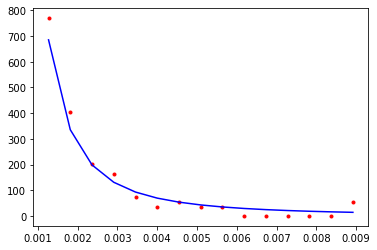

CPU times: user 1.29 ms, sys: 613 µs, total: 1.91 ms
Wall time: 658 µs
21107.386367939274


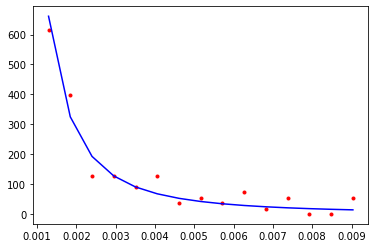

CPU times: user 1.91 ms, sys: 774 µs, total: 2.68 ms
Wall time: 914 µs
18202.22755058868


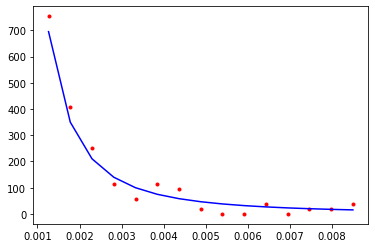

CPU times: user 2.18 ms, sys: 730 µs, total: 2.91 ms
Wall time: 980 µs
39426.135648275944


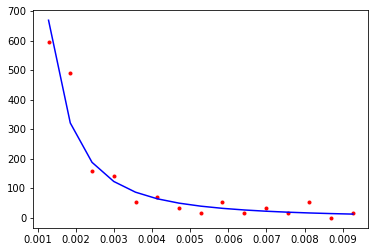

CPU times: user 2.3 ms, sys: 795 µs, total: 3.1 ms
Wall time: 1.06 ms
18057.055993803613


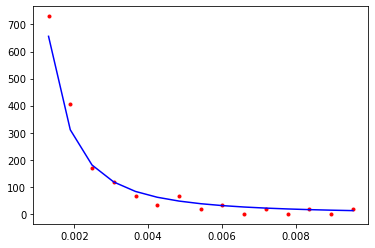

CPU times: user 2.36 ms, sys: 705 µs, total: 3.06 ms
Wall time: 1.04 ms
43847.35655194825


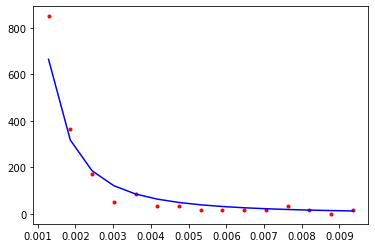

CPU times: user 2.78 ms, sys: 986 µs, total: 3.76 ms
Wall time: 1.36 ms
31842.04971610485


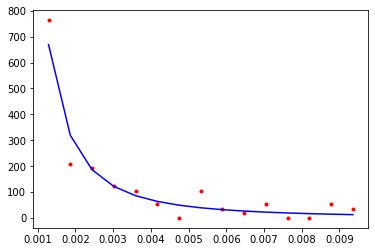

CPU times: user 2.88 ms, sys: 908 µs, total: 3.78 ms
Wall time: 1.31 ms
59997.59898790964


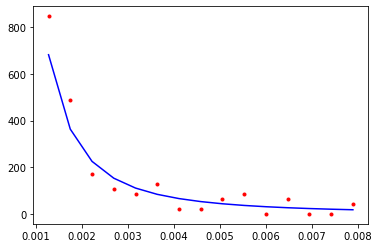

CPU times: user 3.15 ms, sys: 913 µs, total: 4.07 ms
Wall time: 1.38 ms
4093.235798389932


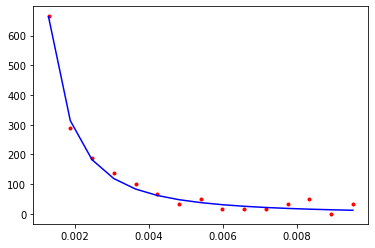

CPU times: user 3.67 ms, sys: 941 µs, total: 4.61 ms
Wall time: 1.58 ms
65206.62956280998


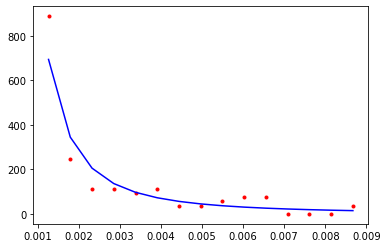

CPU times: user 4.12 ms, sys: 1.4 ms, total: 5.52 ms
Wall time: 1.93 ms
41216.56561553518


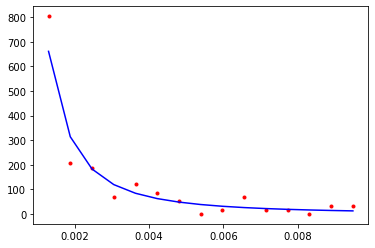

CPU times: user 3.96 ms, sys: 1 ms, total: 4.96 ms
Wall time: 1.7 ms
11068.409679152745


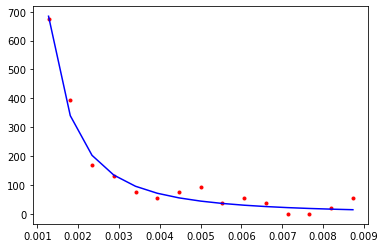

CPU times: user 4.62 ms, sys: 1.05 ms, total: 5.66 ms
Wall time: 1.91 ms
14559.402174083796


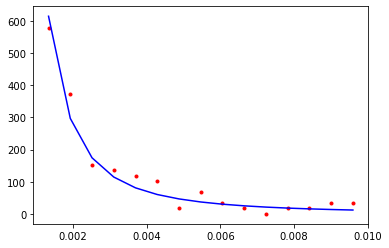

CPU times: user 4.54 ms, sys: 1.16 ms, total: 5.7 ms
Wall time: 1.95 ms
40648.57678458056


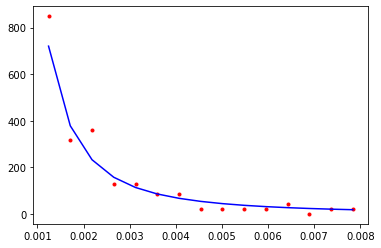

CPU times: user 5.06 ms, sys: 1.24 ms, total: 6.3 ms
Wall time: 2.14 ms
23371.42324755511


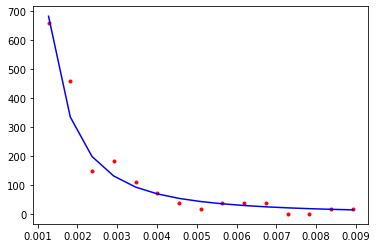

CPU times: user 4.98 ms, sys: 1.17 ms, total: 6.15 ms
Wall time: 2.1 ms
33881.269894996716


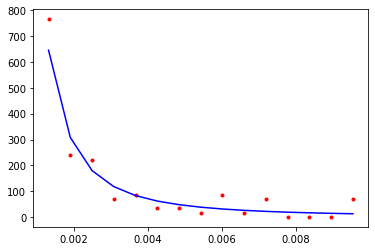

CPU times: user 5.52 ms, sys: 1.12 ms, total: 6.64 ms
Wall time: 2.24 ms
45496.445069125555


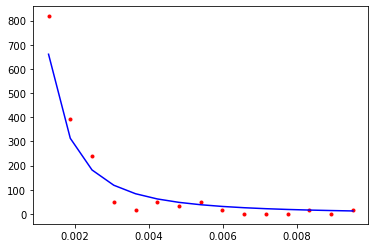

CPU times: user 5.49 ms, sys: 1.41 ms, total: 6.9 ms
Wall time: 2.4 ms
40321.96216160582


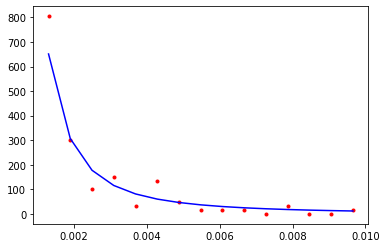

CPU times: user 6.69 ms, sys: 1.59 ms, total: 8.29 ms
Wall time: 2.82 ms
66133.03258977564


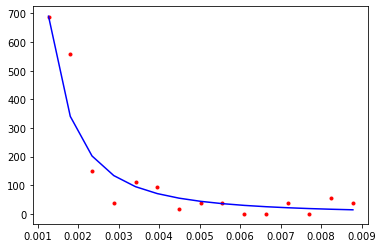

CPU times: user 6.34 ms, sys: 1.27 ms, total: 7.61 ms
Wall time: 2.58 ms
18153.80326601458


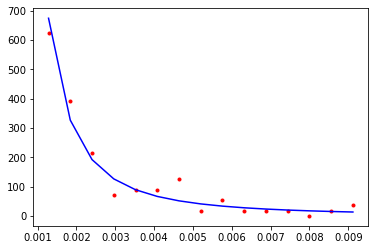

CPU times: user 1.44 ms, sys: 1.35 ms, total: 2.79 ms
Wall time: 934 µs
38401.196664204144


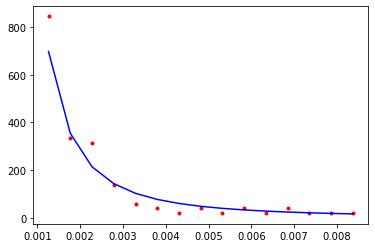

CPU times: user 975 µs, sys: 552 µs, total: 1.53 ms
Wall time: 520 µs
49095.24497384555


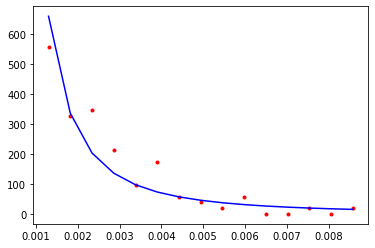

CPU times: user 1.55 ms, sys: 748 µs, total: 2.3 ms
Wall time: 789 µs
11114.515754711456


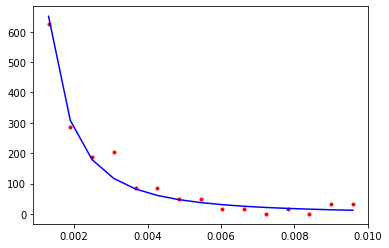

CPU times: user 1.69 ms, sys: 617 µs, total: 2.31 ms
Wall time: 799 µs
28166.069509781286


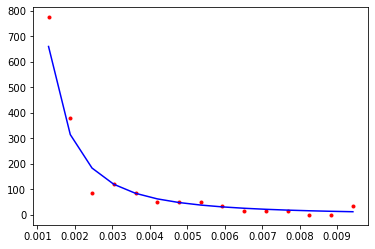

CPU times: user 1.75 ms, sys: 774 µs, total: 2.52 ms
Wall time: 876 µs
90754.00919727923


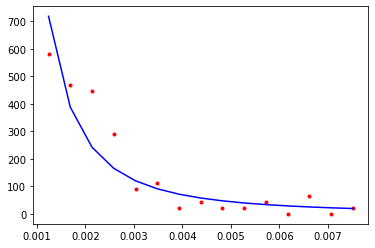

CPU times: user 2.11 ms, sys: 666 µs, total: 2.78 ms
Wall time: 928 µs
30159.371266469214


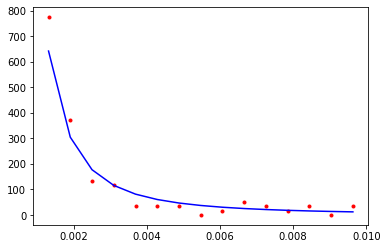

CPU times: user 2.4 ms, sys: 766 µs, total: 3.17 ms
Wall time: 1.07 ms
23536.72905518968


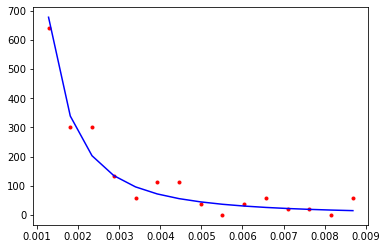

CPU times: user 2.91 ms, sys: 1.07 ms, total: 3.98 ms
Wall time: 1.39 ms
35088.371743351934


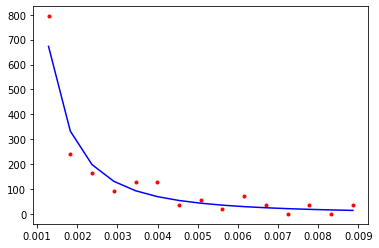

CPU times: user 3.46 ms, sys: 975 µs, total: 4.44 ms
Wall time: 1.52 ms
9593.775549148651


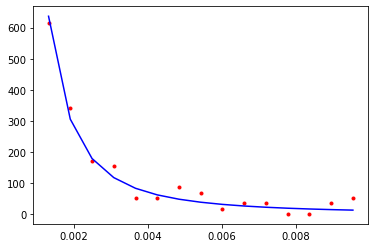

CPU times: user 3.18 ms, sys: 825 µs, total: 4.01 ms
Wall time: 1.36 ms
13177.838874138813


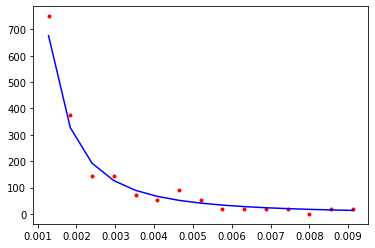

CPU times: user 3.42 ms, sys: 962 µs, total: 4.39 ms
Wall time: 1.5 ms
45546.56626904452


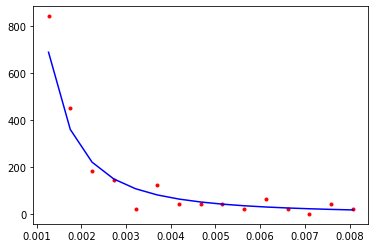

CPU times: user 4.2 ms, sys: 1.24 ms, total: 5.43 ms
Wall time: 1.89 ms
26305.20411915719


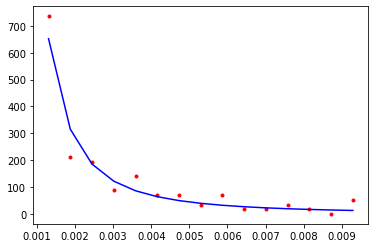

CPU times: user 4.28 ms, sys: 1.11 ms, total: 5.38 ms
Wall time: 1.86 ms
18847.81975265704


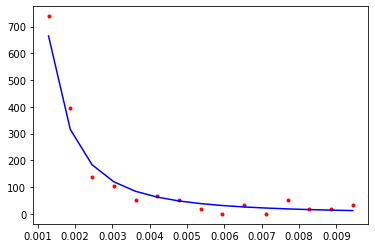

CPU times: user 4.34 ms, sys: 1.01 ms, total: 5.35 ms
Wall time: 1.82 ms
4160.227425552298


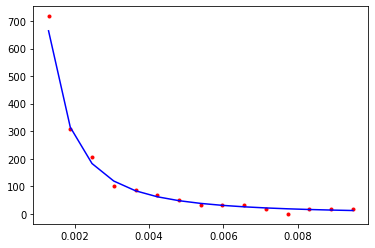

CPU times: user 4.71 ms, sys: 1.1 ms, total: 5.81 ms
Wall time: 1.97 ms
15573.881587988497


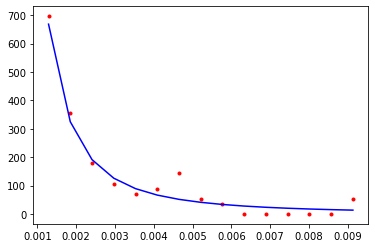

CPU times: user 5.07 ms, sys: 1.33 ms, total: 6.4 ms
Wall time: 2.22 ms
12808.418991474937


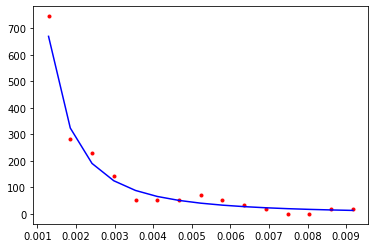

CPU times: user 5.18 ms, sys: 1.13 ms, total: 6.31 ms
Wall time: 2.15 ms
78342.2089861015


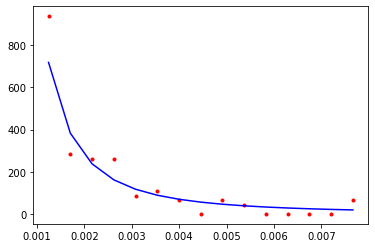

CPU times: user 5.56 ms, sys: 1.19 ms, total: 6.75 ms
Wall time: 2.28 ms
31893.899075614834


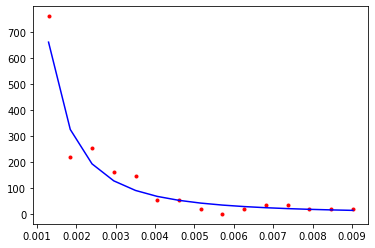

CPU times: user 5.68 ms, sys: 1.58 ms, total: 7.26 ms
Wall time: 2.54 ms
60301.44863944613


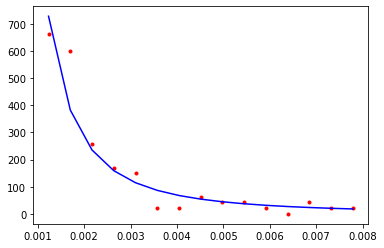

CPU times: user 5.83 ms, sys: 1.38 ms, total: 7.21 ms
Wall time: 2.47 ms
42244.568773164225


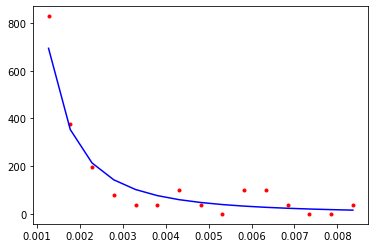

CPU times: user 6.46 ms, sys: 1.31 ms, total: 7.77 ms
Wall time: 2.61 ms
64438.09586771394


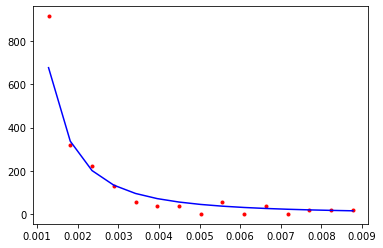

CPU times: user 1.34 ms, sys: 1.35 ms, total: 2.69 ms
Wall time: 866 µs
62593.89082299174


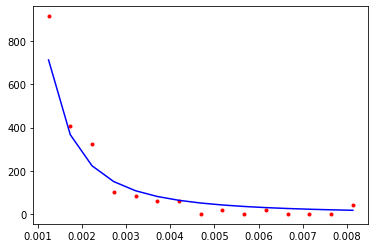

CPU times: user 1.35 ms, sys: 837 µs, total: 2.18 ms
Wall time: 766 µs
52591.39471769485


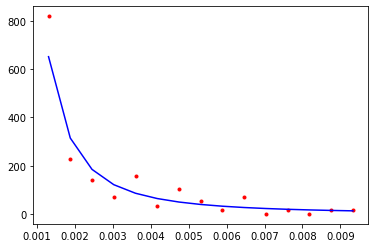

CPU times: user 1.34 ms, sys: 646 µs, total: 1.99 ms
Wall time: 673 µs
17045.178053265936


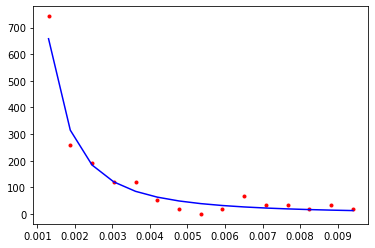

CPU times: user 1.78 ms, sys: 701 µs, total: 2.48 ms
Wall time: 857 µs
41699.812700064766


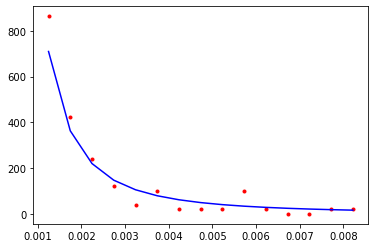

CPU times: user 1.95 ms, sys: 805 µs, total: 2.76 ms
Wall time: 967 µs
25939.526928935065


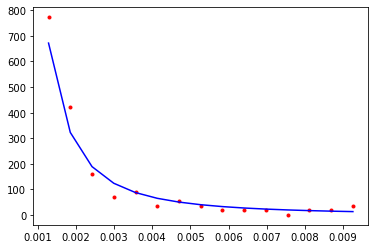

CPU times: user 2.13 ms, sys: 727 µs, total: 2.86 ms
Wall time: 962 µs
16457.164565169245


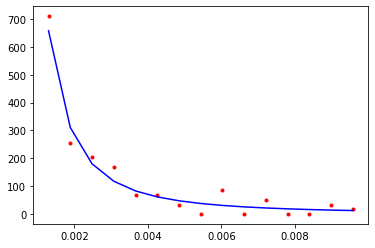

CPU times: user 2.97 ms, sys: 1.05 ms, total: 4.02 ms
Wall time: 1.36 ms
27034.16486868997


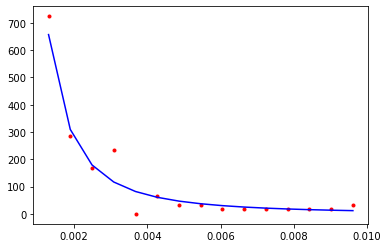

CPU times: user 2.64 ms, sys: 837 µs, total: 3.48 ms
Wall time: 1.19 ms
58140.70208370107


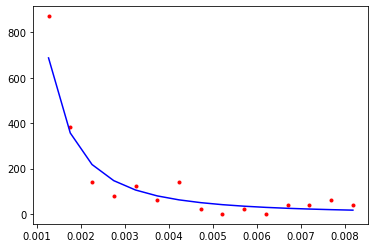

CPU times: user 2.94 ms, sys: 828 µs, total: 3.77 ms
Wall time: 1.29 ms
26359.161211633604


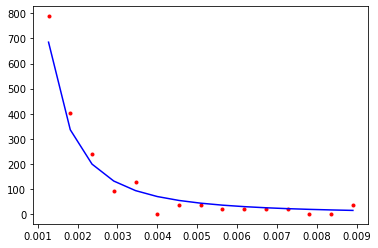

CPU times: user 2.86 ms, sys: 1.06 ms, total: 3.92 ms
Wall time: 1.44 ms
61089.541411336715


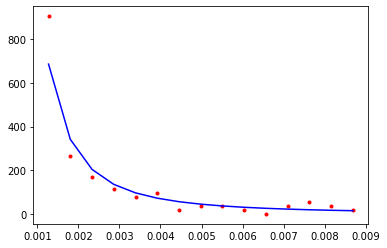

CPU times: user 3.45 ms, sys: 840 µs, total: 4.29 ms
Wall time: 1.45 ms
24699.124209731828


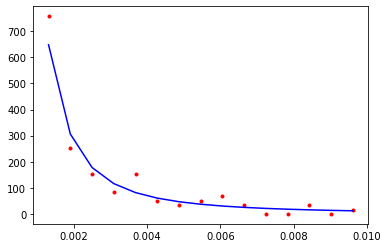

CPU times: user 3.73 ms, sys: 1.13 ms, total: 4.86 ms
Wall time: 1.7 ms
39252.7942879848


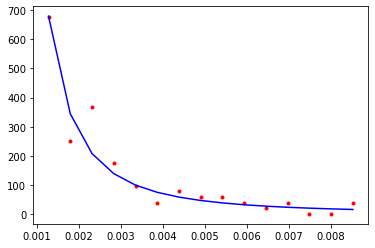

CPU times: user 4.37 ms, sys: 1.07 ms, total: 5.43 ms
Wall time: 1.85 ms
6154.301737334626


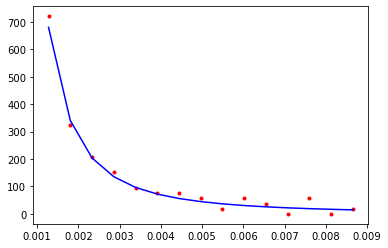

CPU times: user 4.44 ms, sys: 1.02 ms, total: 5.46 ms
Wall time: 1.84 ms
45191.04379804689


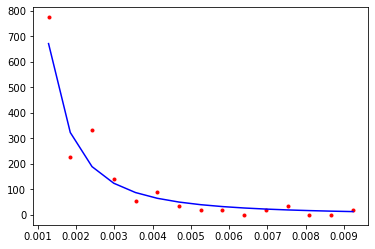

CPU times: user 4.59 ms, sys: 1.02 ms, total: 5.61 ms
Wall time: 1.91 ms
35696.398953400705


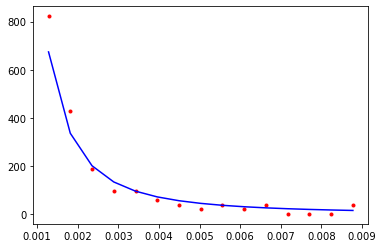

CPU times: user 4.89 ms, sys: 1.28 ms, total: 6.18 ms
Wall time: 2.13 ms
19848.734320455325


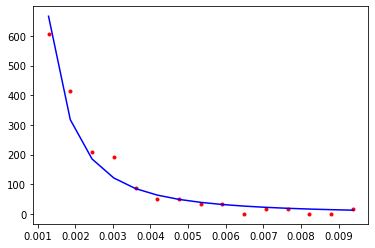

CPU times: user 4.99 ms, sys: 1.31 ms, total: 6.3 ms
Wall time: 2.18 ms
59847.30565408921


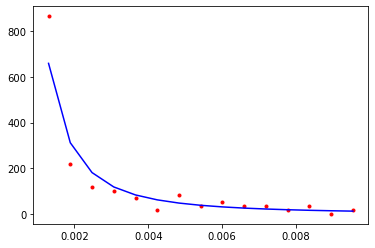

CPU times: user 5.62 ms, sys: 1.38 ms, total: 7 ms
Wall time: 2.39 ms
33209.96916082753


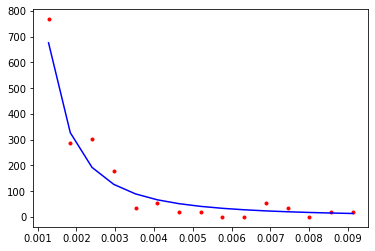

CPU times: user 6.04 ms, sys: 1.32 ms, total: 7.37 ms
Wall time: 2.49 ms
13078.522851949861


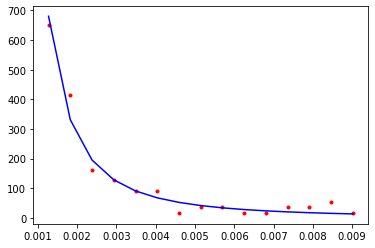

CPU times: user 5.97 ms, sys: 1.47 ms, total: 7.43 ms
Wall time: 2.58 ms
11447.600597877585


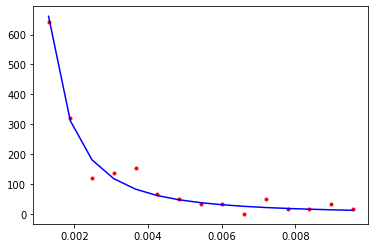

CPU times: user 6.34 ms, sys: 1.31 ms, total: 7.65 ms
Wall time: 2.59 ms
41666.35840103005


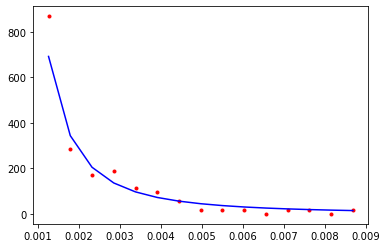

CPU times: user 1.42 ms, sys: 1.23 ms, total: 2.65 ms
Wall time: 869 µs
40502.381881544454


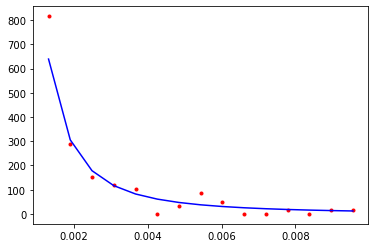

CPU times: user 1.18 ms, sys: 639 µs, total: 1.82 ms
Wall time: 639 µs
39409.41656682801


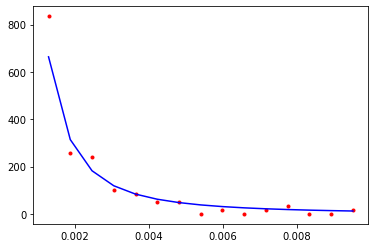

CPU times: user 1.53 ms, sys: 839 µs, total: 2.36 ms
Wall time: 833 µs
10691.470875332256


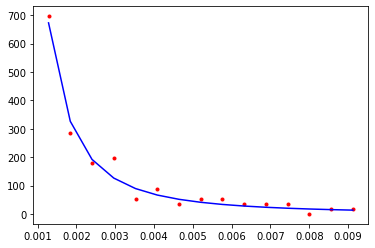

CPU times: user 1.68 ms, sys: 744 µs, total: 2.43 ms
Wall time: 849 µs
25625.096239251867


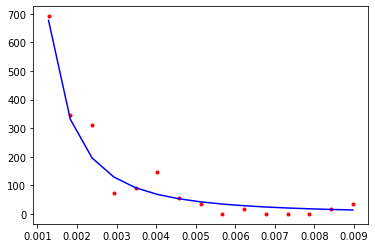

CPU times: user 2.06 ms, sys: 669 µs, total: 2.73 ms
Wall time: 915 µs
10357.980096722096


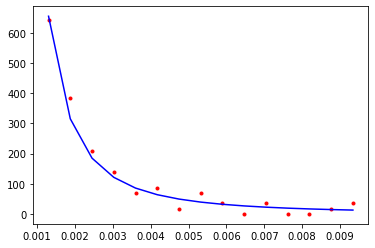

CPU times: user 1.95 ms, sys: 817 µs, total: 2.77 ms
Wall time: 971 µs
18587.635979191462


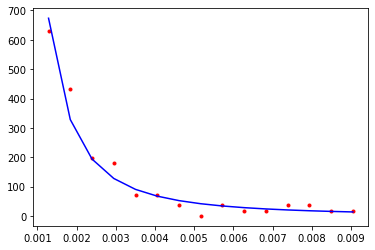

CPU times: user 2.45 ms, sys: 754 µs, total: 3.2 ms
Wall time: 1.08 ms
17874.451009064363


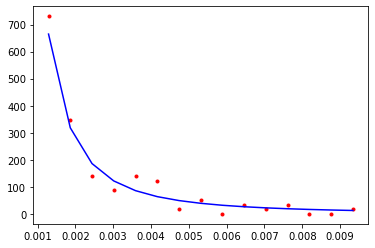

CPU times: user 2.59 ms, sys: 853 µs, total: 3.44 ms
Wall time: 1.18 ms
16298.463058518106


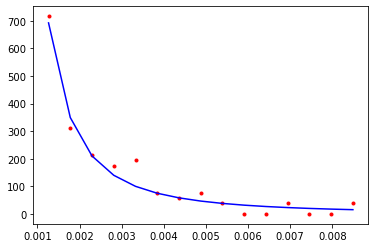

CPU times: user 2.83 ms, sys: 777 µs, total: 3.61 ms
Wall time: 1.23 ms
39219.228473698546


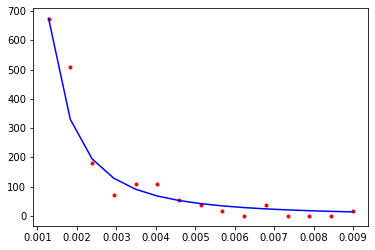

CPU times: user 3.03 ms, sys: 916 µs, total: 3.95 ms
Wall time: 1.38 ms
23729.7413466497


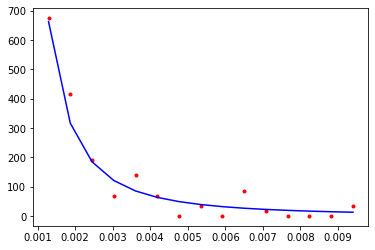

CPU times: user 3.4 ms, sys: 1.16 ms, total: 4.56 ms
Wall time: 1.6 ms
86265.72061866862


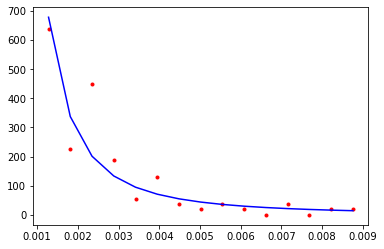

CPU times: user 3.29 ms, sys: 1.1 ms, total: 4.39 ms
Wall time: 1.63 ms
22362.036793886135


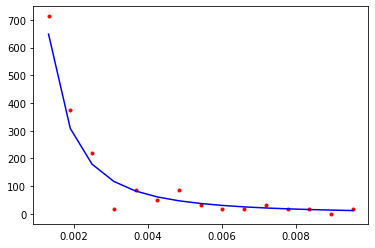

CPU times: user 3.85 ms, sys: 1.15 ms, total: 5 ms
Wall time: 1.79 ms
15045.074174958234


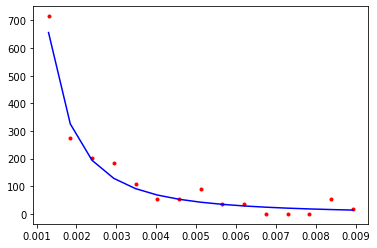

CPU times: user 4.41 ms, sys: 992 µs, total: 5.41 ms
Wall time: 1.84 ms
32111.17637970529


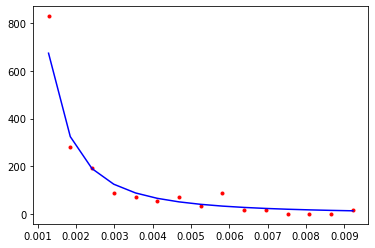

CPU times: user 4.61 ms, sys: 1.08 ms, total: 5.69 ms
Wall time: 1.93 ms
29062.602345701314


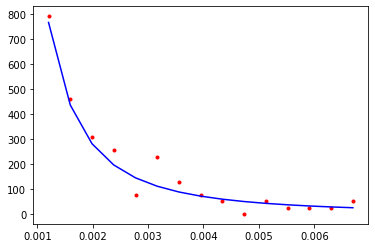

CPU times: user 4.87 ms, sys: 1.14 ms, total: 6 ms
Wall time: 2.04 ms
26355.300693237037


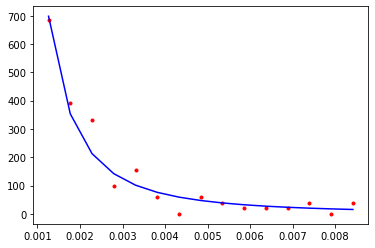

CPU times: user 4.95 ms, sys: 1.35 ms, total: 6.29 ms
Wall time: 2.19 ms
43837.35873952788


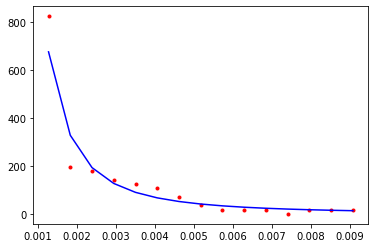

CPU times: user 5.5 ms, sys: 1.16 ms, total: 6.66 ms
Wall time: 2.25 ms
29443.919603768594


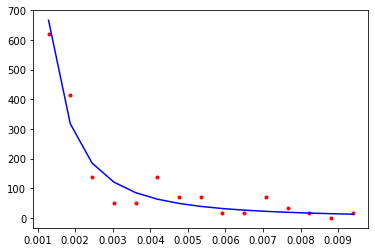

CPU times: user 5.77 ms, sys: 1.2 ms, total: 6.97 ms
Wall time: 2.37 ms
28681.795648823376


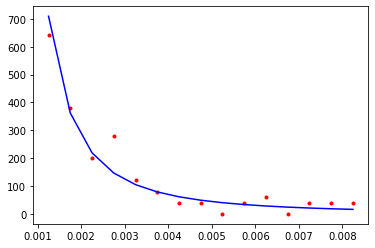

CPU times: user 5.99 ms, sys: 1.25 ms, total: 7.23 ms
Wall time: 2.46 ms
26548.072062477346


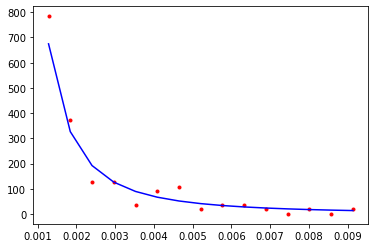

CPU times: user 6.45 ms, sys: 1.51 ms, total: 7.97 ms
Wall time: 2.73 ms
28538.05798985435


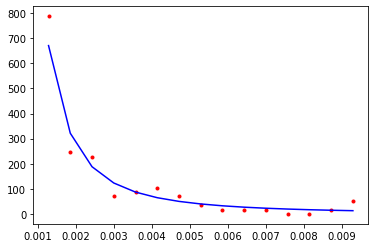

CPU times: user 1.1 ms, sys: 1.17 ms, total: 2.27 ms
Wall time: 760 µs
20007.530768775214


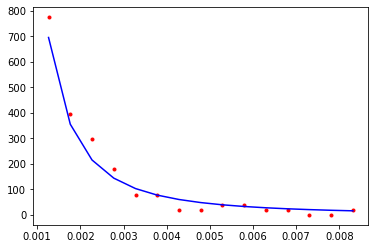

CPU times: user 896 µs, sys: 482 µs, total: 1.38 ms
Wall time: 468 µs
12066.613794988116


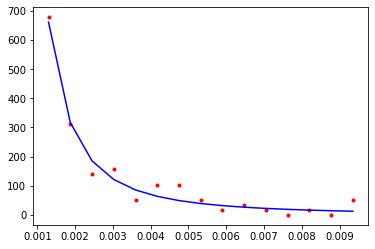

CPU times: user 1 ms, sys: 631 µs, total: 1.63 ms
Wall time: 559 µs
10523.121669474776


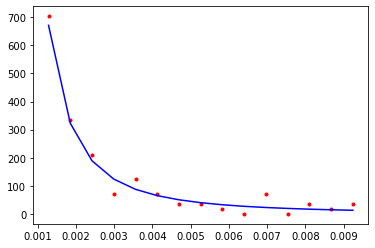

CPU times: user 1.5 ms, sys: 557 µs, total: 2.05 ms
Wall time: 693 µs
18999.15672680774


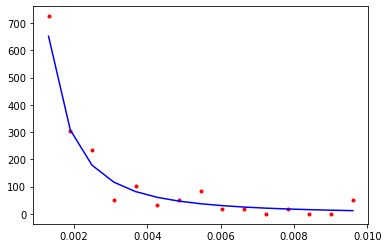

CPU times: user 1.88 ms, sys: 746 µs, total: 2.63 ms
Wall time: 881 µs
18645.226038754725


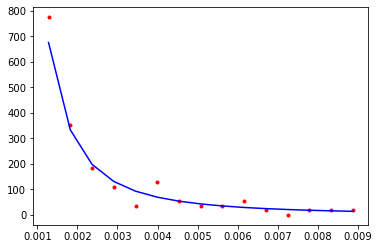

CPU times: user 2 ms, sys: 750 µs, total: 2.75 ms
Wall time: 970 µs
27250.518413609923


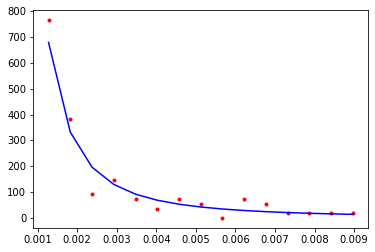

CPU times: user 2.18 ms, sys: 748 µs, total: 2.93 ms
Wall time: 1.01 ms
50598.70944475247


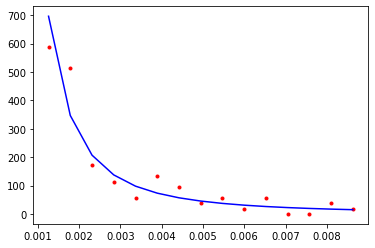

CPU times: user 2.36 ms, sys: 696 µs, total: 3.06 ms
Wall time: 1.05 ms
63729.42351911766


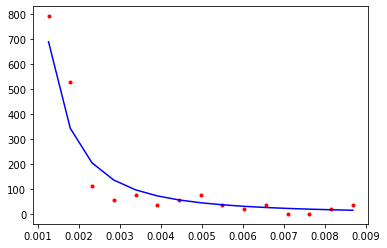

CPU times: user 2.91 ms, sys: 834 µs, total: 3.74 ms
Wall time: 1.27 ms
23593.722408455178


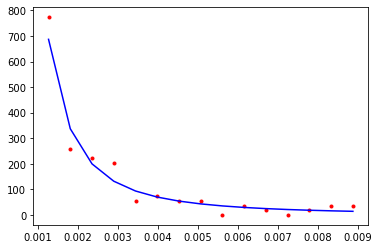

CPU times: user 3.4 ms, sys: 855 µs, total: 4.26 ms
Wall time: 1.45 ms
23628.694408593725


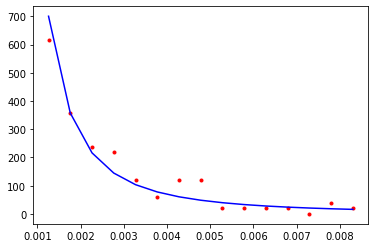

CPU times: user 3.24 ms, sys: 800 µs, total: 4.04 ms
Wall time: 1.36 ms
21722.809992882383


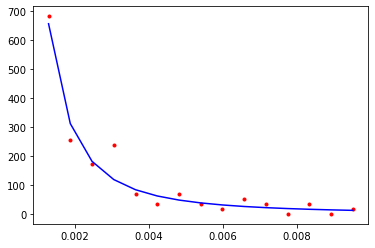

CPU times: user 3.98 ms, sys: 1.04 ms, total: 5.03 ms
Wall time: 1.71 ms
23179.709566342593


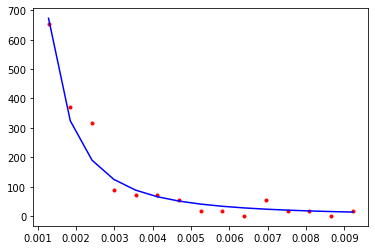

CPU times: user 4.1 ms, sys: 1.13 ms, total: 5.23 ms
Wall time: 1.8 ms
16292.517659307476


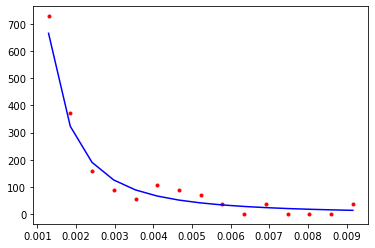

CPU times: user 3.92 ms, sys: 1.04 ms, total: 4.96 ms
Wall time: 1.72 ms
41549.986865583334


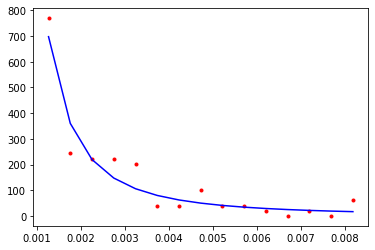

CPU times: user 4.61 ms, sys: 1.1 ms, total: 5.71 ms
Wall time: 1.94 ms
19739.359321223892


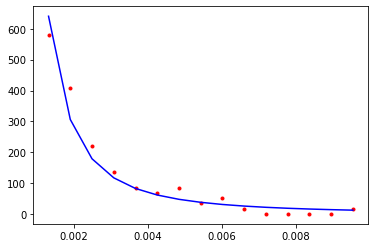

CPU times: user 4.87 ms, sys: 1.11 ms, total: 5.99 ms
Wall time: 2.05 ms
26793.881907208186


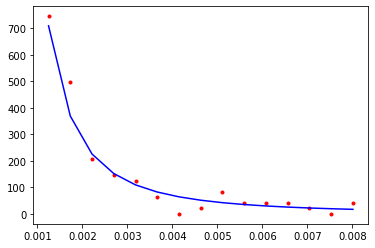

CPU times: user 5.22 ms, sys: 1.43 ms, total: 6.65 ms
Wall time: 2.33 ms
19555.789194824654


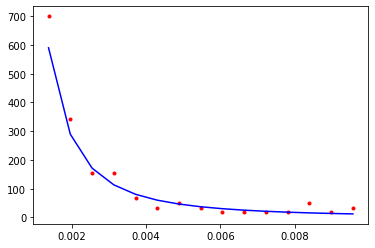

CPU times: user 5.59 ms, sys: 1.21 ms, total: 6.8 ms
Wall time: 2.3 ms
9465.221202356588


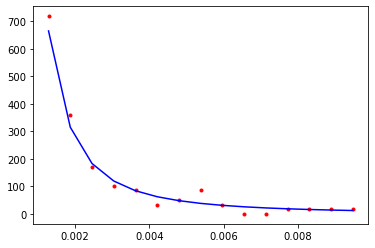

CPU times: user 5.49 ms, sys: 1.25 ms, total: 6.74 ms
Wall time: 2.31 ms
19958.599491457284


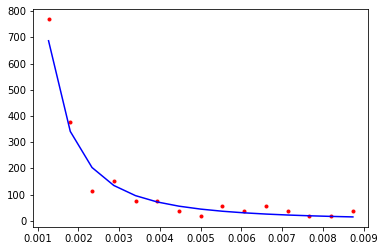

CPU times: user 5.65 ms, sys: 1.45 ms, total: 7.09 ms
Wall time: 2.45 ms
18899.994696671314


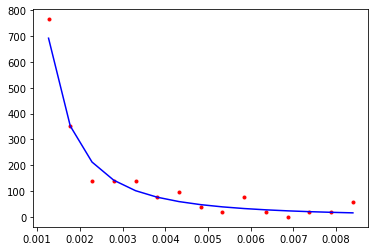

CPU times: user 6.14 ms, sys: 1.46 ms, total: 7.59 ms
Wall time: 2.61 ms
48849.92001603421


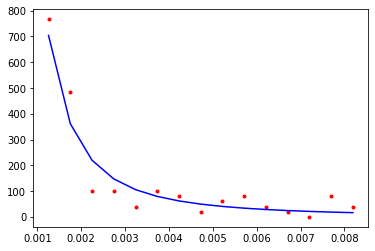

CPU times: user 1.15 ms, sys: 1.21 ms, total: 2.35 ms
Wall time: 798 µs
42978.86547320857


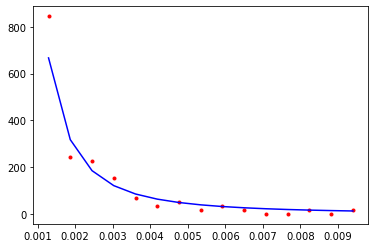

CPU times: user 849 µs, sys: 563 µs, total: 1.41 ms
Wall time: 503 µs
22591.815288892525


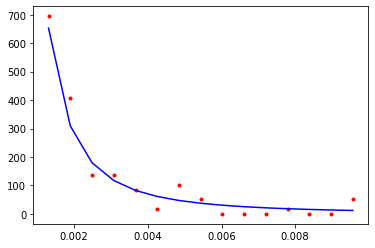

CPU times: user 1.34 ms, sys: 697 µs, total: 2.04 ms
Wall time: 718 µs
37130.76756960368


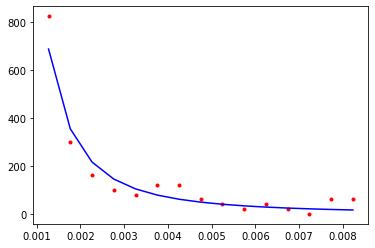

CPU times: user 1.62 ms, sys: 721 µs, total: 2.34 ms
Wall time: 811 µs
40629.01027141373


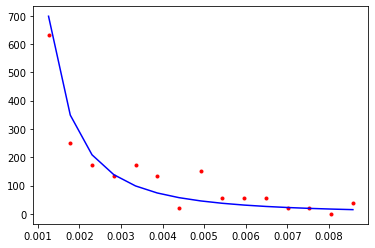

CPU times: user 1.85 ms, sys: 670 µs, total: 2.52 ms
Wall time: 860 µs
53010.677965023766


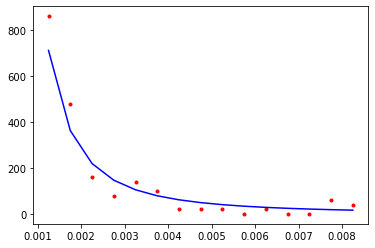

CPU times: user 2.03 ms, sys: 644 µs, total: 2.67 ms
Wall time: 909 µs
22250.16816113923


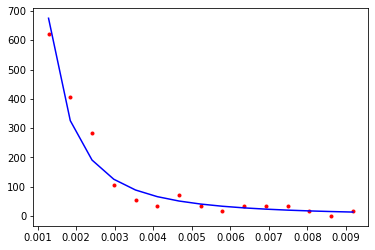

CPU times: user 2.31 ms, sys: 753 µs, total: 3.07 ms
Wall time: 1.04 ms
28493.94502061498


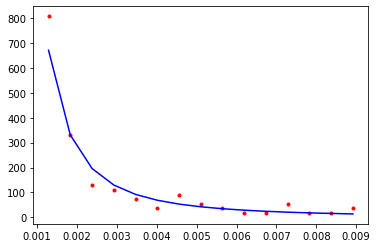

CPU times: user 2.9 ms, sys: 897 µs, total: 3.8 ms
Wall time: 1.32 ms
28867.062691751133


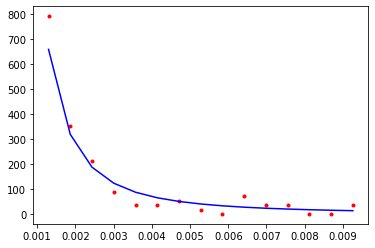

CPU times: user 2.64 ms, sys: 1.04 ms, total: 3.68 ms
Wall time: 1.33 ms
24619.633307379972


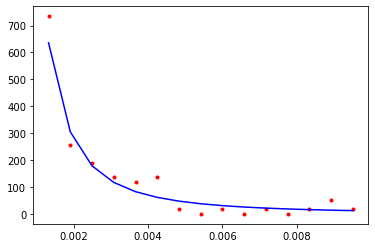

CPU times: user 2.95 ms, sys: 1.2 ms, total: 4.15 ms
Wall time: 2.36 ms
22194.696581016044


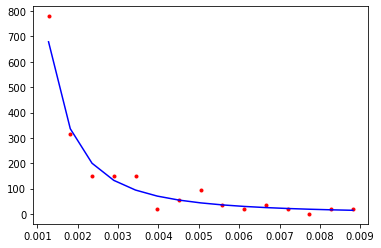

CPU times: user 3.43 ms, sys: 1.03 ms, total: 4.46 ms
Wall time: 1.54 ms
41274.517296541366


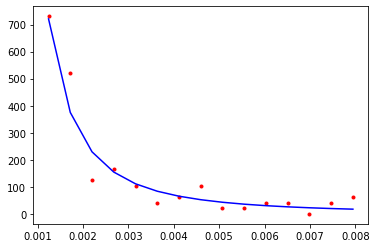

CPU times: user 3.53 ms, sys: 1.14 ms, total: 4.66 ms
Wall time: 1.67 ms
43268.115461307745


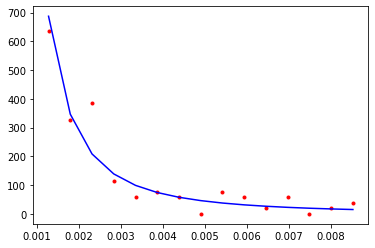

CPU times: user 3.84 ms, sys: 1.23 ms, total: 5.07 ms
Wall time: 1.82 ms
55574.952797845


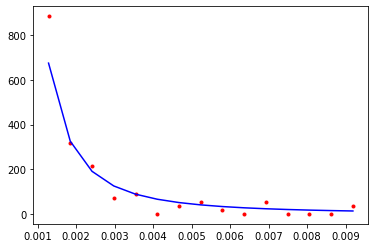

CPU times: user 4.17 ms, sys: 852 µs, total: 5.03 ms
Wall time: 1.71 ms
40766.082195637726


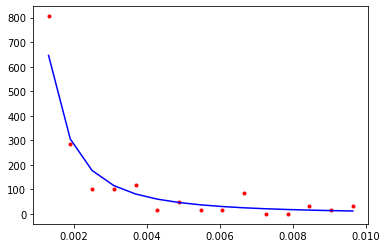

CPU times: user 4.54 ms, sys: 1.17 ms, total: 5.71 ms
Wall time: 1.96 ms
40024.86670649611


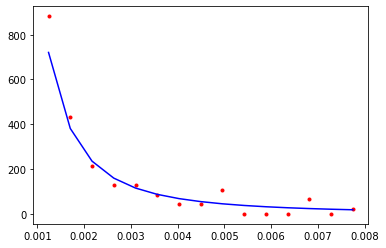

CPU times: user 5.2 ms, sys: 1.44 ms, total: 6.65 ms
Wall time: 2.3 ms
19587.830732729828


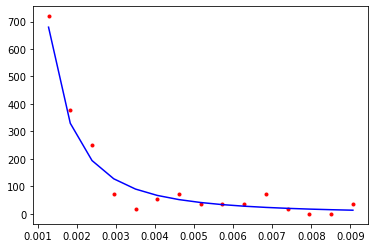

CPU times: user 5.2 ms, sys: 1.12 ms, total: 6.33 ms
Wall time: 2.13 ms
19959.436832328152


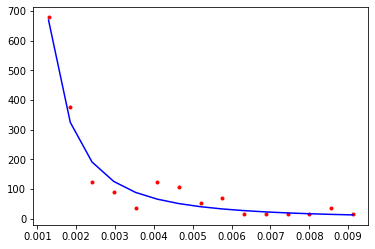

CPU times: user 5.73 ms, sys: 1.19 ms, total: 6.92 ms
Wall time: 2.33 ms
21962.508113076234


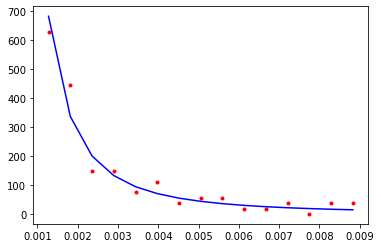

CPU times: user 5.86 ms, sys: 1.22 ms, total: 7.08 ms
Wall time: 2.38 ms
31323.04400032696


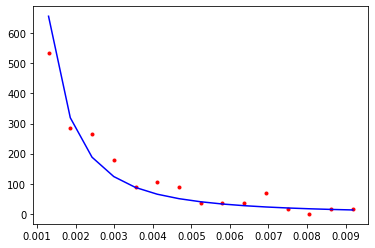

CPU times: user 5.59 ms, sys: 1.57 ms, total: 7.16 ms
Wall time: 2.52 ms
6988.1815247310515


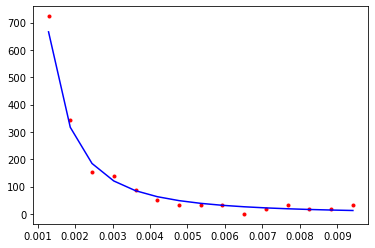

CPU times: user 6.31 ms, sys: 1.25 ms, total: 7.56 ms
Wall time: 2.55 ms
69834.91760006508


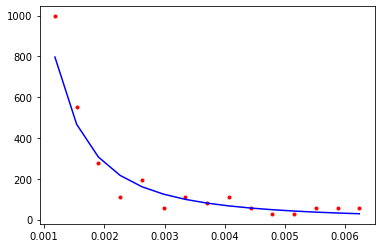

CPU times: user 1.63 ms, sys: 1.62 ms, total: 3.24 ms
Wall time: 1.08 ms
29544.420320947487


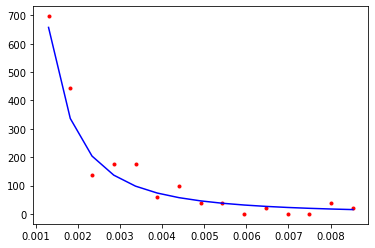

CPU times: user 1.19 ms, sys: 739 µs, total: 1.93 ms
Wall time: 680 µs
26789.10620002772


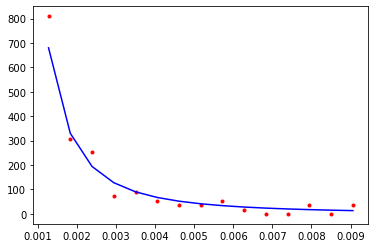

CPU times: user 1.25 ms, sys: 536 µs, total: 1.78 ms
Wall time: 597 µs
52951.70966181179


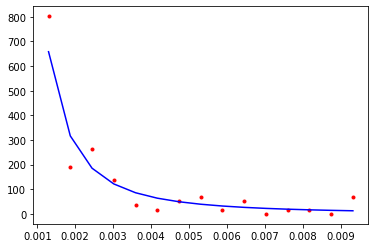

CPU times: user 1.49 ms, sys: 645 µs, total: 2.14 ms
Wall time: 728 µs
15900.729084148392


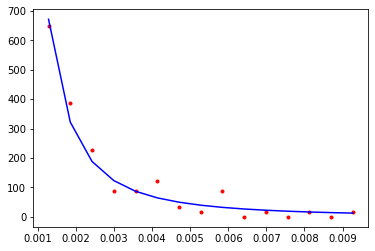

CPU times: user 2.07 ms, sys: 832 µs, total: 2.9 ms
Wall time: 987 µs
20882.154251940607


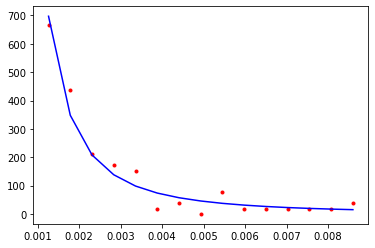

CPU times: user 1.94 ms, sys: 574 µs, total: 2.52 ms
Wall time: 835 µs
36316.81293349336


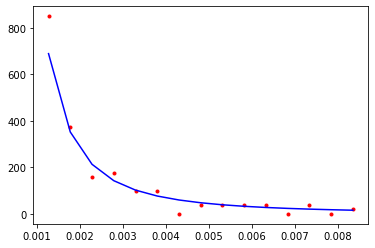

CPU times: user 2.59 ms, sys: 771 µs, total: 3.36 ms
Wall time: 1.15 ms
32205.155561962933


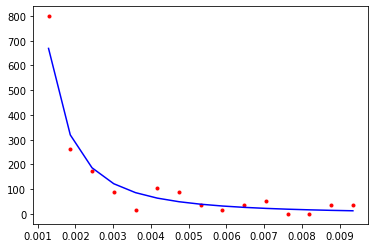

CPU times: user 2.68 ms, sys: 699 µs, total: 3.38 ms
Wall time: 1.14 ms
14772.736181658276


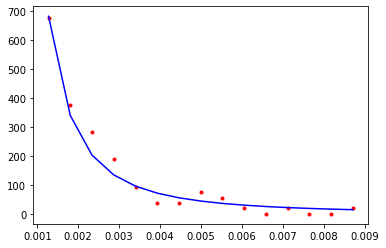

CPU times: user 2.9 ms, sys: 874 µs, total: 3.78 ms
Wall time: 1.29 ms
22377.154534803256


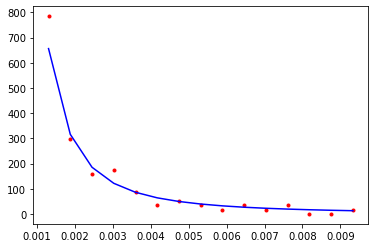

CPU times: user 3.07 ms, sys: 828 µs, total: 3.9 ms
Wall time: 1.34 ms
18035.091354905697


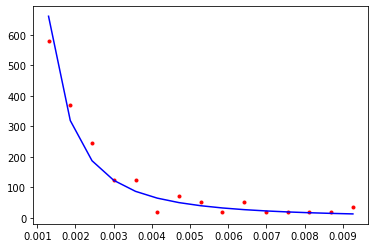

CPU times: user 3.42 ms, sys: 1.01 ms, total: 4.43 ms
Wall time: 1.52 ms
25728.27591048018


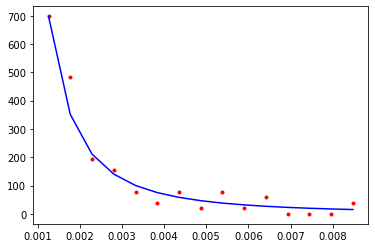

CPU times: user 3.37 ms, sys: 1.13 ms, total: 4.49 ms
Wall time: 1.6 ms
15600.09057910207


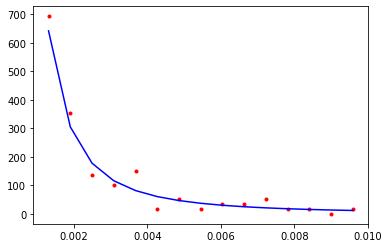

CPU times: user 3.9 ms, sys: 1.06 ms, total: 4.95 ms
Wall time: 1.7 ms
26876.558806855035


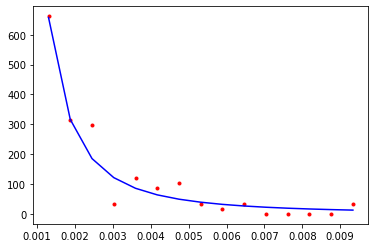

CPU times: user 4.64 ms, sys: 1.09 ms, total: 5.73 ms
Wall time: 1.93 ms
21667.881053863257


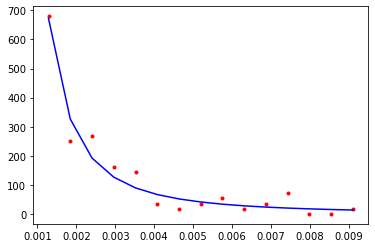

CPU times: user 4.38 ms, sys: 1.21 ms, total: 5.6 ms
Wall time: 1.95 ms
114735.82735832364


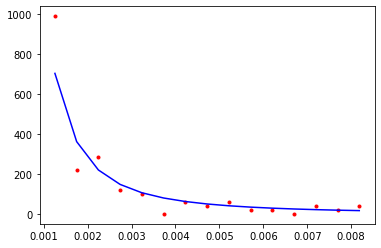

CPU times: user 4.86 ms, sys: 1.07 ms, total: 5.93 ms
Wall time: 2.01 ms
13967.063064667907


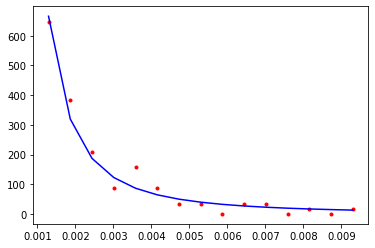

CPU times: user 5.42 ms, sys: 1.4 ms, total: 6.81 ms
Wall time: 2.37 ms
41197.97135323553


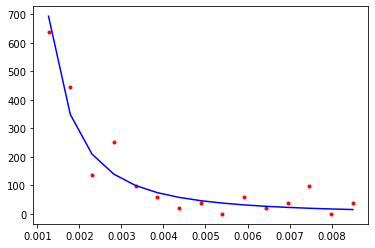

CPU times: user 5.06 ms, sys: 1.6 ms, total: 6.66 ms
Wall time: 2.38 ms
9156.045418994356


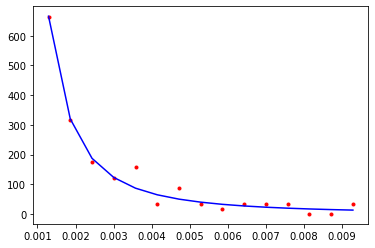

CPU times: user 5.75 ms, sys: 1.24 ms, total: 6.99 ms
Wall time: 2.36 ms
13798.905276723775


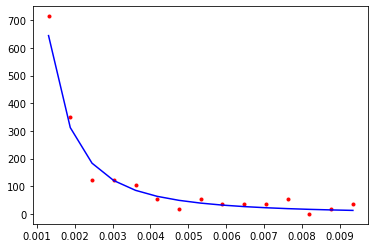

CPU times: user 6.02 ms, sys: 1.2 ms, total: 7.22 ms
Wall time: 2.44 ms
26811.24750216184


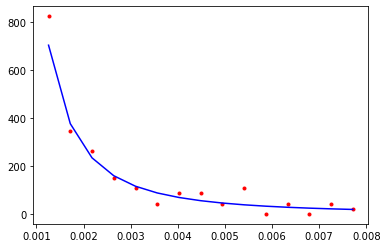

CPU times: user 6.3 ms, sys: 1.34 ms, total: 7.64 ms
Wall time: 2.62 ms
9821.480219018767


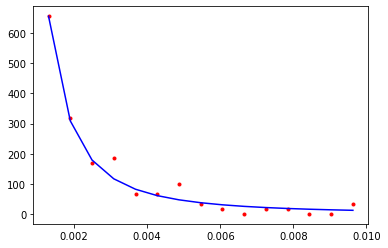

CPU times: user 1.28 ms, sys: 1.16 ms, total: 2.44 ms
Wall time: 802 µs
62824.42457841828


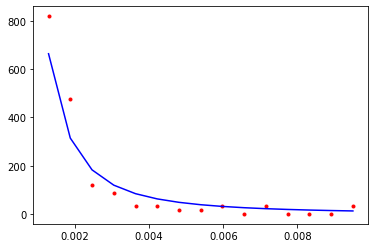

CPU times: user 1.1 ms, sys: 823 µs, total: 1.92 ms
Wall time: 728 µs
15294.29532507957


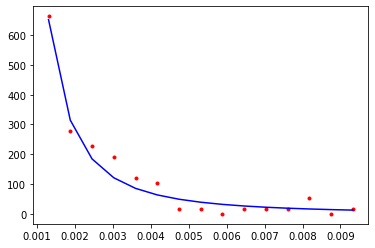

CPU times: user 1.42 ms, sys: 664 µs, total: 2.08 ms
Wall time: 719 µs
13645.843992589243


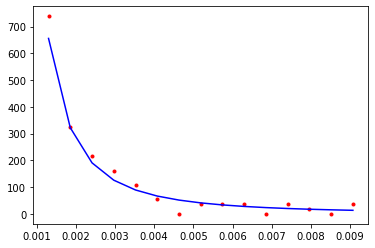

CPU times: user 1.52 ms, sys: 731 µs, total: 2.25 ms
Wall time: 778 µs
72188.21951789108


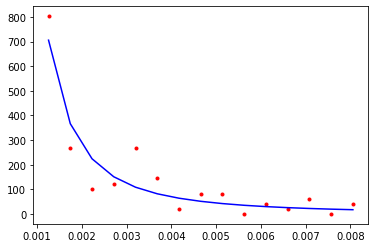

CPU times: user 1.74 ms, sys: 591 µs, total: 2.33 ms
Wall time: 792 µs
13723.245535423264


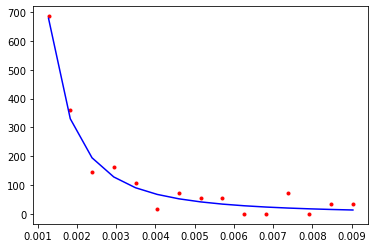

CPU times: user 2.02 ms, sys: 814 µs, total: 2.83 ms
Wall time: 1.03 ms
52448.483313522775


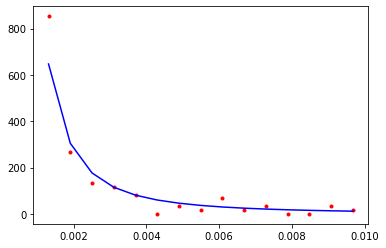

CPU times: user 2.33 ms, sys: 766 µs, total: 3.1 ms
Wall time: 1.06 ms
25412.719244194523


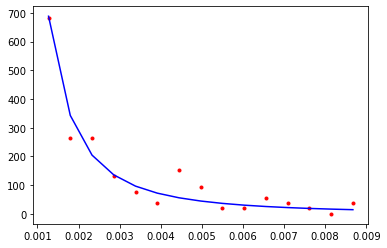

CPU times: user 2.71 ms, sys: 955 µs, total: 3.66 ms
Wall time: 1.34 ms
12047.301598996195


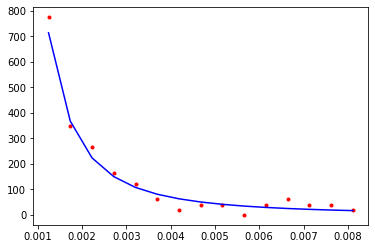

CPU times: user 2.78 ms, sys: 887 µs, total: 3.66 ms
Wall time: 1.28 ms
41289.26537867634


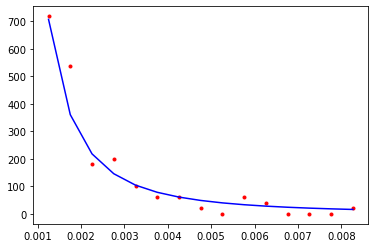

CPU times: user 3.19 ms, sys: 790 µs, total: 3.98 ms
Wall time: 1.35 ms
14955.697230390731


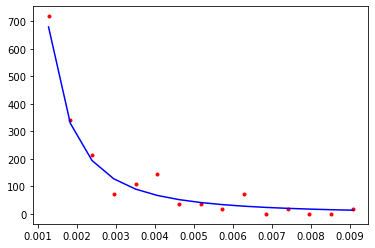

CPU times: user 3.41 ms, sys: 918 µs, total: 4.33 ms
Wall time: 1.48 ms
19394.93023978889


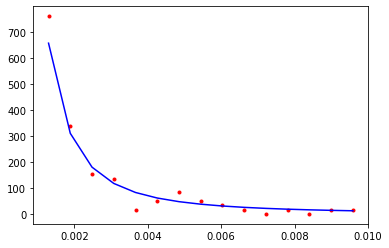

CPU times: user 4.05 ms, sys: 920 µs, total: 4.97 ms
Wall time: 1.67 ms
26051.87730862801


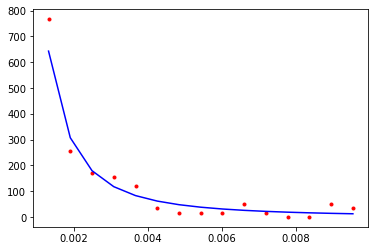

CPU times: user 4.39 ms, sys: 1.05 ms, total: 5.44 ms
Wall time: 1.84 ms
28798.787268169242


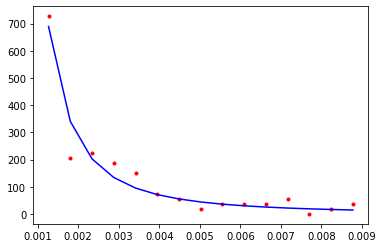

CPU times: user 4.32 ms, sys: 977 µs, total: 5.3 ms
Wall time: 1.8 ms
32059.331508738673


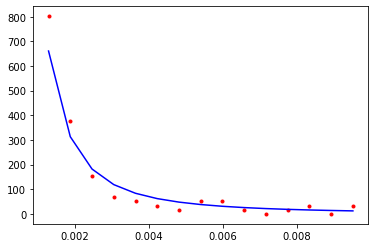

CPU times: user 4.55 ms, sys: 974 µs, total: 5.52 ms
Wall time: 1.86 ms
13923.572553339845


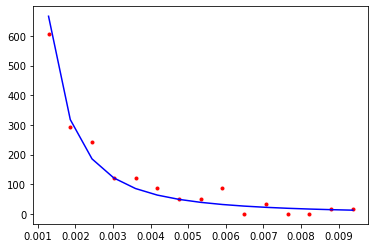

CPU times: user 5.09 ms, sys: 1.22 ms, total: 6.31 ms
Wall time: 2.16 ms
40420.59918469262


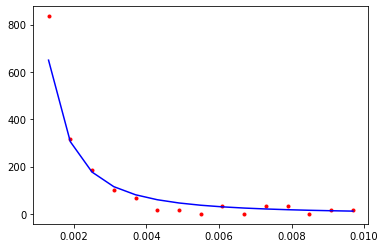

CPU times: user 5.57 ms, sys: 1.23 ms, total: 6.8 ms
Wall time: 2.3 ms
59659.32641741317


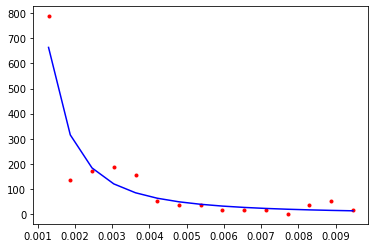

CPU times: user 5.69 ms, sys: 1.3 ms, total: 6.99 ms
Wall time: 2.39 ms
42816.01834011861


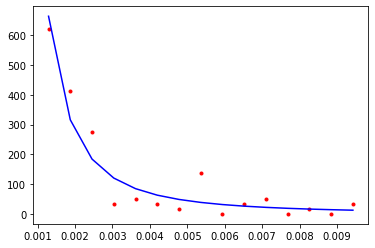

CPU times: user 5.74 ms, sys: 1.14 ms, total: 6.88 ms
Wall time: 2.34 ms
10588.151919670845


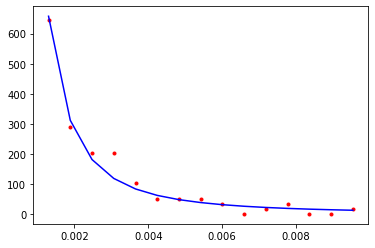

CPU times: user 5.75 ms, sys: 1.42 ms, total: 7.16 ms
Wall time: 2.49 ms
37230.99995619764


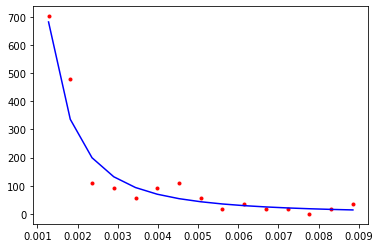

CPU times: user 6.41 ms, sys: 1.27 ms, total: 7.68 ms
Wall time: 2.59 ms
56180.5886188206


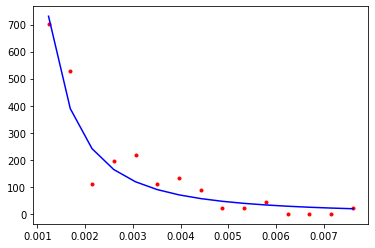

CPU times: user 1.4 ms, sys: 1.48 ms, total: 2.88 ms
Wall time: 937 µs
19870.978040530303


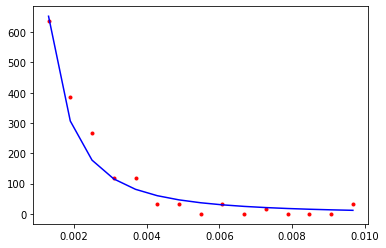

CPU times: user 1.06 ms, sys: 643 µs, total: 1.71 ms
Wall time: 611 µs
20511.84095305042


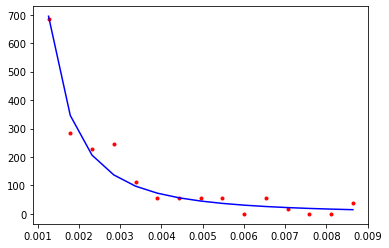

CPU times: user 1.3 ms, sys: 765 µs, total: 2.07 ms
Wall time: 734 µs
20315.612385600518


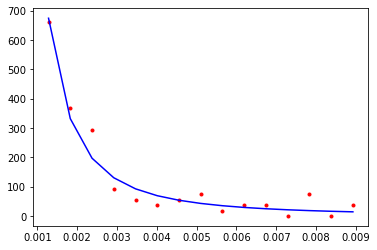

CPU times: user 1.5 ms, sys: 529 µs, total: 2.03 ms
Wall time: 682 µs
68314.66996227369


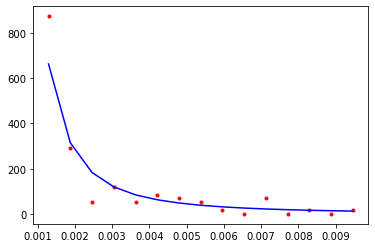

CPU times: user 1.76 ms, sys: 592 µs, total: 2.36 ms
Wall time: 804 µs
13491.997546016166


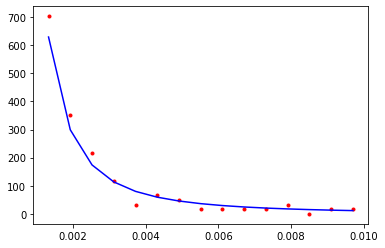

CPU times: user 2.11 ms, sys: 866 µs, total: 2.98 ms
Wall time: 1.06 ms
32249.62452488273


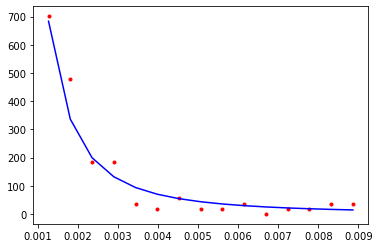

CPU times: user 2.59 ms, sys: 943 µs, total: 3.53 ms
Wall time: 1.2 ms
14310.741337708681


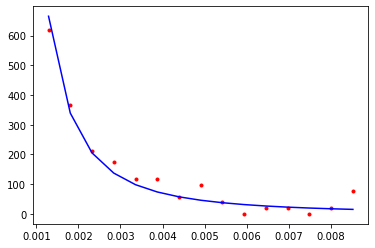

CPU times: user 2.68 ms, sys: 819 µs, total: 3.5 ms
Wall time: 1.2 ms
30373.246682475685


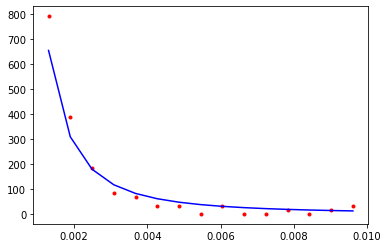

CPU times: user 3.25 ms, sys: 978 µs, total: 4.22 ms
Wall time: 1.44 ms
18970.230359175814


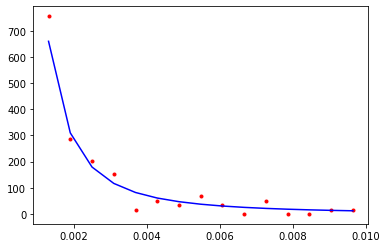

CPU times: user 3.23 ms, sys: 855 µs, total: 4.08 ms
Wall time: 1.38 ms
35982.18960968399


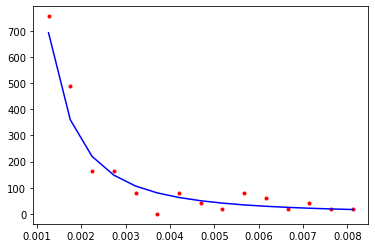

CPU times: user 3.4 ms, sys: 928 µs, total: 4.33 ms
Wall time: 1.49 ms
29453.57517060569


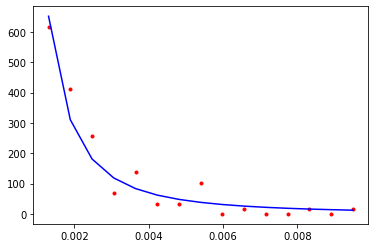

CPU times: user 3.95 ms, sys: 1.07 ms, total: 5.03 ms
Wall time: 1.73 ms
16249.274735912719


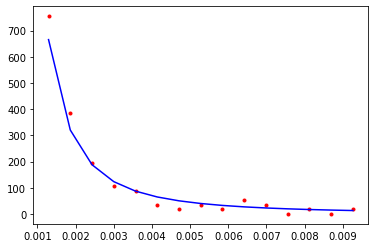

CPU times: user 3.84 ms, sys: 1.01 ms, total: 4.85 ms
Wall time: 1.69 ms
73973.74434498113


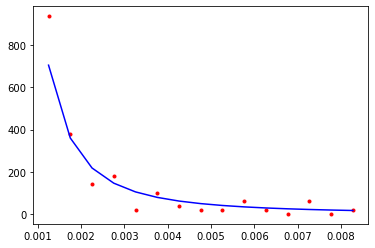

CPU times: user 4.57 ms, sys: 1.22 ms, total: 5.79 ms
Wall time: 2.02 ms
60871.4883614319


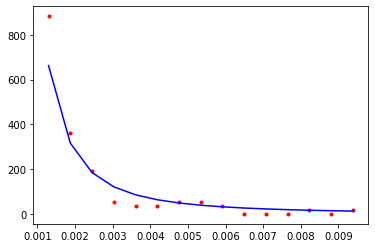

CPU times: user 4.78 ms, sys: 1.37 ms, total: 6.16 ms
Wall time: 2.17 ms
21921.760316314096


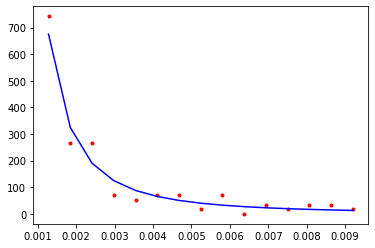

CPU times: user 4.81 ms, sys: 1.17 ms, total: 5.98 ms
Wall time: 2.05 ms
24025.959659609936


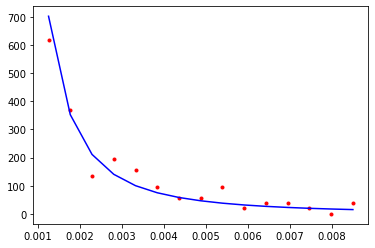

CPU times: user 4.79 ms, sys: 1.38 ms, total: 6.17 ms
Wall time: 2.17 ms
40415.069223463746


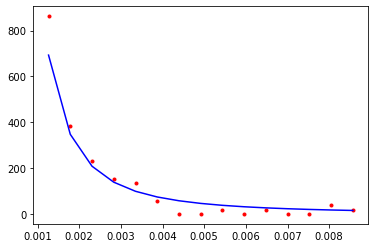

CPU times: user 5.44 ms, sys: 1.36 ms, total: 6.81 ms
Wall time: 2.35 ms
75927.49637972515


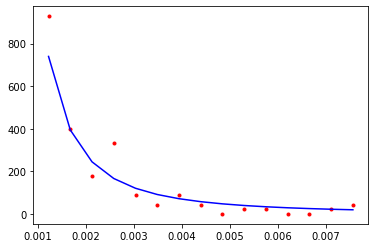

CPU times: user 5.99 ms, sys: 1.29 ms, total: 7.29 ms
Wall time: 2.46 ms
31421.911557225358


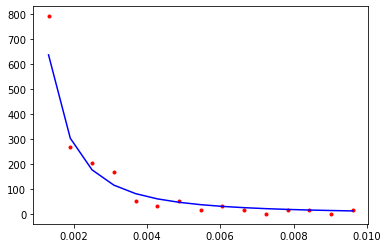

CPU times: user 6.23 ms, sys: 1.31 ms, total: 7.53 ms
Wall time: 2.57 ms
40622.01482277753


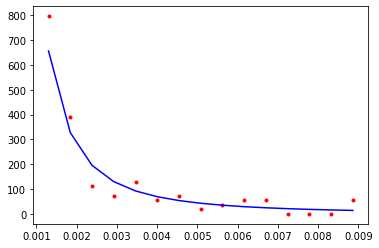

CPU times: user 2.94 ms, sys: 235 µs, total: 3.18 ms
Wall time: 9.2 ms
11965.941848662025


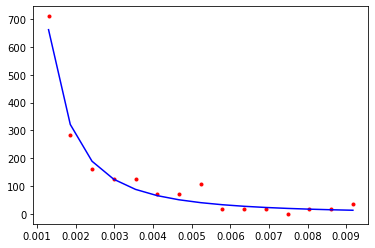

CPU times: user 1.16 ms, sys: 1.12 ms, total: 2.28 ms
Wall time: 755 µs
40546.28084665117


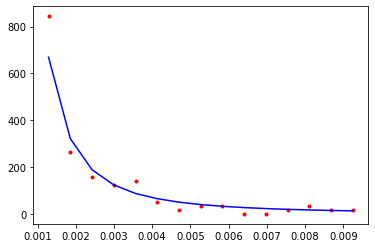

CPU times: user 906 µs, sys: 458 µs, total: 1.36 ms
Wall time: 473 µs
18230.38407509579


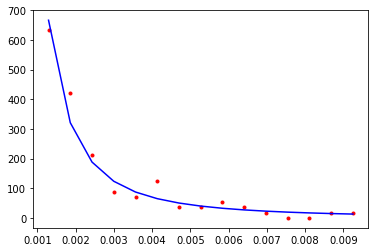

CPU times: user 1.16 ms, sys: 592 µs, total: 1.76 ms
Wall time: 595 µs
6500.124774142754


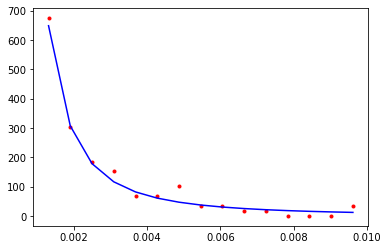

CPU times: user 1.67 ms, sys: 671 µs, total: 2.35 ms
Wall time: 814 µs
176250.23691455222


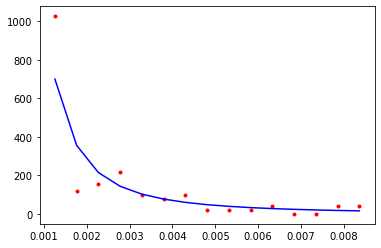

CPU times: user 1.82 ms, sys: 578 µs, total: 2.4 ms
Wall time: 805 µs
33613.85684480058


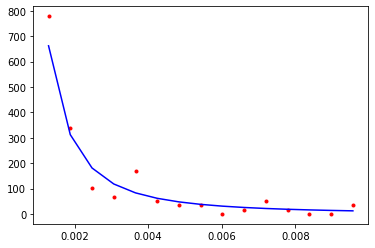

CPU times: user 2.18 ms, sys: 800 µs, total: 2.98 ms
Wall time: 1.07 ms
26553.21765042365


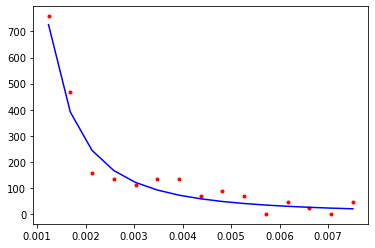

CPU times: user 2.38 ms, sys: 761 µs, total: 3.14 ms
Wall time: 1.07 ms
15147.864624103378


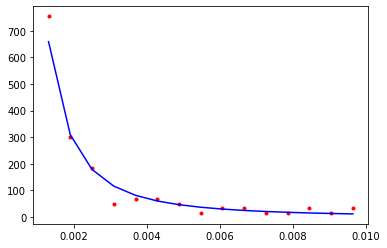

CPU times: user 2.65 ms, sys: 821 µs, total: 3.47 ms
Wall time: 1.17 ms
32742.20120143157


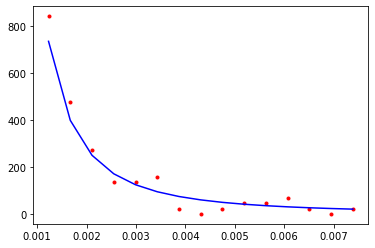

CPU times: user 3.1 ms, sys: 861 µs, total: 3.96 ms
Wall time: 1.36 ms
8627.944744803637


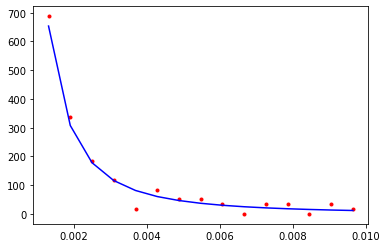

CPU times: user 3.45 ms, sys: 990 µs, total: 4.44 ms
Wall time: 1.51 ms
42045.80741227423


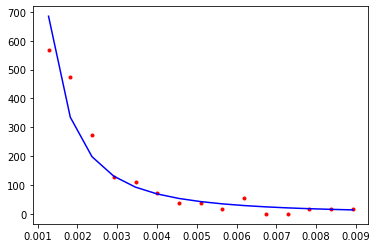

CPU times: user 3.52 ms, sys: 958 µs, total: 4.48 ms
Wall time: 1.54 ms
15450.770967327533


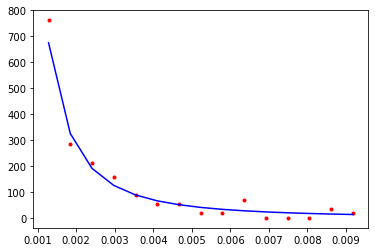

CPU times: user 3.52 ms, sys: 1.08 ms, total: 4.6 ms
Wall time: 1.64 ms
32243.030147578647


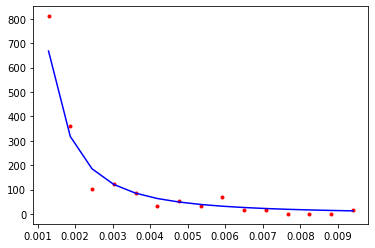

CPU times: user 3.82 ms, sys: 1.14 ms, total: 4.97 ms
Wall time: 1.77 ms
44005.41610090154


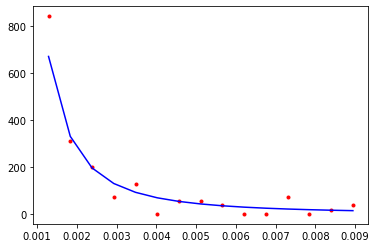

CPU times: user 4.56 ms, sys: 1.06 ms, total: 5.62 ms
Wall time: 1.92 ms
46262.886676308975


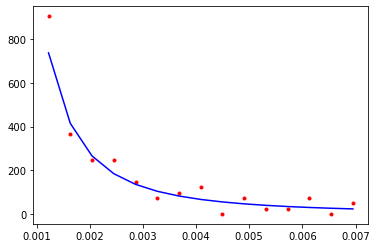

CPU times: user 4.88 ms, sys: 1.06 ms, total: 5.94 ms
Wall time: 2.01 ms
21992.119301197396


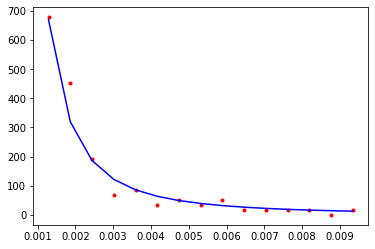

CPU times: user 4.8 ms, sys: 1.36 ms, total: 6.16 ms
Wall time: 2.16 ms
30977.11883615033


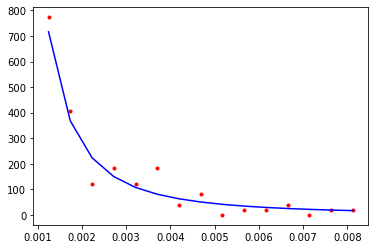

CPU times: user 5.27 ms, sys: 1.45 ms, total: 6.73 ms
Wall time: 2.34 ms
11128.178968854834


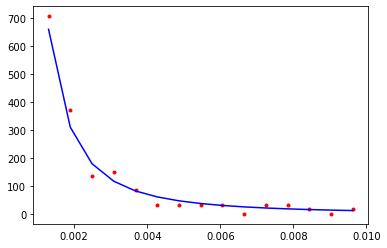

CPU times: user 6.35 ms, sys: 1.46 ms, total: 7.81 ms
Wall time: 2.66 ms
16658.739353043115


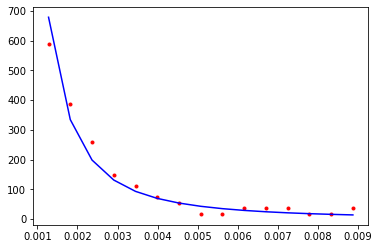

CPU times: user 5.77 ms, sys: 1.28 ms, total: 7.05 ms
Wall time: 2.4 ms
53043.31339061815


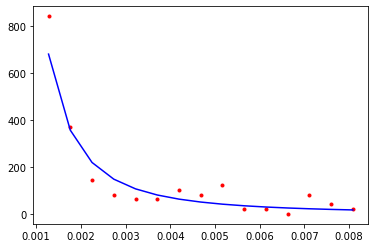

CPU times: user 5.83 ms, sys: 1.6 ms, total: 7.43 ms
Wall time: 2.61 ms
36664.35752706472


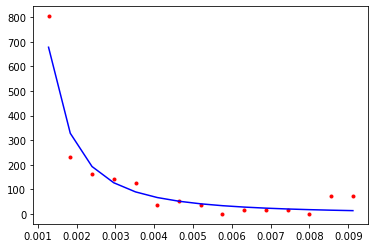

CPU times: user 6.25 ms, sys: 1.36 ms, total: 7.62 ms
Wall time: 2.59 ms
20232.492966776263


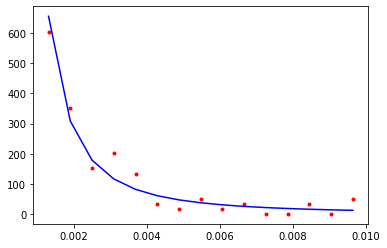

CPU times: user 1.11 ms, sys: 1.15 ms, total: 2.27 ms
Wall time: 747 µs
56694.59103123827


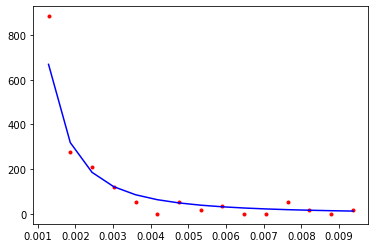

CPU times: user 978 µs, sys: 531 µs, total: 1.51 ms
Wall time: 522 µs
19526.21651730073


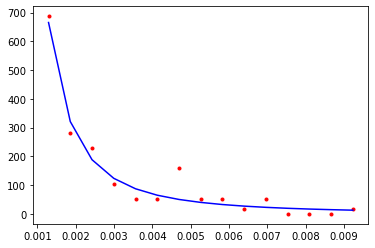

CPU times: user 1.47 ms, sys: 722 µs, total: 2.19 ms
Wall time: 766 µs
15111.679779655435


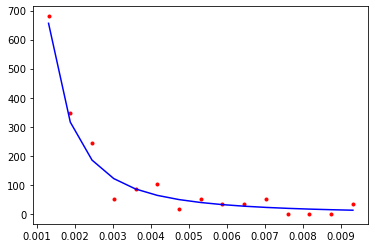

CPU times: user 1.71 ms, sys: 666 µs, total: 2.38 ms
Wall time: 807 µs
12895.789977135964


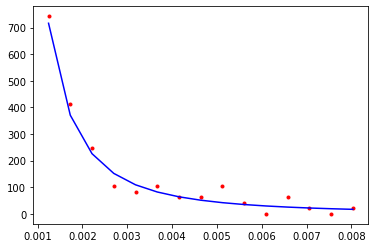

CPU times: user 1.64 ms, sys: 784 µs, total: 2.42 ms
Wall time: 869 µs
27301.892572616416


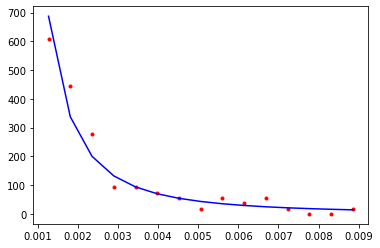

CPU times: user 1.76 ms, sys: 880 µs, total: 2.64 ms
Wall time: 962 µs
110432.39389224727


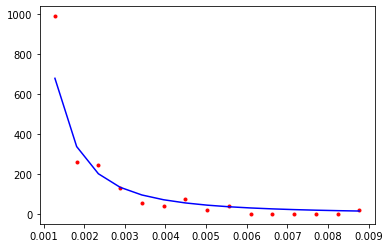

CPU times: user 2.59 ms, sys: 889 µs, total: 3.48 ms
Wall time: 1.22 ms
5014.53134573865


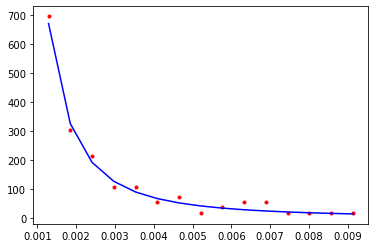

CPU times: user 2.56 ms, sys: 732 µs, total: 3.29 ms
Wall time: 1.12 ms
27890.449411695237


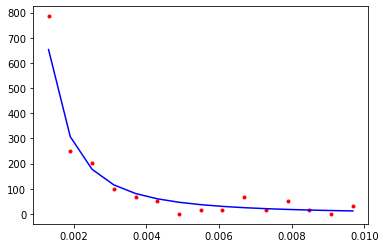

CPU times: user 2.94 ms, sys: 805 µs, total: 3.74 ms
Wall time: 1.26 ms
26370.647891154273


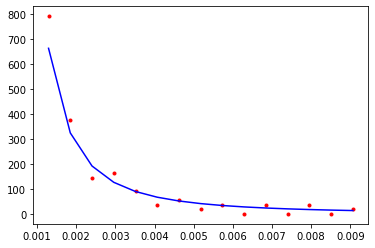

CPU times: user 3.18 ms, sys: 1.07 ms, total: 4.25 ms
Wall time: 1.49 ms
48331.26764996332


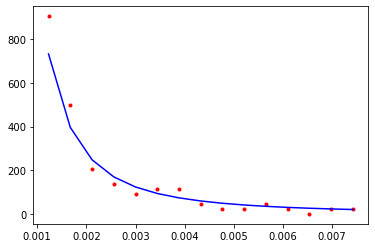

CPU times: user 3.47 ms, sys: 911 µs, total: 4.38 ms
Wall time: 1.49 ms
28384.301779195597


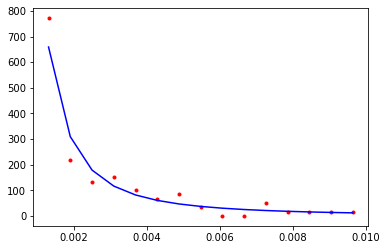

CPU times: user 3.71 ms, sys: 937 µs, total: 4.64 ms
Wall time: 1.57 ms
21153.128802818115


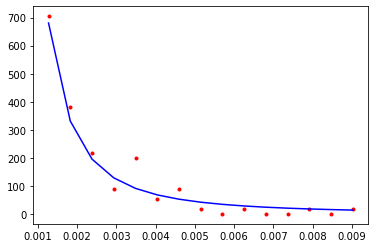

CPU times: user 4.11 ms, sys: 1.06 ms, total: 5.17 ms
Wall time: 1.79 ms
33460.289909296225


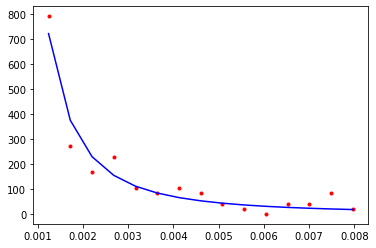

CPU times: user 3.97 ms, sys: 1.23 ms, total: 5.2 ms
Wall time: 1.9 ms
10062.50766472852


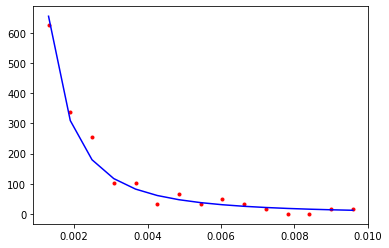

CPU times: user 4.91 ms, sys: 1.13 ms, total: 6.05 ms
Wall time: 2.07 ms
18847.11695860262


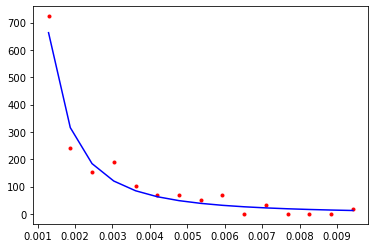

CPU times: user 4.69 ms, sys: 1.21 ms, total: 5.9 ms
Wall time: 2.06 ms
23752.73048445254


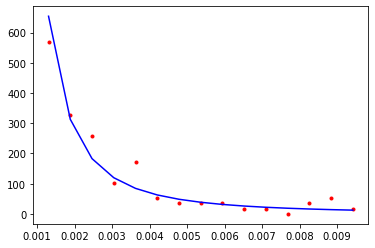

CPU times: user 5.13 ms, sys: 1.29 ms, total: 6.43 ms
Wall time: 2.21 ms
31114.429260976107


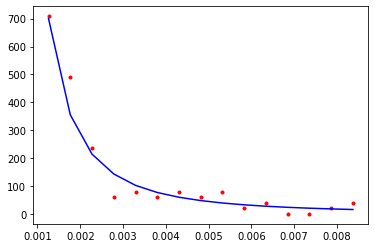

CPU times: user 5.28 ms, sys: 1.12 ms, total: 6.4 ms
Wall time: 2.17 ms
25565.15451114018


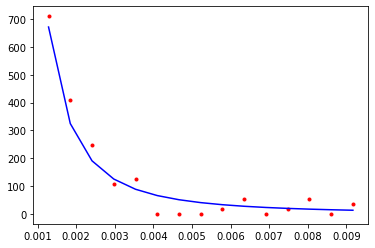

CPU times: user 5.82 ms, sys: 1.35 ms, total: 7.18 ms
Wall time: 2.45 ms
9687.494218386015


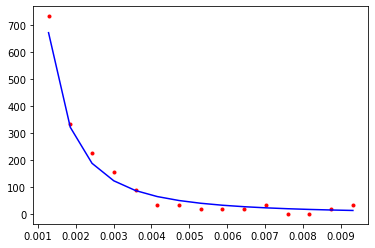

CPU times: user 6.2 ms, sys: 1.32 ms, total: 7.52 ms
Wall time: 2.52 ms
22032.616016357755


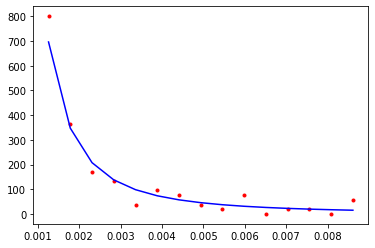

CPU times: user 6.07 ms, sys: 1.58 ms, total: 7.65 ms
Wall time: 2.65 ms
37986.71443615847


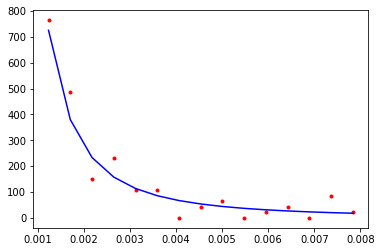

CPU times: user 1.73 ms, sys: 1.76 ms, total: 3.49 ms
Wall time: 1.17 ms
18128.41033635666


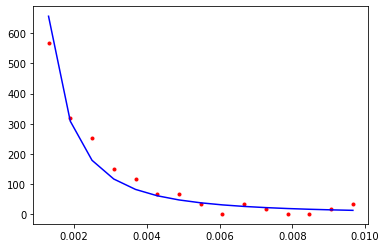

CPU times: user 1.17 ms, sys: 687 µs, total: 1.85 ms
Wall time: 660 µs
31783.674223763628


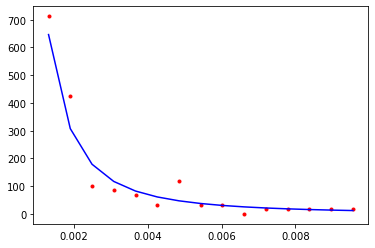

CPU times: user 1.22 ms, sys: 495 µs, total: 1.71 ms
Wall time: 577 µs
15533.668833983695


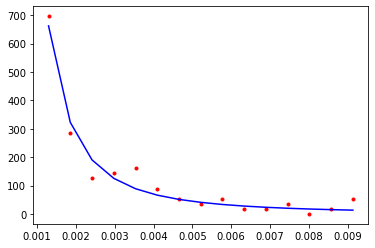

CPU times: user 1.63 ms, sys: 667 µs, total: 2.29 ms
Wall time: 779 µs
14025.959854698738


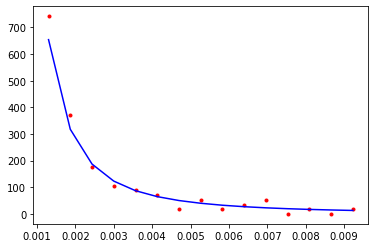

CPU times: user 1.76 ms, sys: 566 µs, total: 2.33 ms
Wall time: 782 µs
14007.504965870075


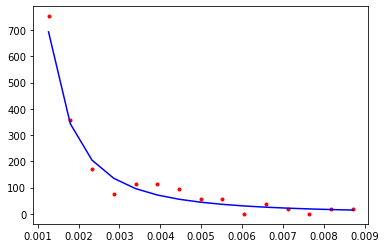

CPU times: user 1.99 ms, sys: 737 µs, total: 2.73 ms
Wall time: 950 µs
44519.200818630576


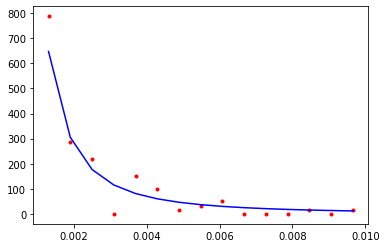

CPU times: user 2.32 ms, sys: 738 µs, total: 3.06 ms
Wall time: 1.04 ms
40751.36337097495


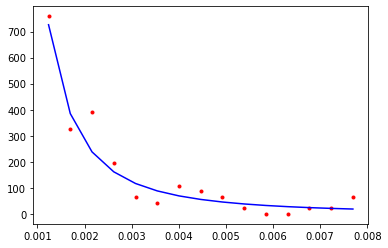

CPU times: user 2.86 ms, sys: 942 µs, total: 3.8 ms
Wall time: 1.31 ms
10617.014086393392


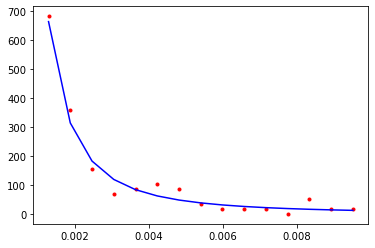

CPU times: user 2.96 ms, sys: 1.02 ms, total: 3.98 ms
Wall time: 1.41 ms
10128.930887953617


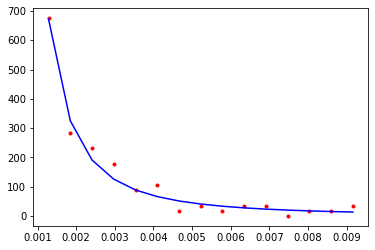

CPU times: user 3.17 ms, sys: 936 µs, total: 4.1 ms
Wall time: 1.41 ms
66127.8417079021


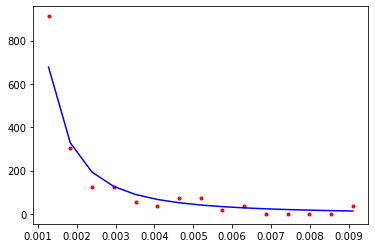

CPU times: user 3.91 ms, sys: 984 µs, total: 4.9 ms
Wall time: 1.66 ms
7181.302575265538


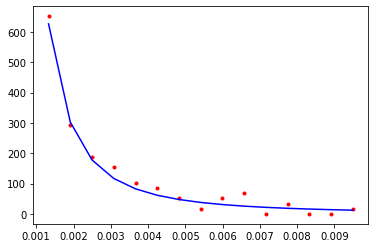

CPU times: user 4.02 ms, sys: 726 µs, total: 4.74 ms
Wall time: 1.62 ms
29774.21601376477


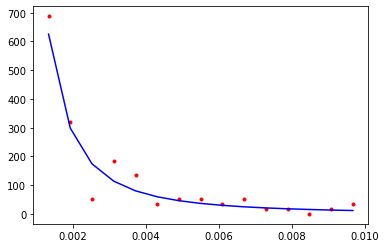

CPU times: user 3.72 ms, sys: 1.36 ms, total: 5.08 ms
Wall time: 1.89 ms
22474.59893212898


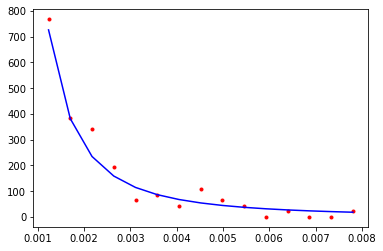

CPU times: user 3.86 ms, sys: 1.18 ms, total: 5.05 ms
Wall time: 1.9 ms
53698.64257435708


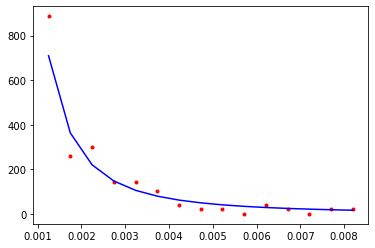

CPU times: user 4.65 ms, sys: 1.03 ms, total: 5.68 ms
Wall time: 1.91 ms
12670.30609909692


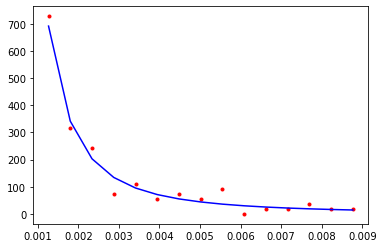

CPU times: user 4.89 ms, sys: 1.06 ms, total: 5.95 ms
Wall time: 2 ms
31131.707390751522


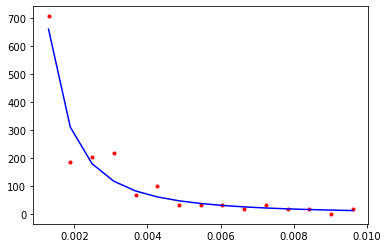

CPU times: user 5.23 ms, sys: 1.16 ms, total: 6.39 ms
Wall time: 2.16 ms
14280.892336225104


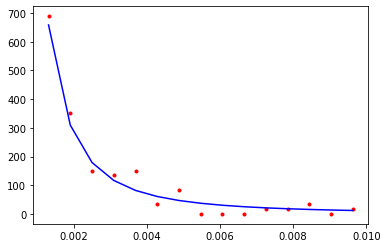

CPU times: user 5.76 ms, sys: 1.22 ms, total: 6.98 ms
Wall time: 2.35 ms
32081.433361556516


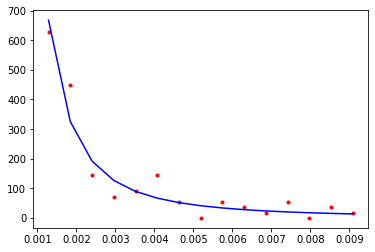

CPU times: user 5.6 ms, sys: 1.38 ms, total: 6.98 ms
Wall time: 2.48 ms
23782.20817374774


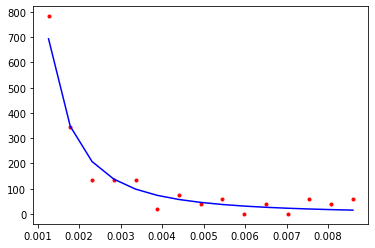

CPU times: user 5.47 ms, sys: 1.64 ms, total: 7.11 ms
Wall time: 2.53 ms
16171.086187732028


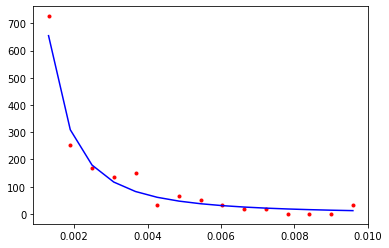

CPU times: user 6.34 ms, sys: 1.51 ms, total: 7.84 ms
Wall time: 2.71 ms
19325.262329992747


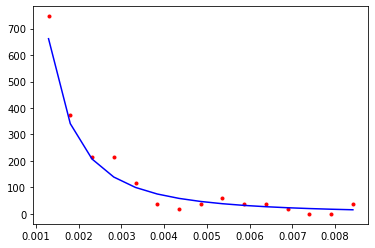

CPU times: user 1.18 ms, sys: 1.12 ms, total: 2.3 ms
Wall time: 767 µs
31763.027012190272


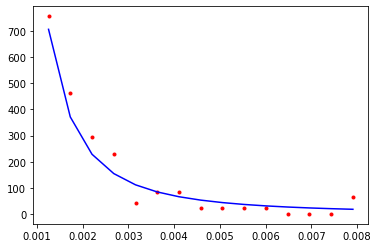

CPU times: user 959 µs, sys: 492 µs, total: 1.45 ms
Wall time: 488 µs
79287.91820769952


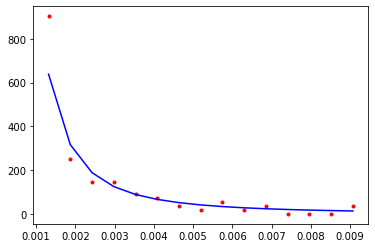

CPU times: user 1.52 ms, sys: 640 µs, total: 2.16 ms
Wall time: 742 µs
24800.98298994627


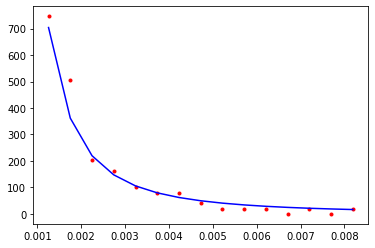

CPU times: user 1.79 ms, sys: 743 µs, total: 2.54 ms
Wall time: 873 µs
39845.91818048499


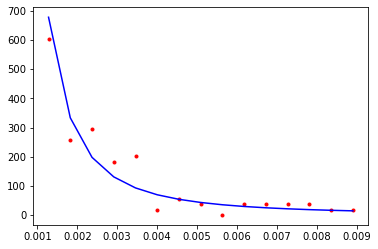

CPU times: user 1.63 ms, sys: 833 µs, total: 2.47 ms
Wall time: 886 µs
16383.993987637454


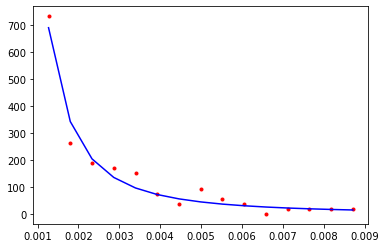

CPU times: user 1.94 ms, sys: 703 µs, total: 2.64 ms
Wall time: 917 µs
5933.726246597704


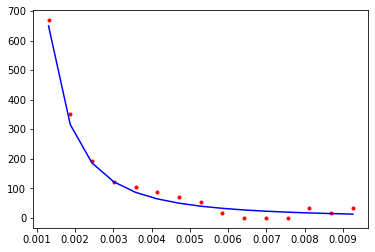

CPU times: user 2.21 ms, sys: 641 µs, total: 2.85 ms
Wall time: 942 µs
4749.260197263278


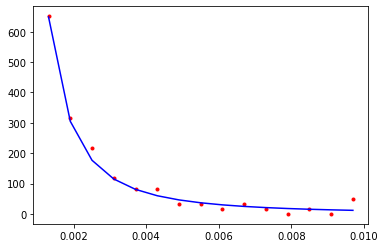

CPU times: user 2.42 ms, sys: 1.07 ms, total: 3.49 ms
Wall time: 1.28 ms
20980.919508118215


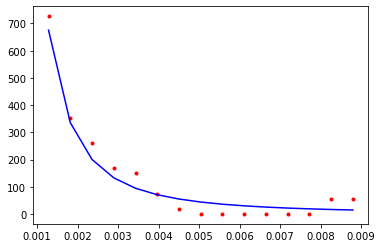

CPU times: user 3.06 ms, sys: 986 µs, total: 4.05 ms
Wall time: 1.41 ms
38951.56358978244


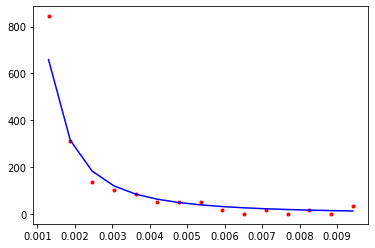

CPU times: user 2.81 ms, sys: 1.02 ms, total: 3.83 ms
Wall time: 1.36 ms
23081.93557246257


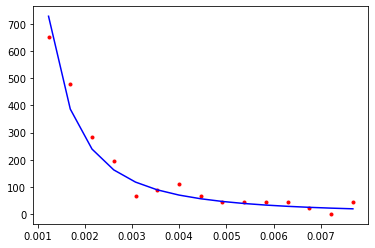

CPU times: user 3.75 ms, sys: 948 µs, total: 4.7 ms
Wall time: 1.6 ms
10426.810122775654


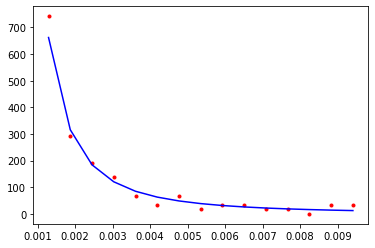

CPU times: user 3.84 ms, sys: 1.19 ms, total: 5.02 ms
Wall time: 1.75 ms
18572.810949745475


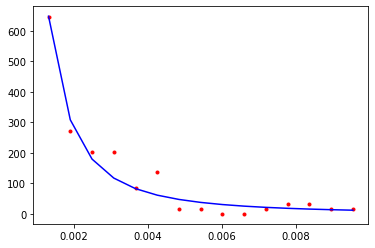

CPU times: user 4.2 ms, sys: 1.08 ms, total: 5.28 ms
Wall time: 1.8 ms
27530.601359210144


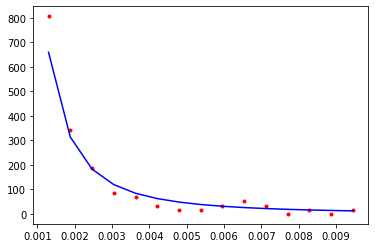

CPU times: user 3.92 ms, sys: 1.39 ms, total: 5.32 ms
Wall time: 1.92 ms
25403.14948393067


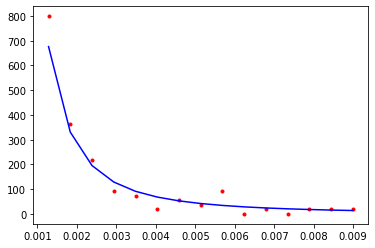

CPU times: user 4.65 ms, sys: 1.22 ms, total: 5.87 ms
Wall time: 2.02 ms
11856.786005632415


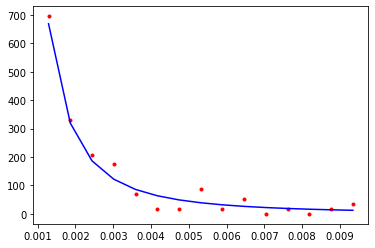

CPU times: user 4.94 ms, sys: 1.03 ms, total: 5.96 ms
Wall time: 2.01 ms
26304.283694184396


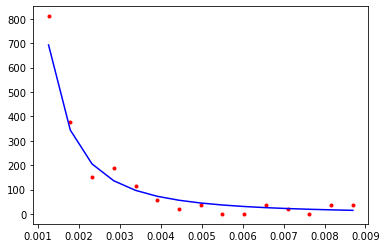

CPU times: user 5.22 ms, sys: 1.06 ms, total: 6.28 ms
Wall time: 2.11 ms
33824.06482592536


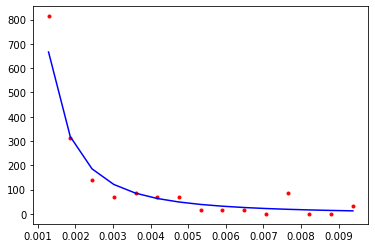

CPU times: user 5.45 ms, sys: 1.09 ms, total: 6.54 ms
Wall time: 2.21 ms
49950.66932467382


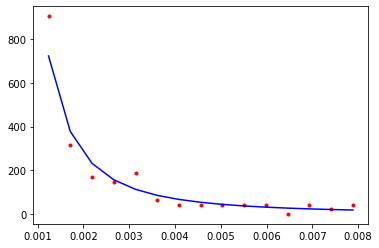

CPU times: user 6.97 ms, sys: 1.42 ms, total: 8.4 ms
Wall time: 2.82 ms
53466.025088597184


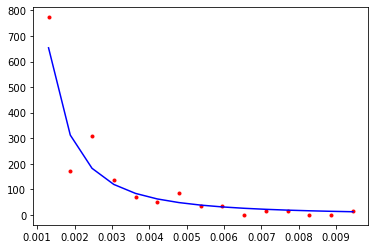

CPU times: user 5.98 ms, sys: 1.26 ms, total: 7.24 ms
Wall time: 2.45 ms
36562.61180943915


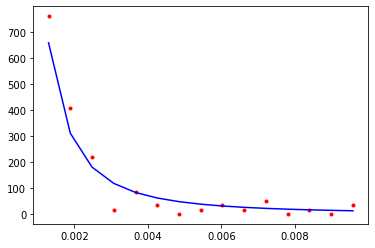

CPU times: user 6.47 ms, sys: 1.26 ms, total: 7.72 ms
Wall time: 2.59 ms
44555.07667332887


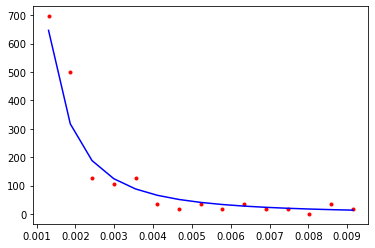

CPU times: user 1.14 ms, sys: 1.23 ms, total: 2.37 ms
Wall time: 798 µs
24285.653393913708


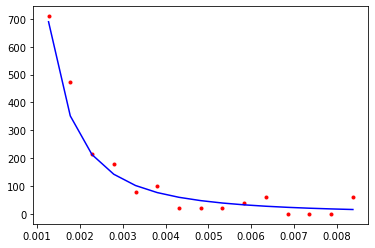

In [33]:
for _ in range(loops):
    for nn_iter in n_iter:
        %time r_everest = [ lib.get_random_ruth(z,emr,t0,t1, nn_iter) for _ in range(n) ]
        S_everest[nn_iter] = np.array([ *S_everest[nn_iter], test_random(r_everest, bins, f) ])
    %time r_k2 = [ k2ran.get_random_ruth(cgen) for _ in range(n) ]
    S_K2 = np.array([ *S_K2, test_random(r_k2, bins, f) ])

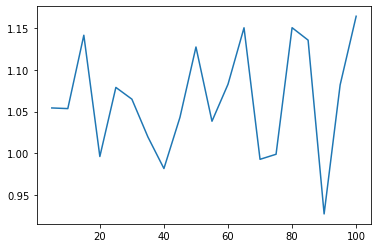

In [34]:
plt.plot(n_iter, [ np.sqrt((S_everest[nn_iter] / S_K2).mean()) for nn_iter in n_iter ])

<font size="5">**Normal random number generator**</font>


<font size="4">Everest</font>

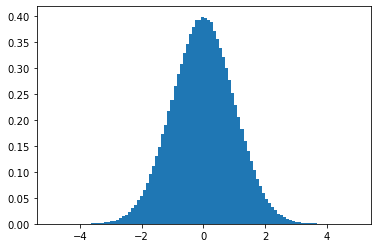

CPU times: user 21.1 ms, sys: 1.61 ms, total: 22.7 ms
Wall time: 22.6 ms


In [54]:
pdfs_normal = []
y = np.linspace(-10,10,1000000)

for _ in range(len(y)):
    pdf = lib.get_random_normal()
    pdfs_normal.append(pdf)
    
plt.hist(pdfs_normal,bins=100,density=True)
plt.show()

%time r = [ lib.get_random_normal() for _ in range(100000) ]

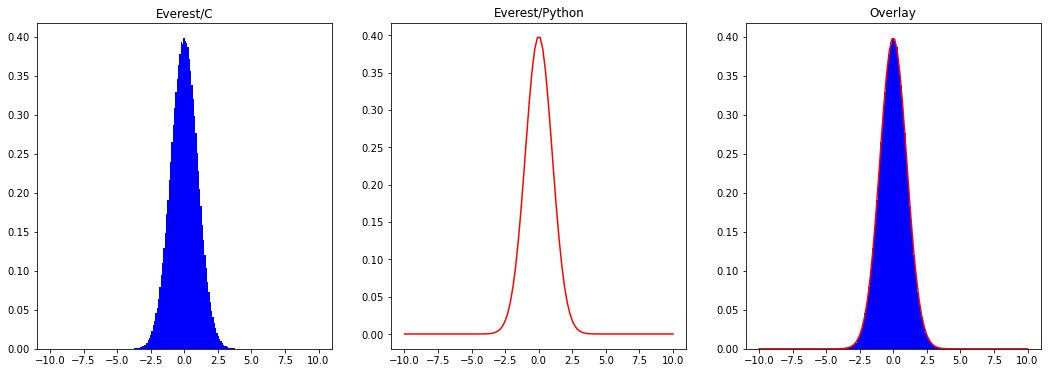

In [98]:
x = np.linspace(-10,10,100)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 6))
    
ax0.set_title("Everest/C")
ax0.hist(pdfs_normal,bins=100,density=True,color="blue")
ax1.set_title("Everest/Python")
ax1.plot(x,[ norm.pdf(xx) for xx in x ],color="red")
ax2.set_title("Overlay")
ax2.hist(pdfs_normal,bins=100,density=True,color="blue")
ax2.plot(x,[ norm.pdf(xx) for xx in x ],color="red")
         
plt.show()

<font size="4">K2</font>

In [17]:
%time rk2_normal = [ k2ran.get_random() for _ in range(1000000) ]

CPU times: user 1.34 s, sys: 21 ms, total: 1.36 s
Wall time: 1.36 s


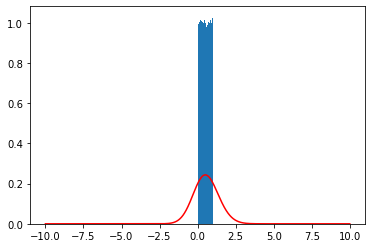

In [30]:
x = np.linspace(-10,10,10000) 
plt.plot(x,[ norm.pdf(xx)*norm.cdf(xx) for xx in x ], 'r-')
plt.hist(rk2_normal,bins=100,density=True)
plt.yscale = 'log'
plt.show()

<font size="5">**Gaussian random number generator**</font>

<font size="4">Everest</font>

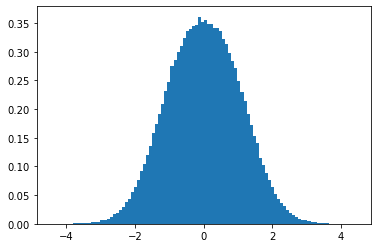

CPU times: user 26 ms, sys: 1.15 ms, total: 27.2 ms
Wall time: 27.3 ms


In [56]:
pdfs_gaussian = []
y = np.linspace(0,100,1000000)

for _ in range(len(y)):
    pdf = lib.get_random_gauss()
    pdfs_gaussian.append(pdf)
    
plt.hist(pdfs_gaussian,bins=100,density=True)
plt.show()

%time r = [ lib.get_random_gauss() for _ in range(100000) ]

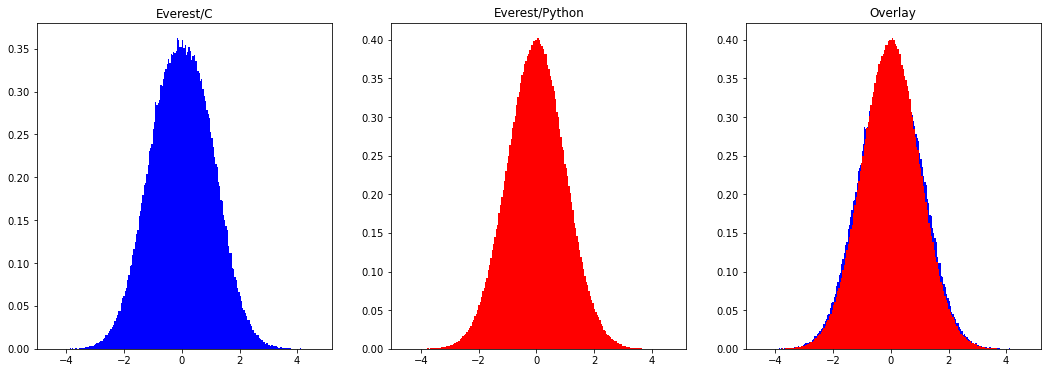

In [93]:
nums = [] 
mu = 0
sigma = 1

for _ in range(len(y)): 
    temp = random.gauss(mu, sigma) 
    nums.append(temp) 

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 6))
    
ax0.set_title("Everest/C")
ax0.hist(pdfs_gaussian,bins=200,density=True,color="blue")
ax1.set_title("Everest/Python")
ax1.hist(nums,bins=200,density=True,color="red")
ax2.set_title("Overlay")
ax2.hist(pdfs_gaussian,bins=200,density=True,color="blue")
ax2.hist(nums,bins=200,density=True,color="red") 

plt.show()

<font size="4">K2</font>

In [85]:
%time rk2_gaussian = [ k2ran.get_random_gauss(100) for _ in range(1000000) ]

CPU times: user 1.47 s, sys: 14.5 ms, total: 1.48 s
Wall time: 1.49 s


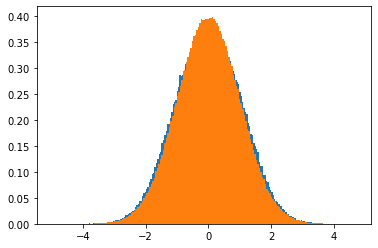

In [89]:
plt.hist(pdfs_gaussian,bins=200,density=True)
plt.hist(rk2_gaussian,bins=200,density=True) 
plt.show()